In [1]:
%load_ext autoreload
%autoreload 2

import gc
import warnings

import scipy as sp
import numpy as np
import pandas as pd
import pickle

import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm

import sys
sys.path.append("..")
from src import *

warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# Исходные признаки 

In [2]:
features = AmexFeatures()

In [3]:
%%time
train = pd.read_parquet("../input/train_data.parquet")
train_labels = pd.read_csv("../input/train_labels.csv")
train = train.merge(train_labels, how = 'inner', on = 'customer_ID')

CPU times: user 5.19 s, sys: 4.57 s, total: 9.76 s
Wall time: 5.58 s


In [4]:
train = train.sample(100000, random_state=SEED)

### Типы признаков

### Uniform 

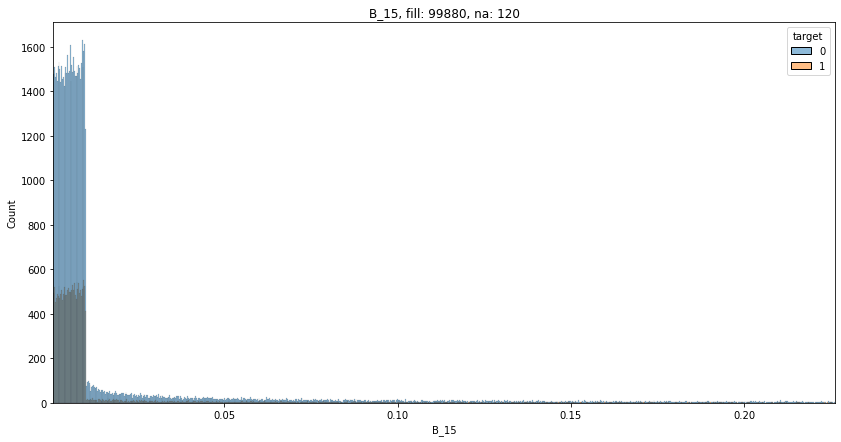

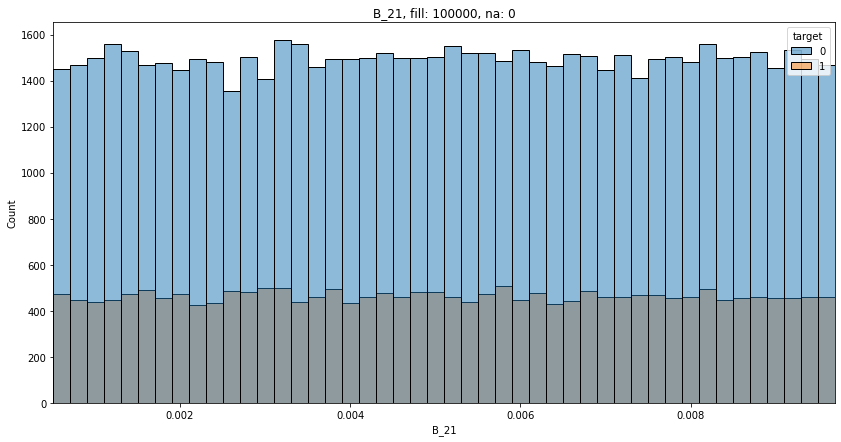

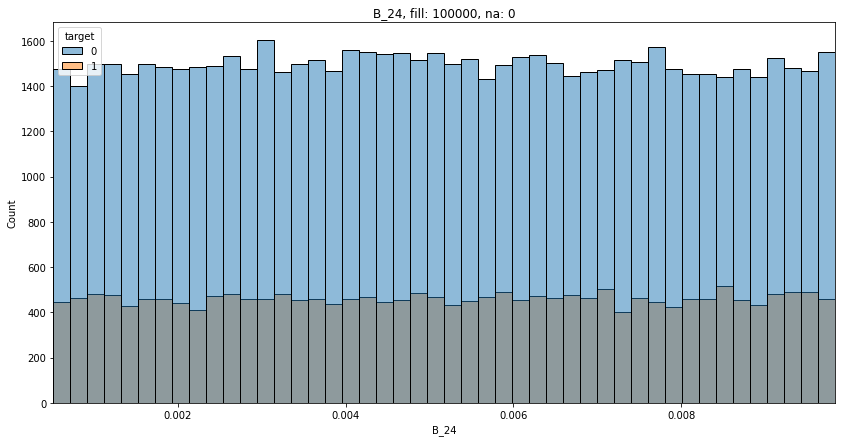

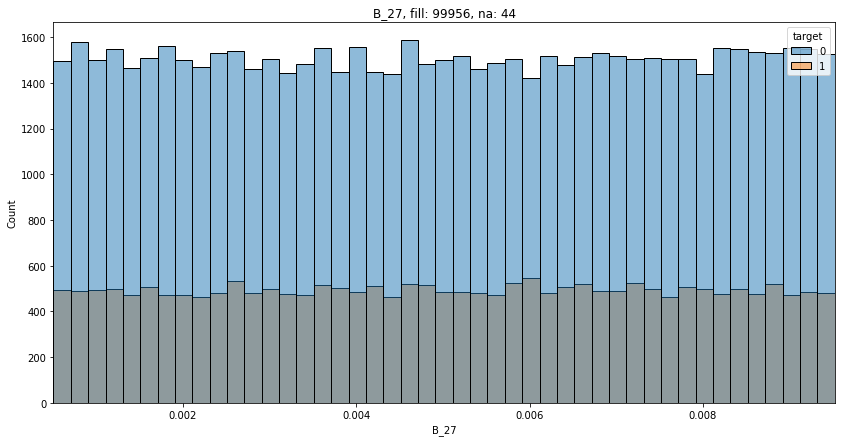

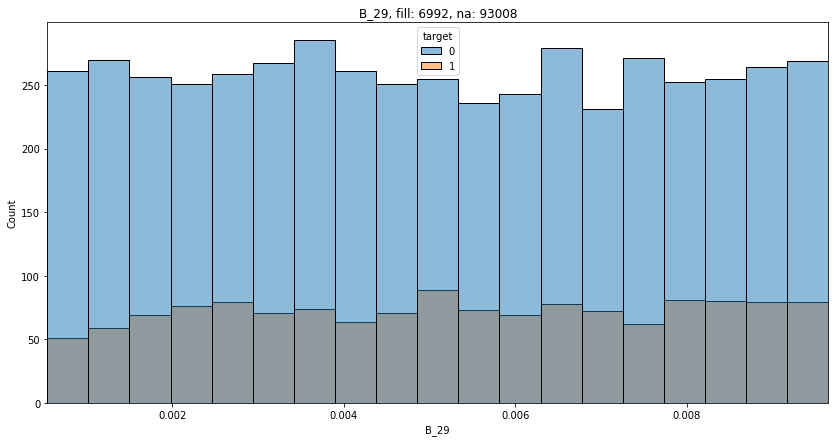

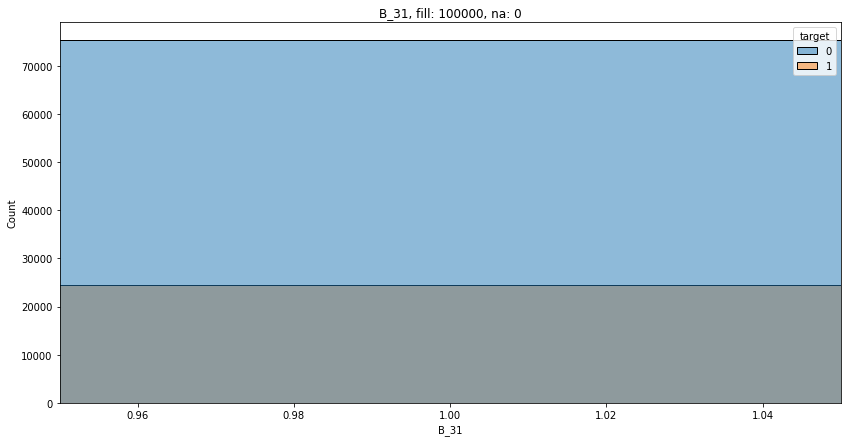

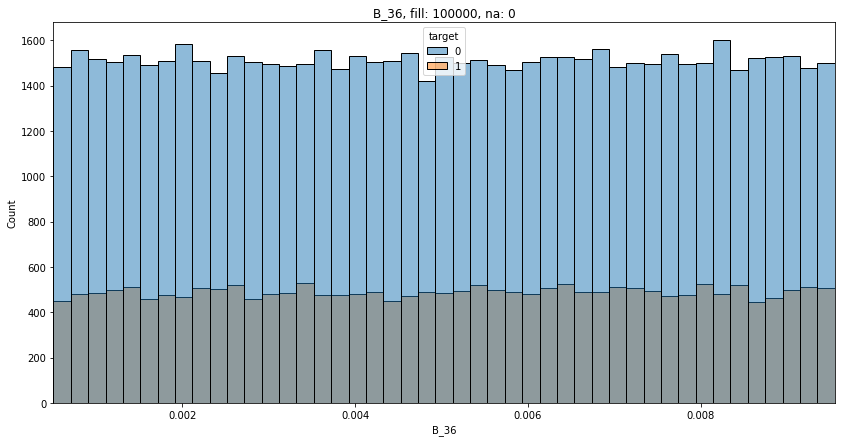

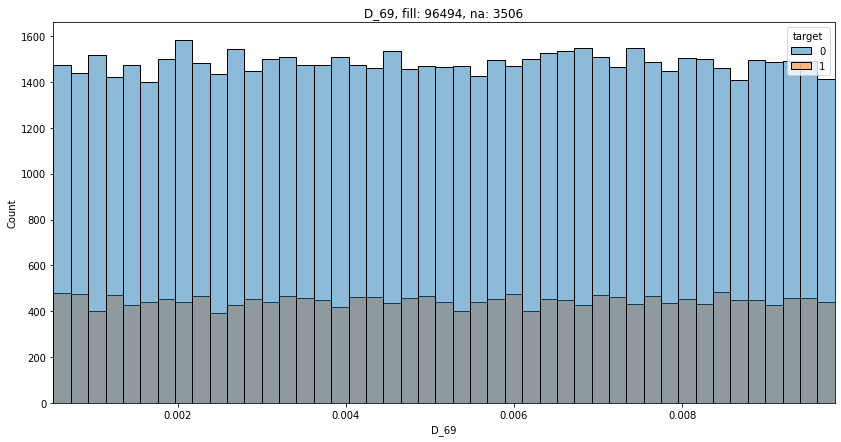

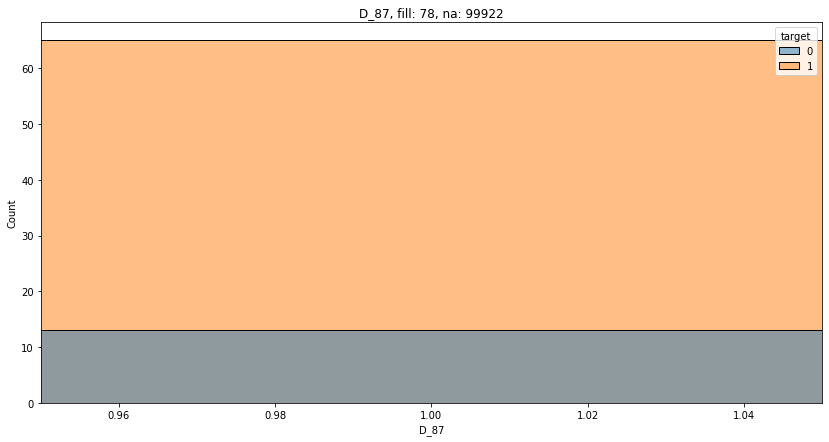

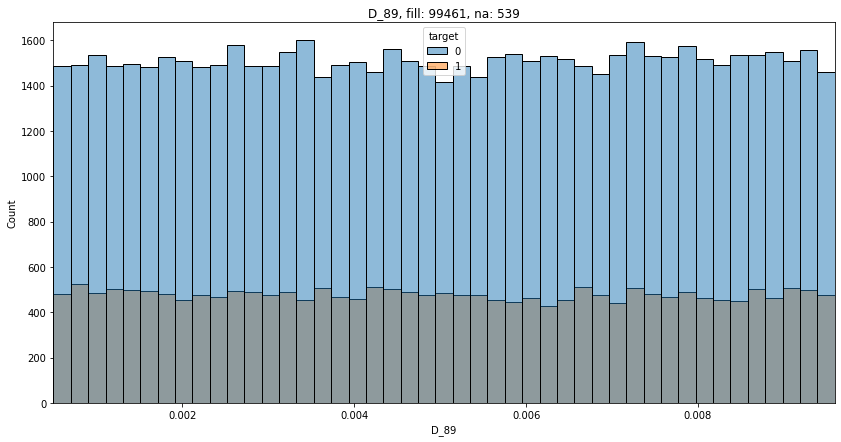

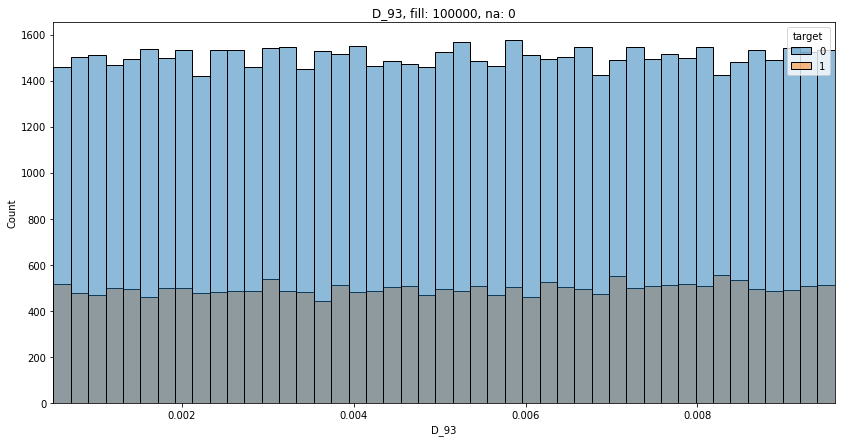

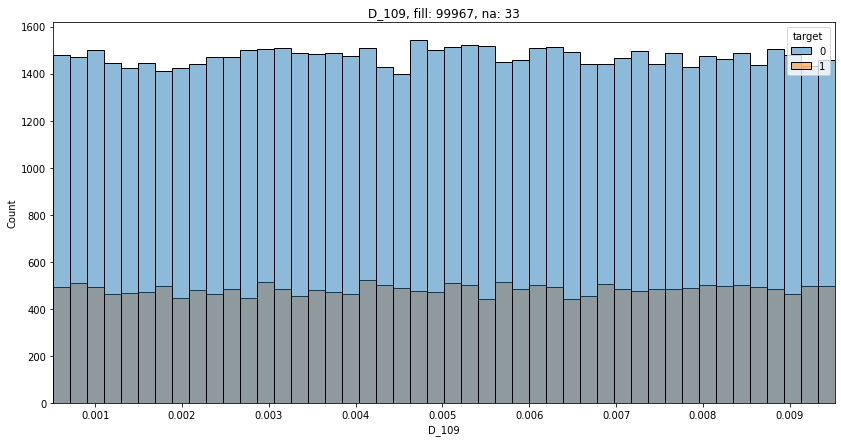

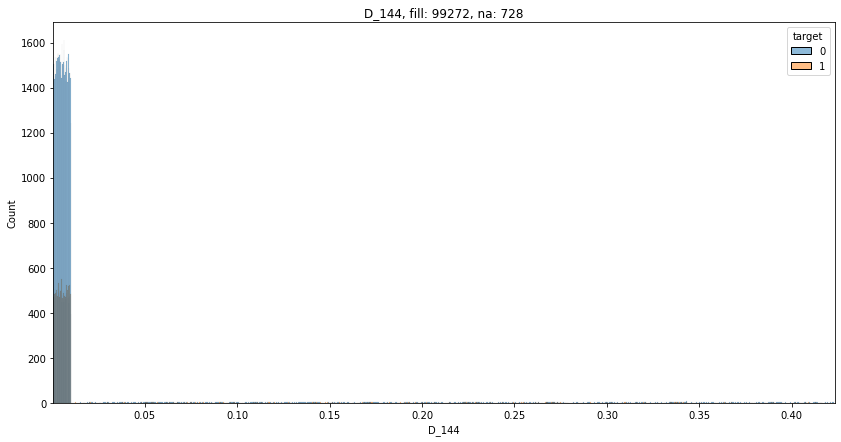

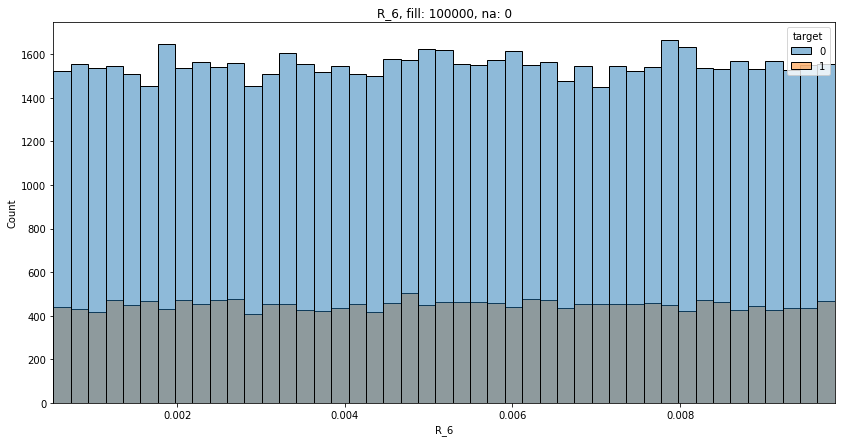

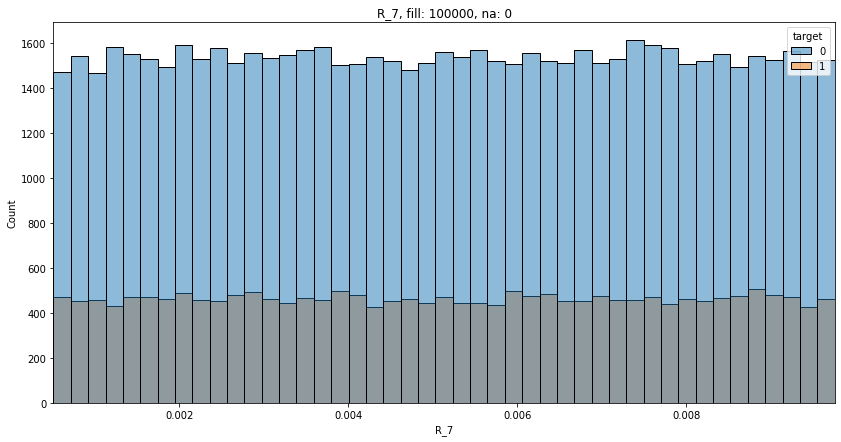

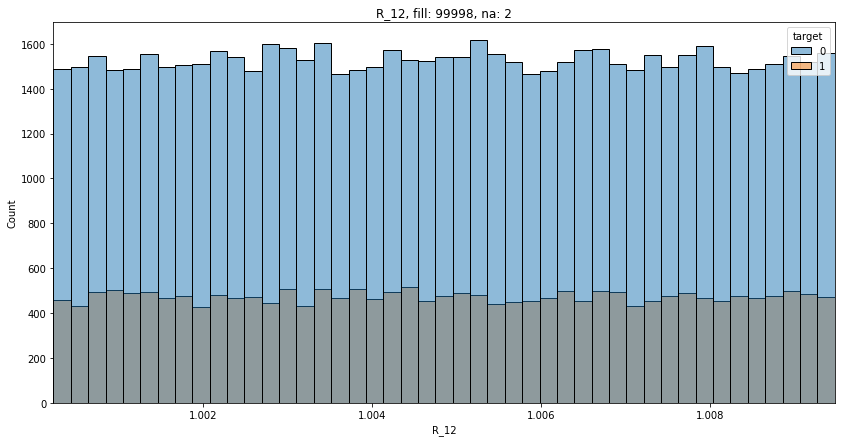

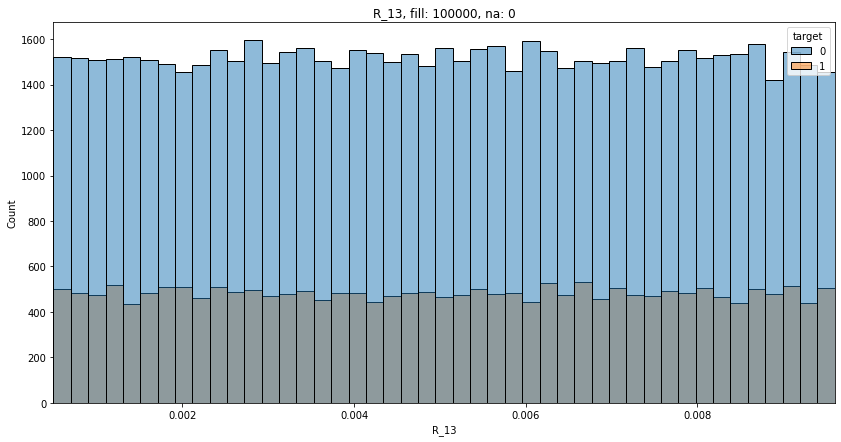

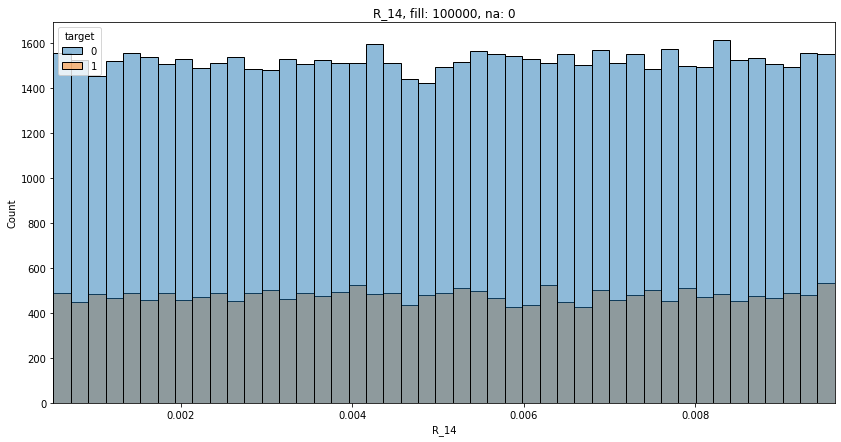

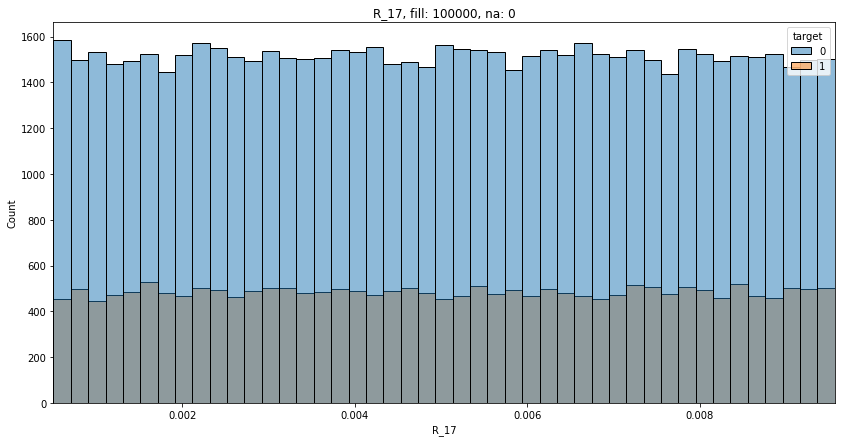

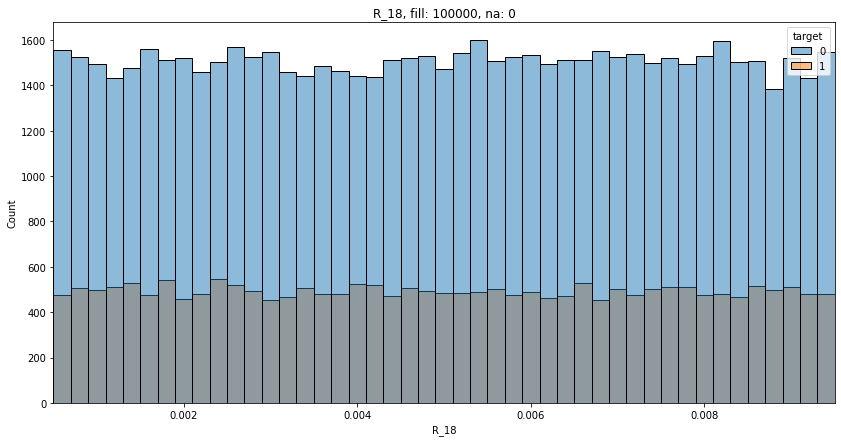

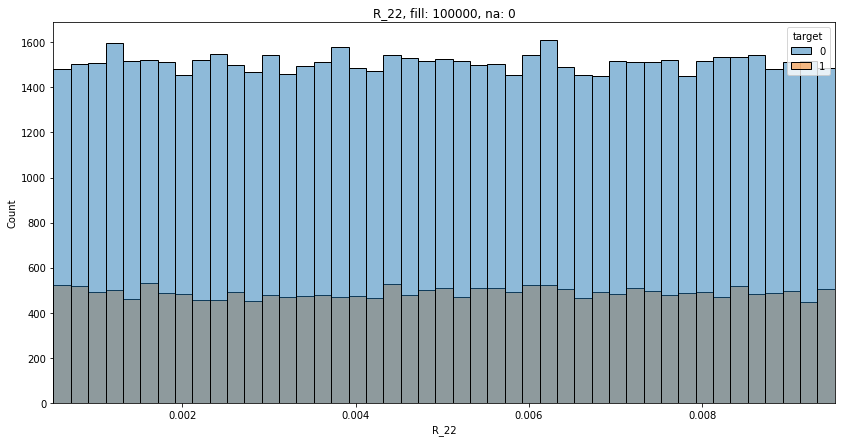

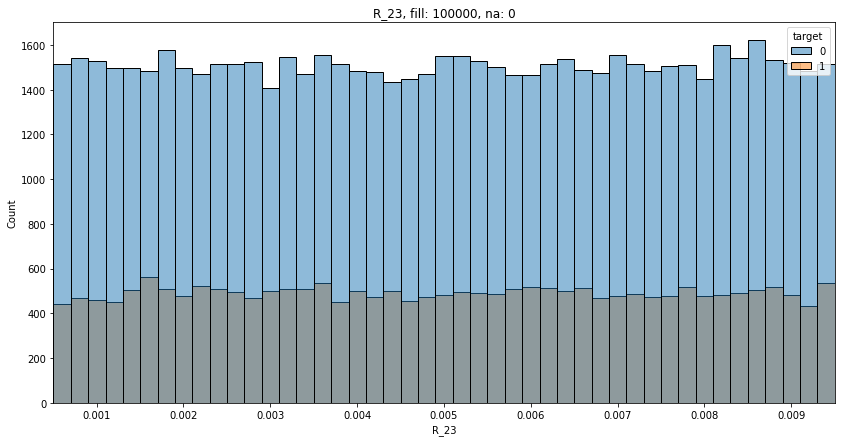

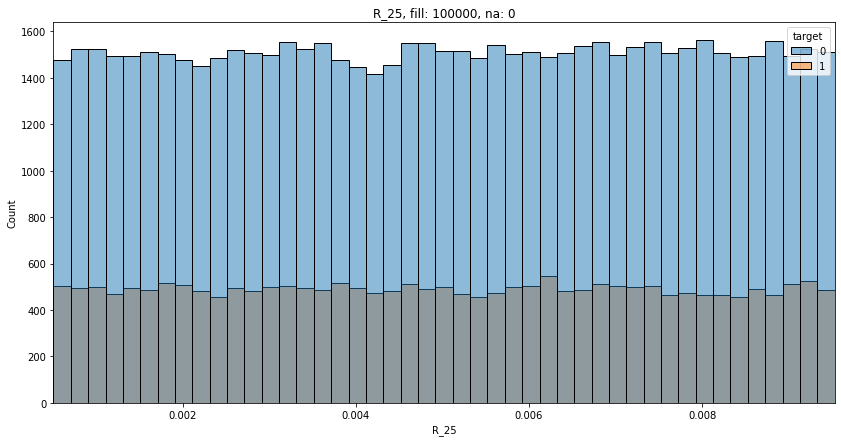

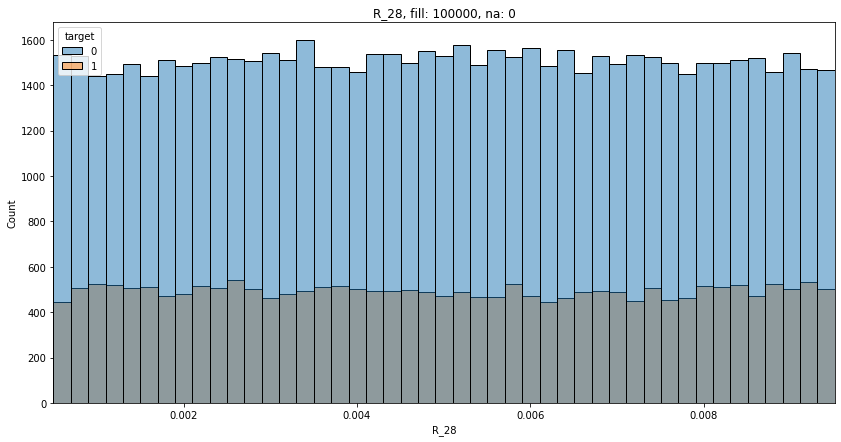

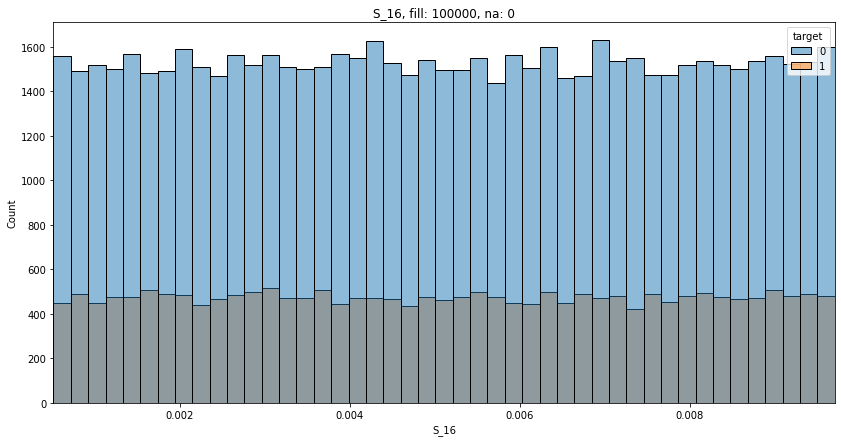

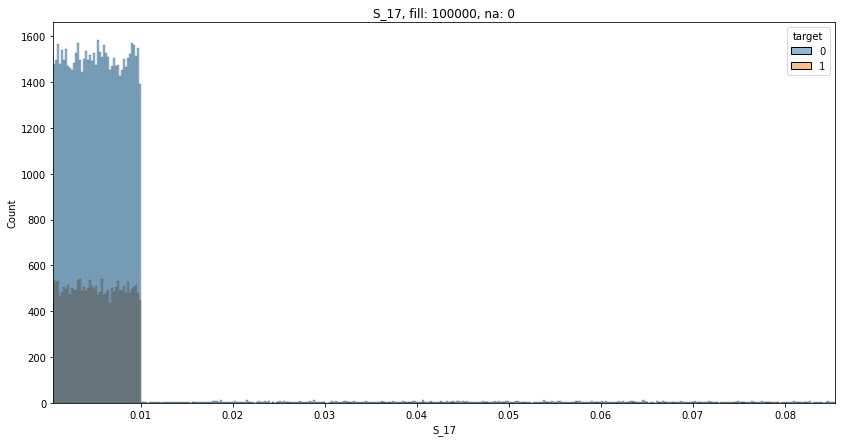

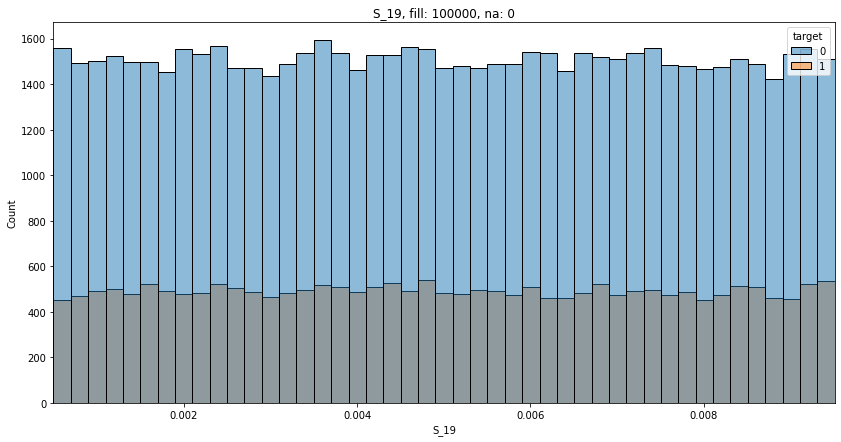

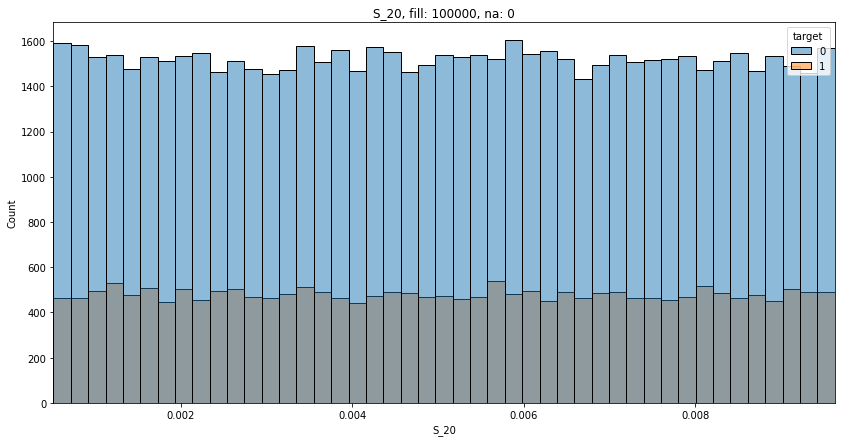

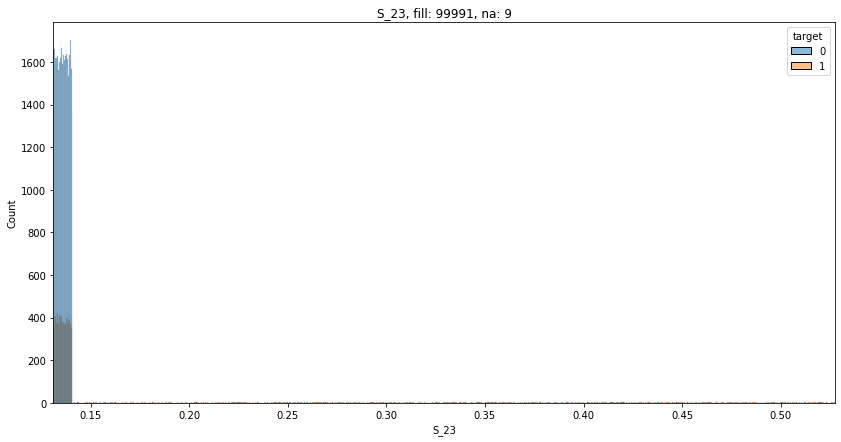

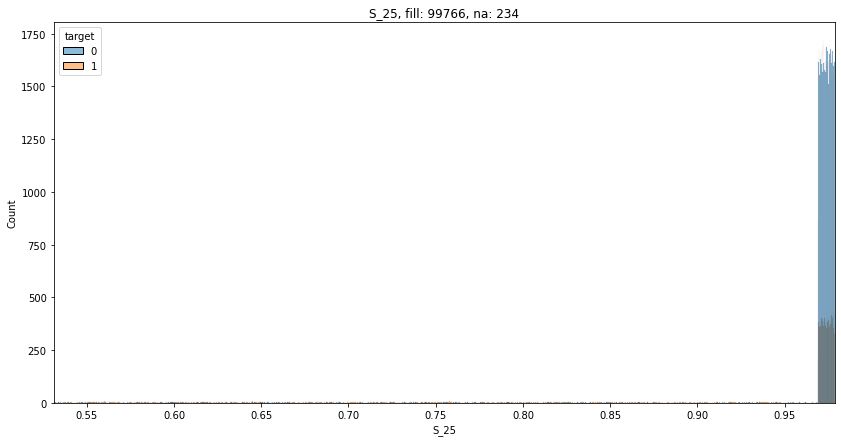

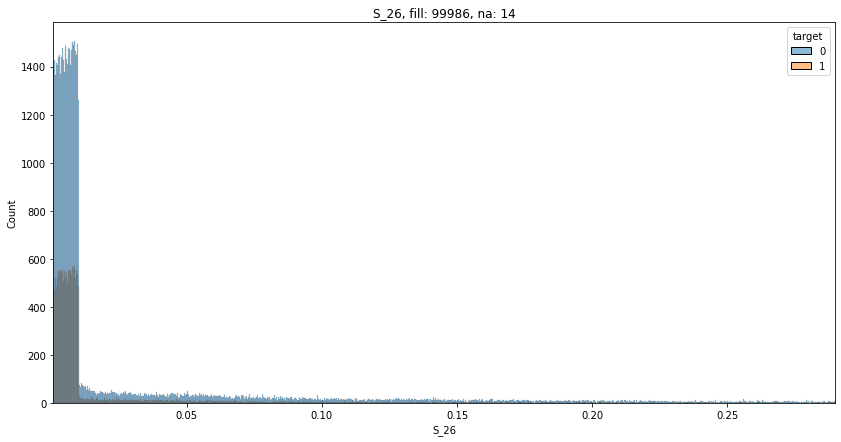

In [5]:
plot_features_hist(train, features.origin_groups["uniform"], quantile_alpha=0.05)

### Unknown 

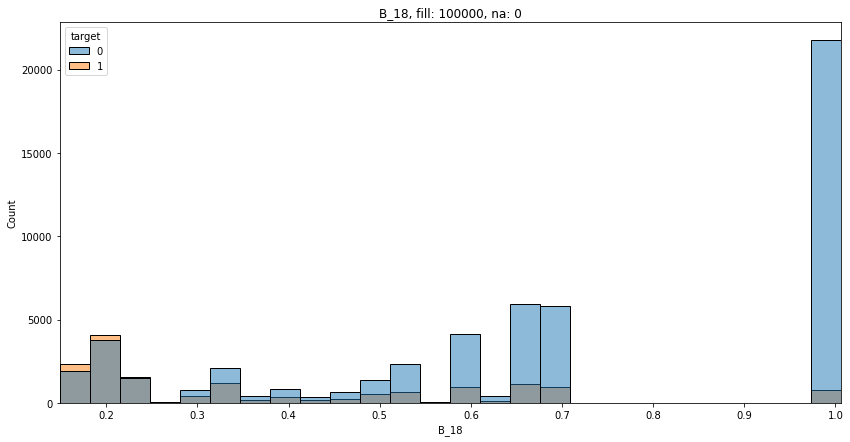

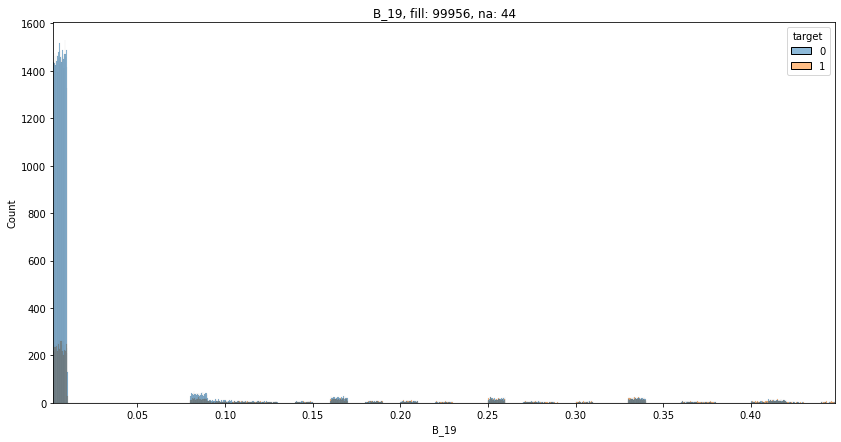

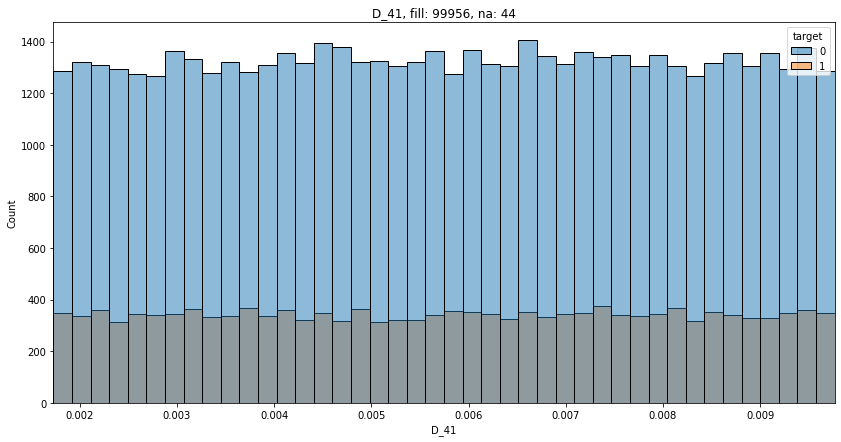

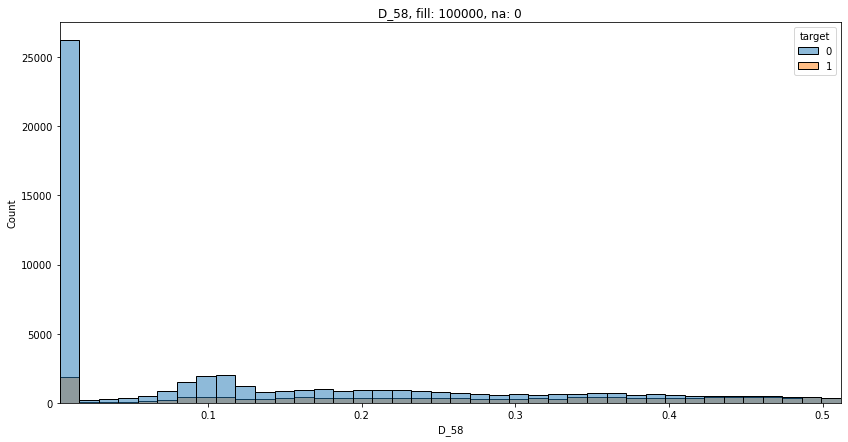

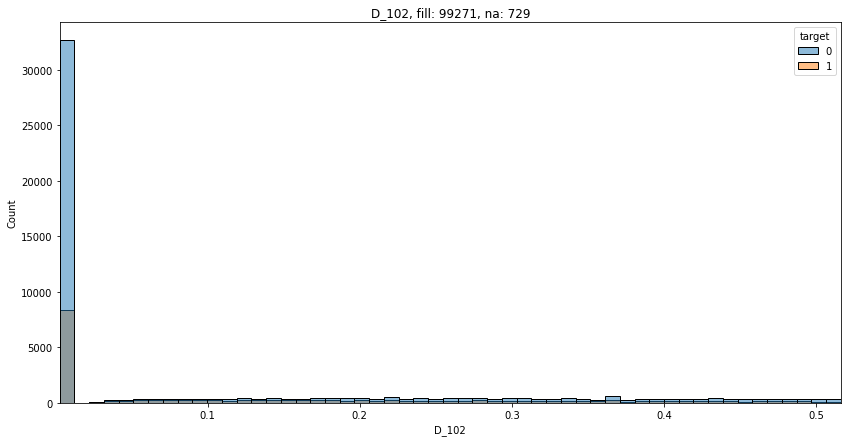

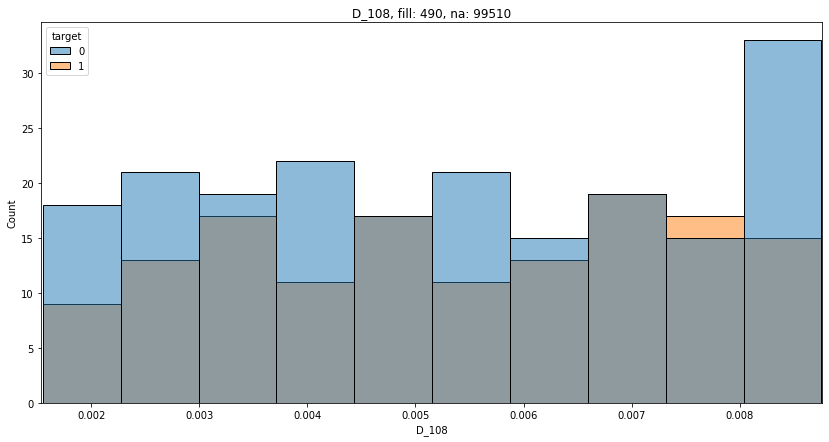

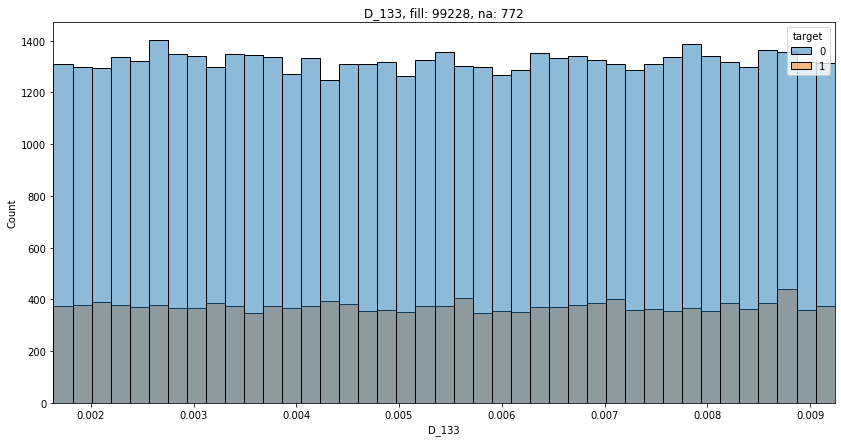

In [6]:
plot_features_hist(train, features.origin_groups["unknown"], quantile_alpha=0.15)

### Binary 

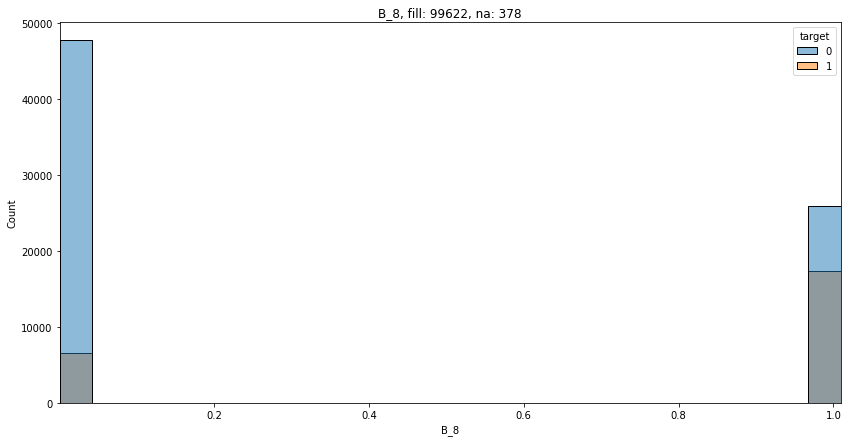

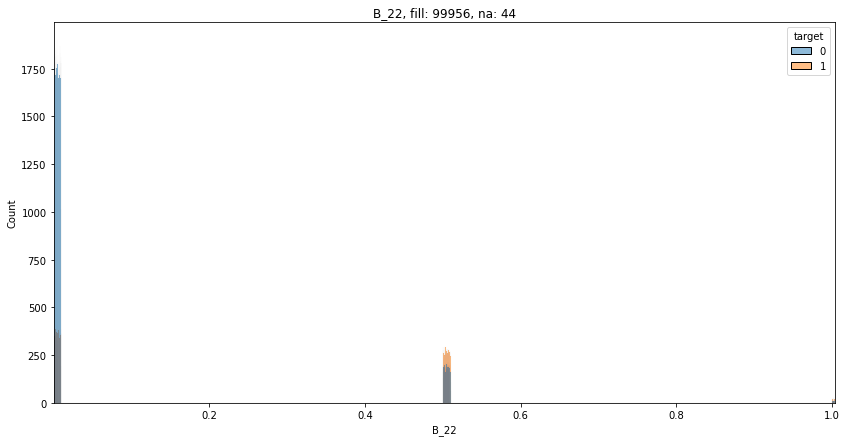

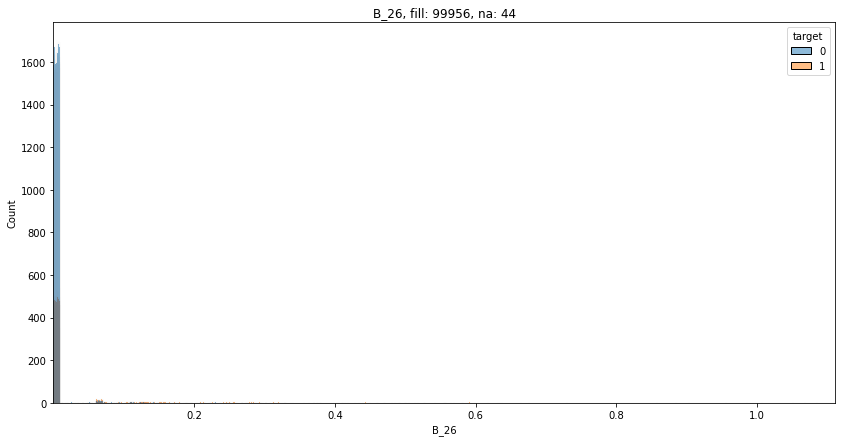

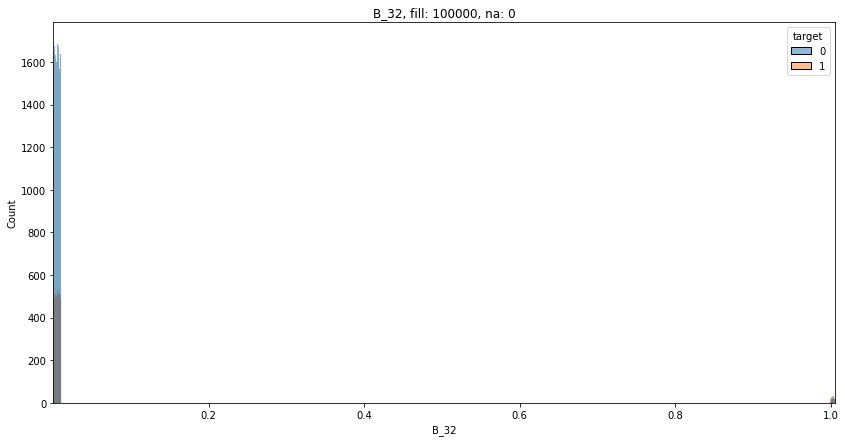

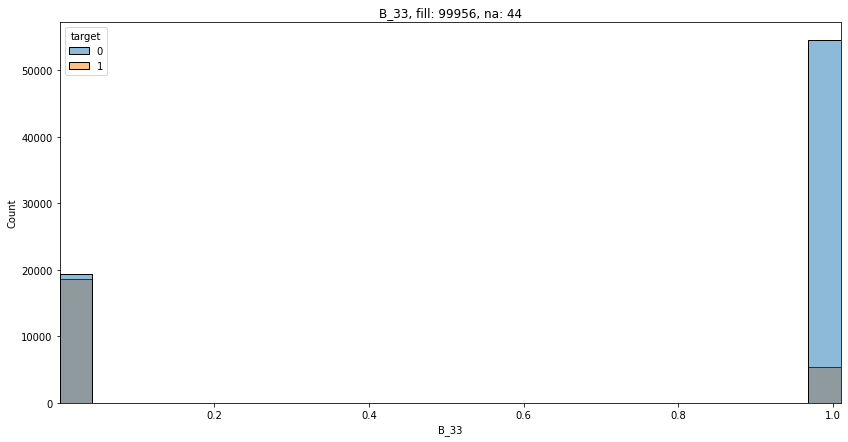

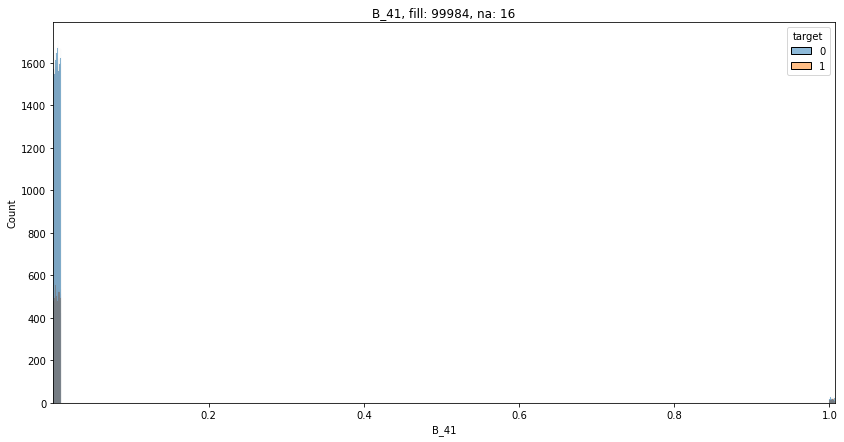

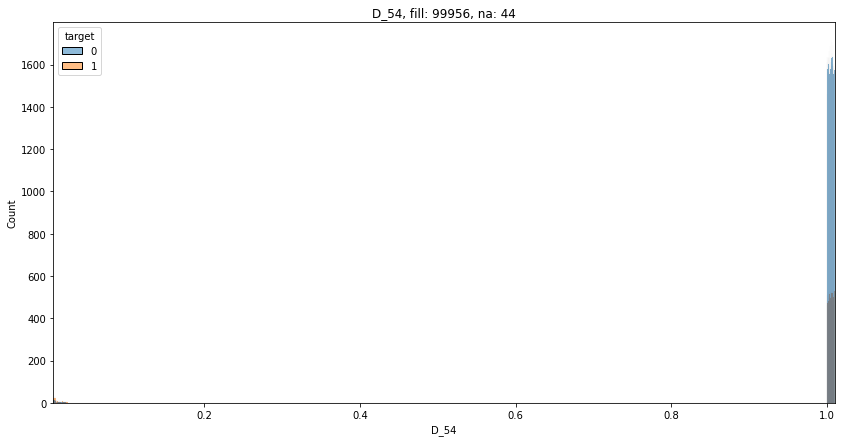

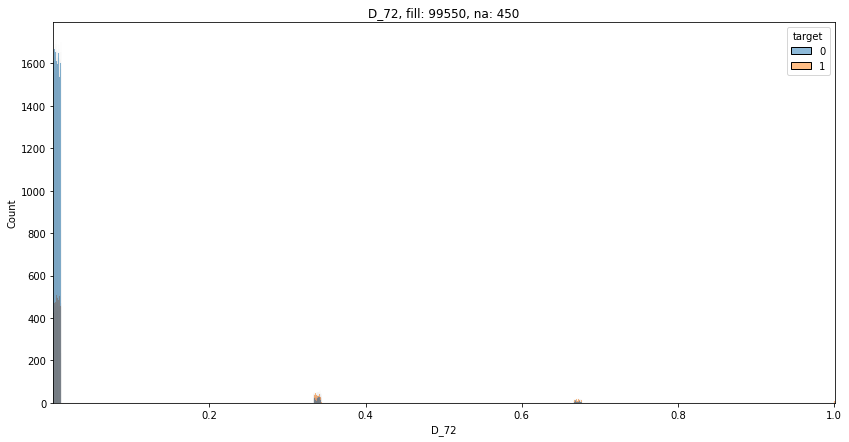

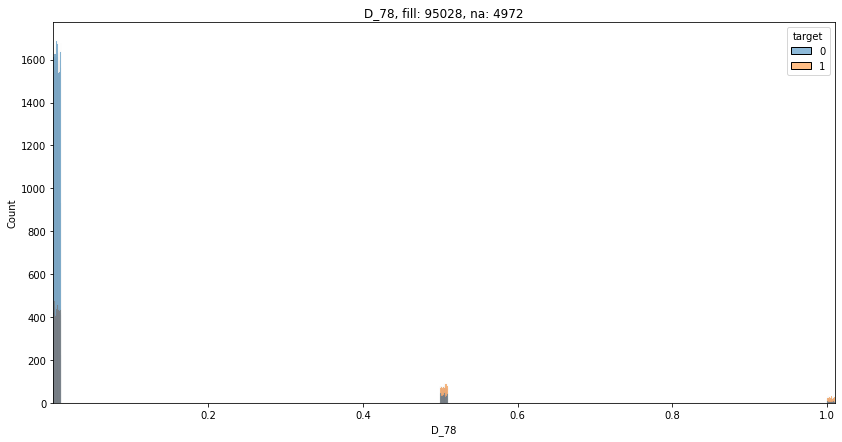

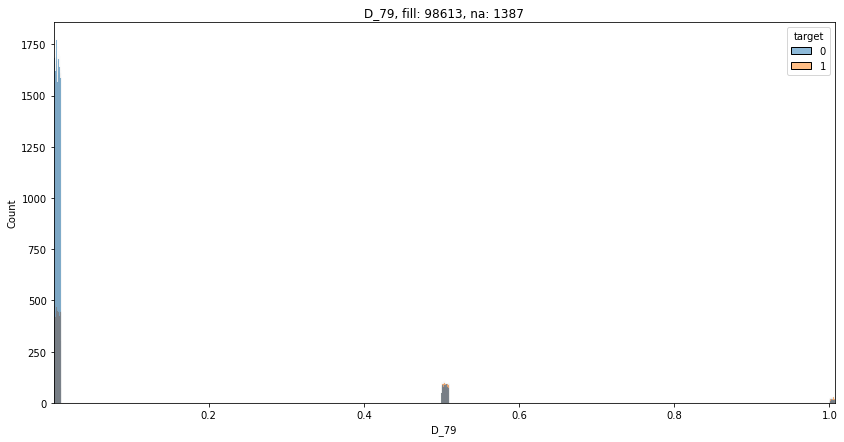

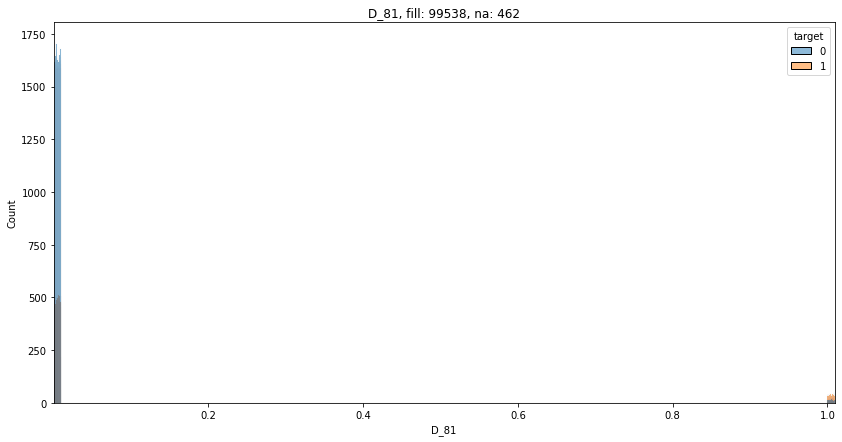

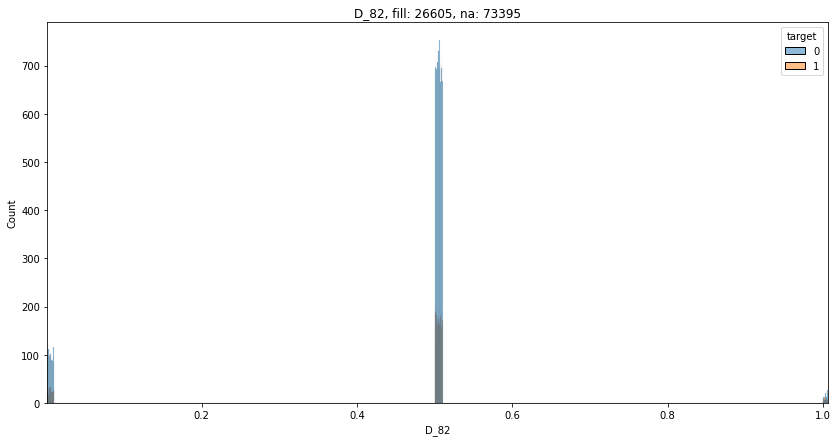

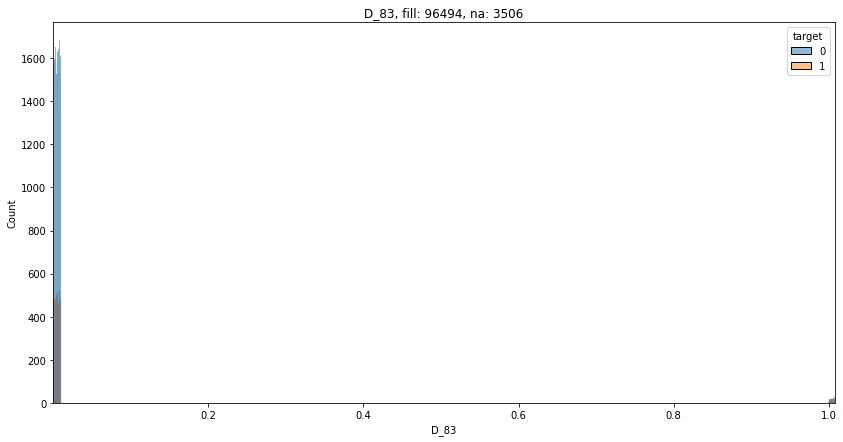

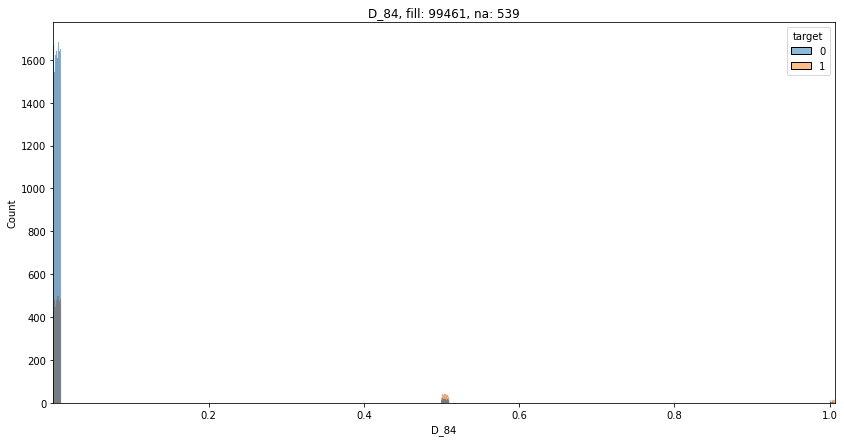

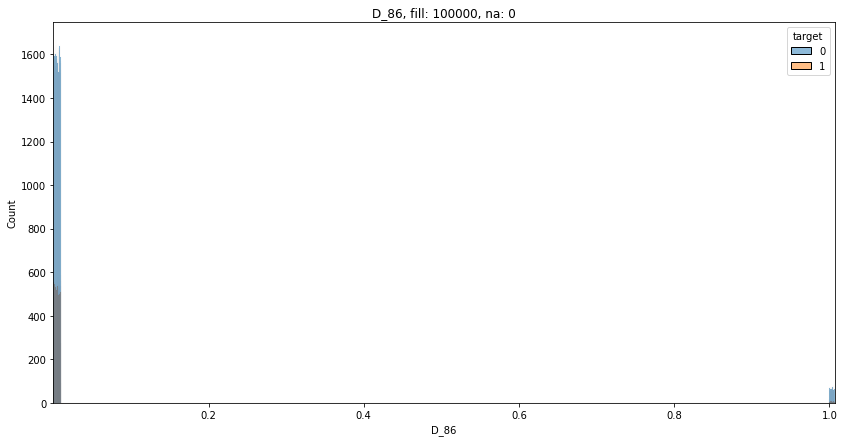

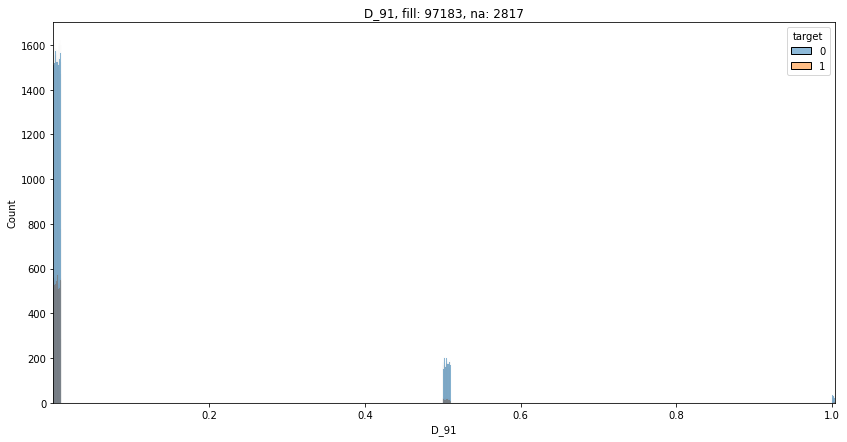

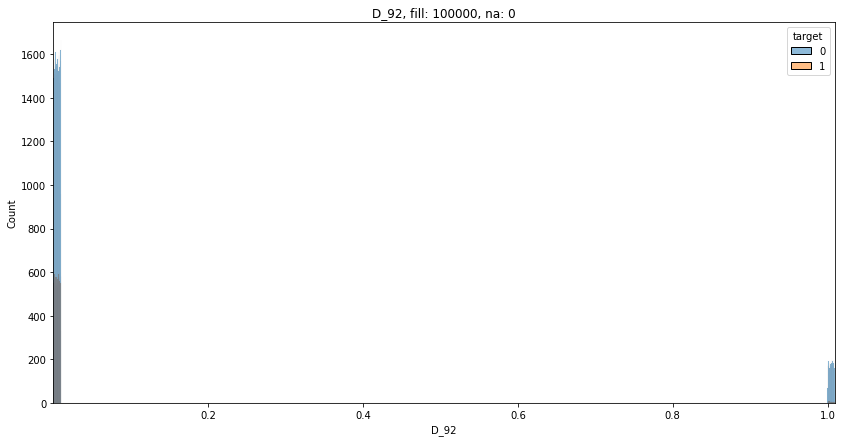

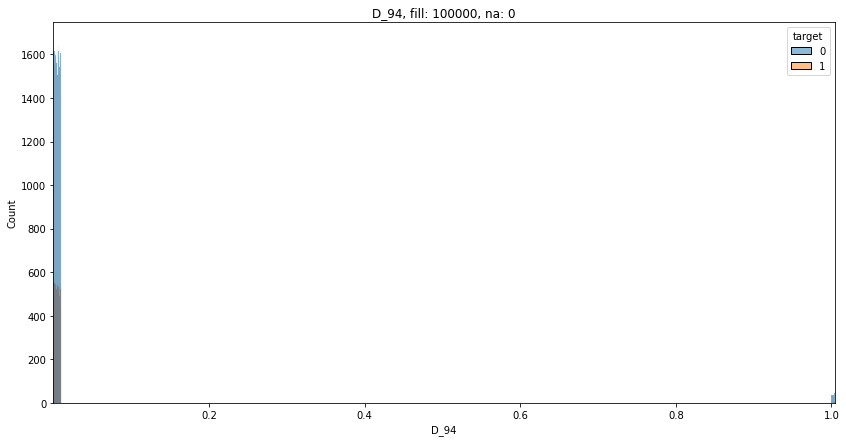

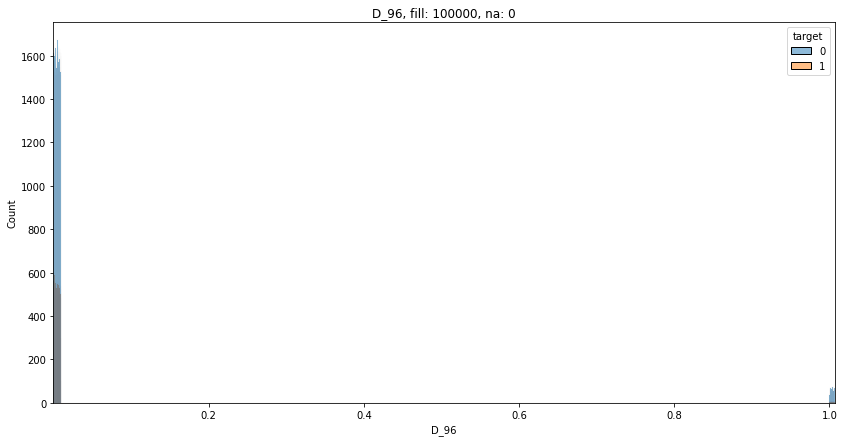

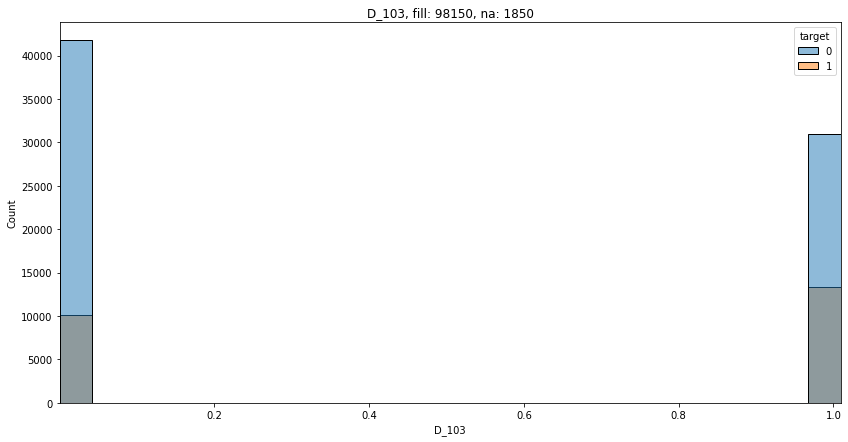

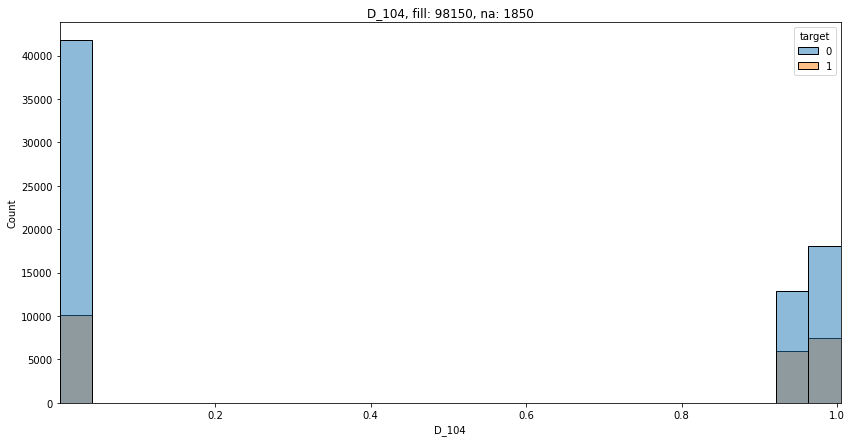

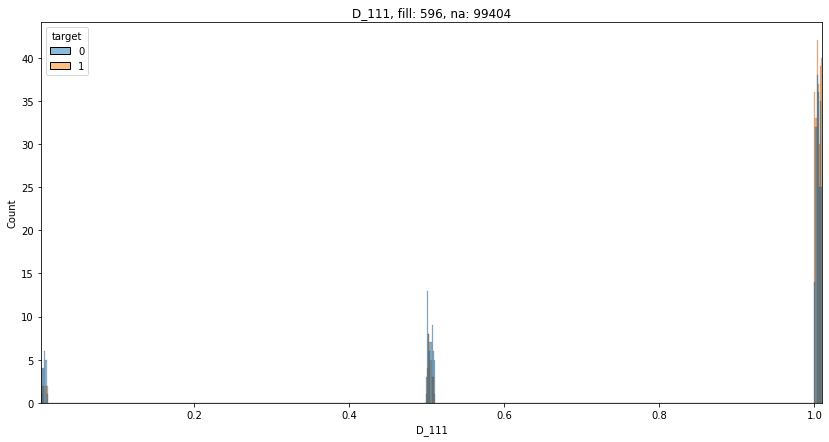

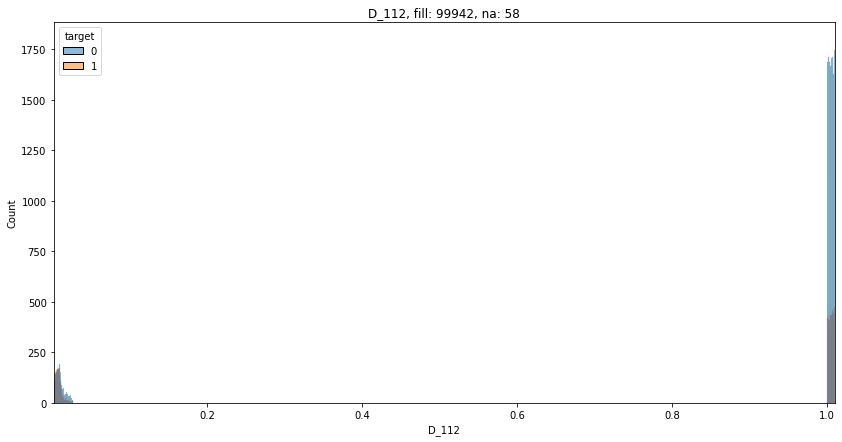

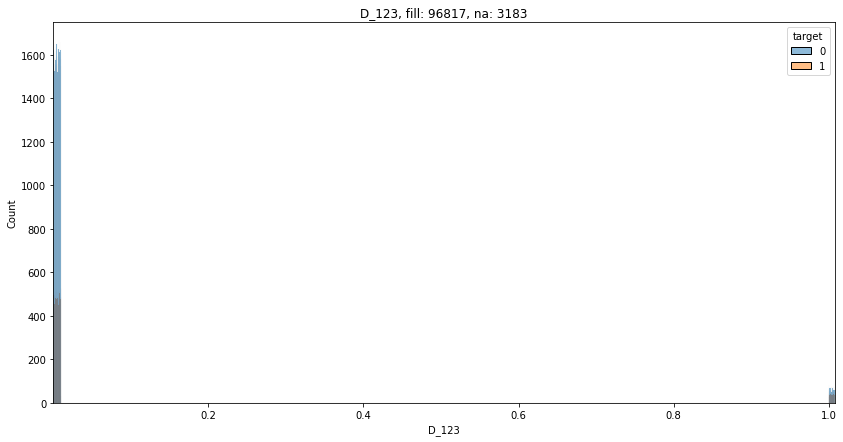

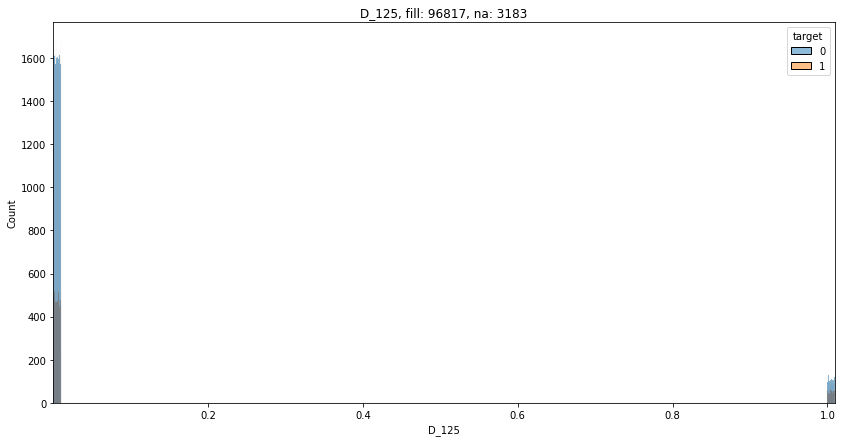

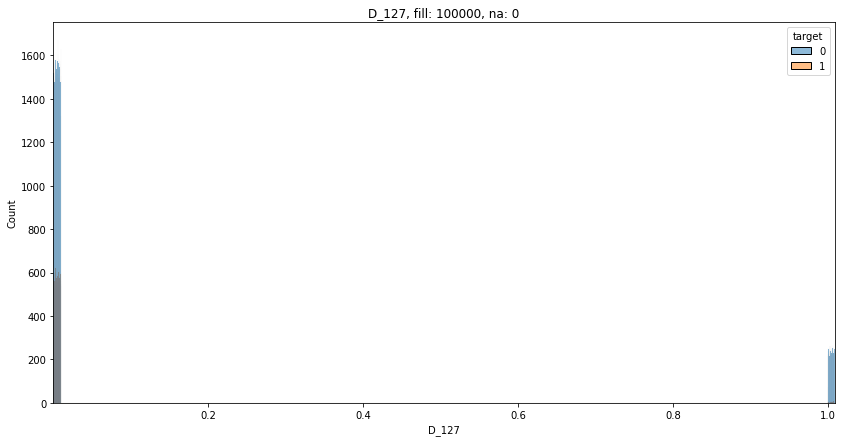

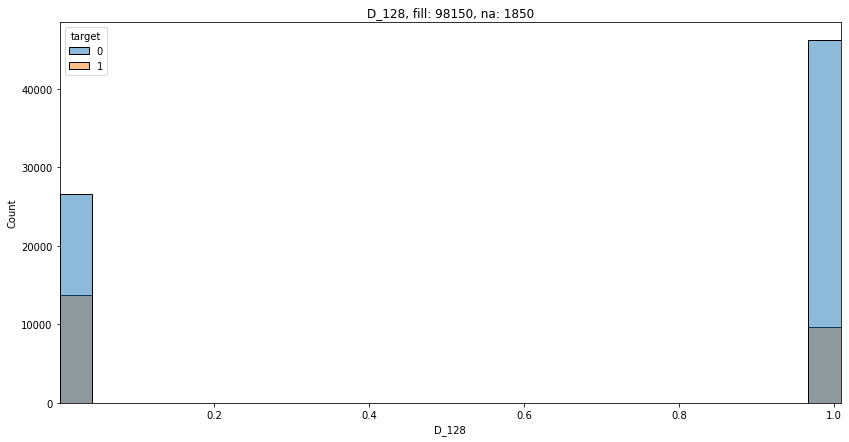

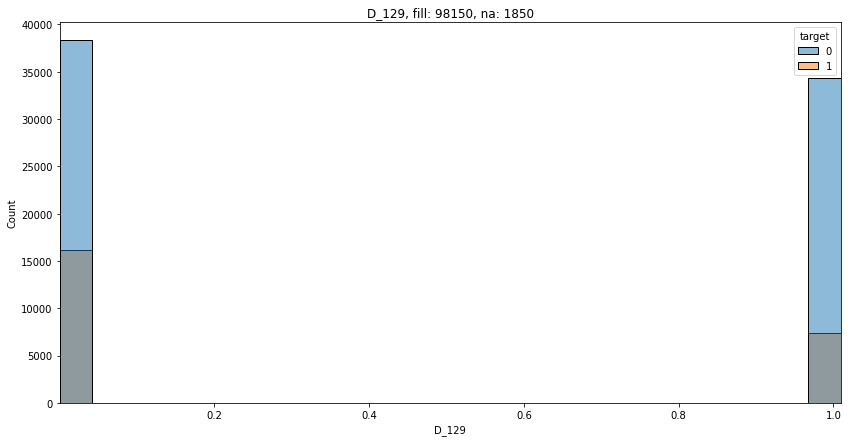

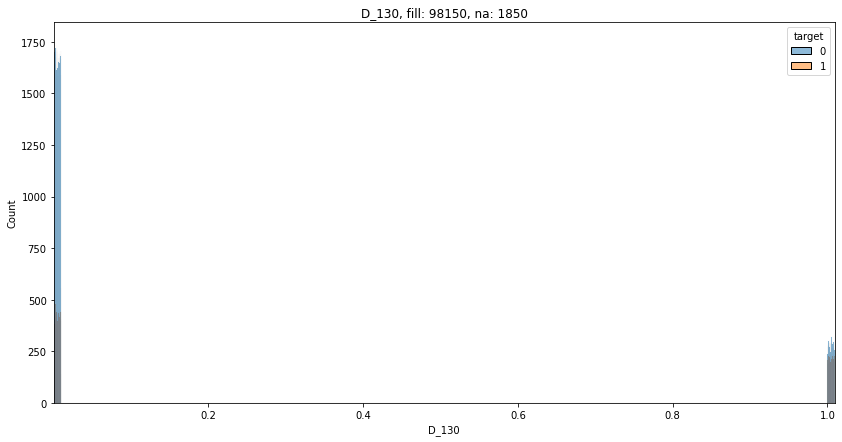

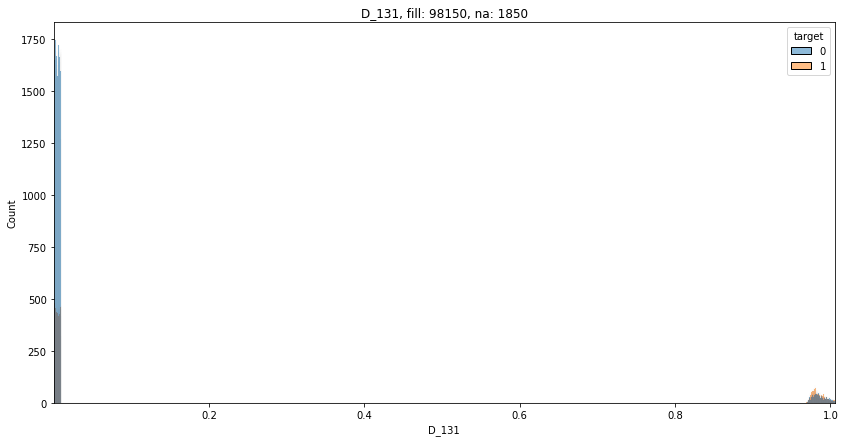

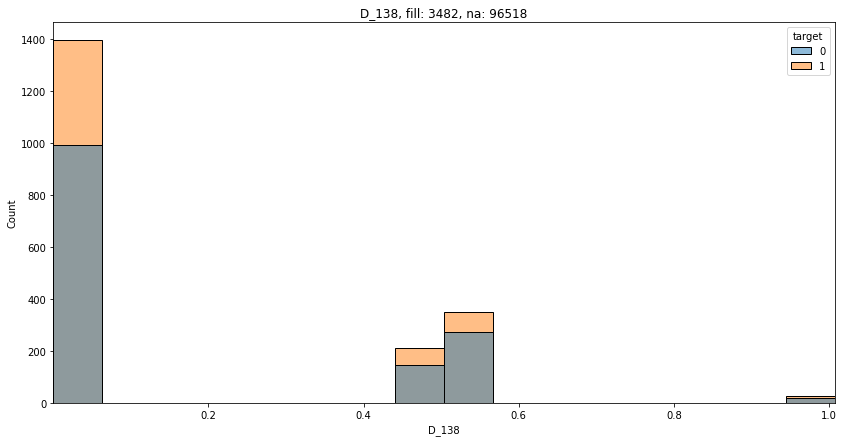

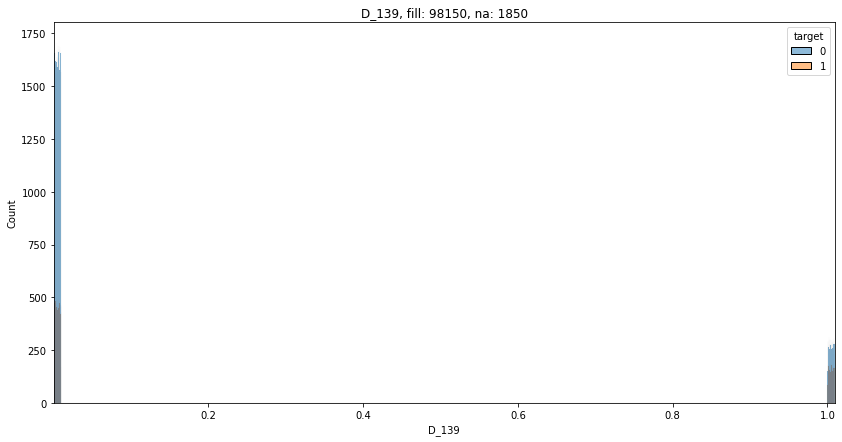

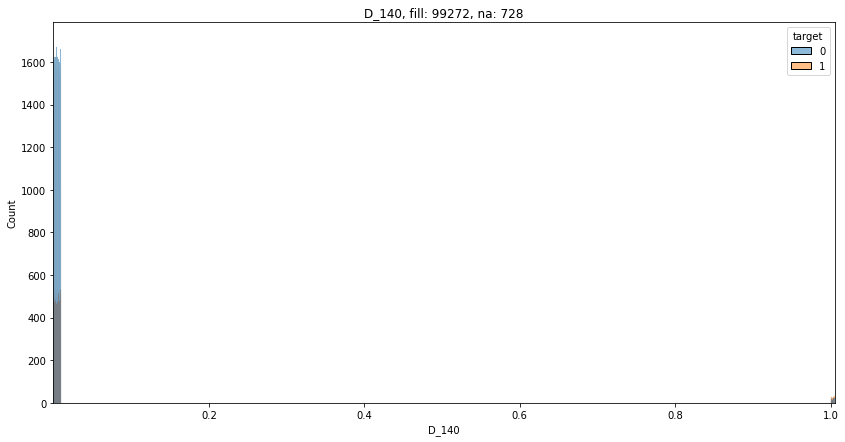

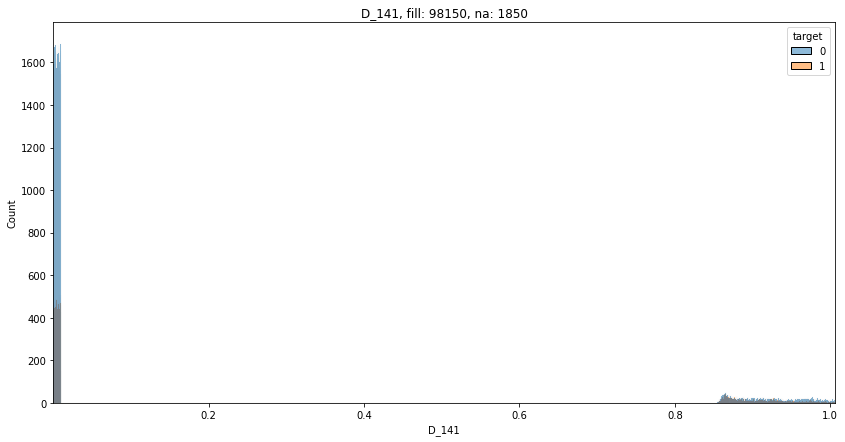

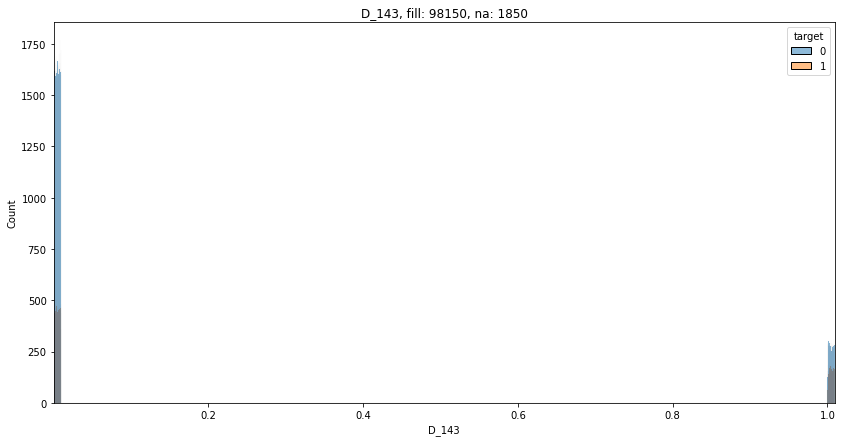

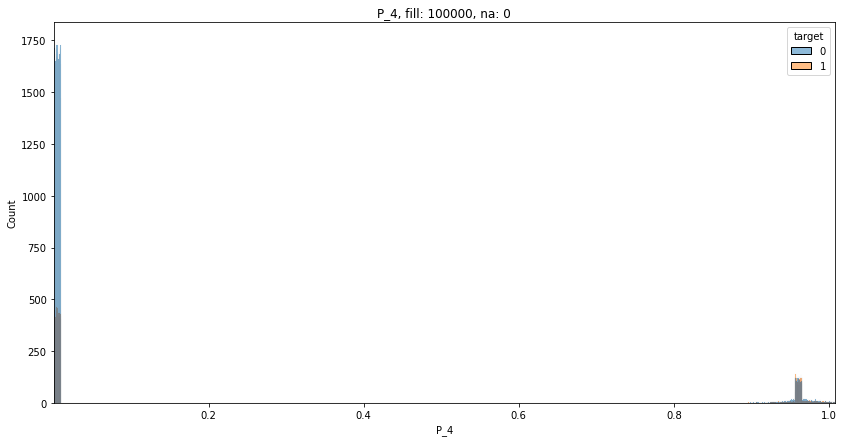

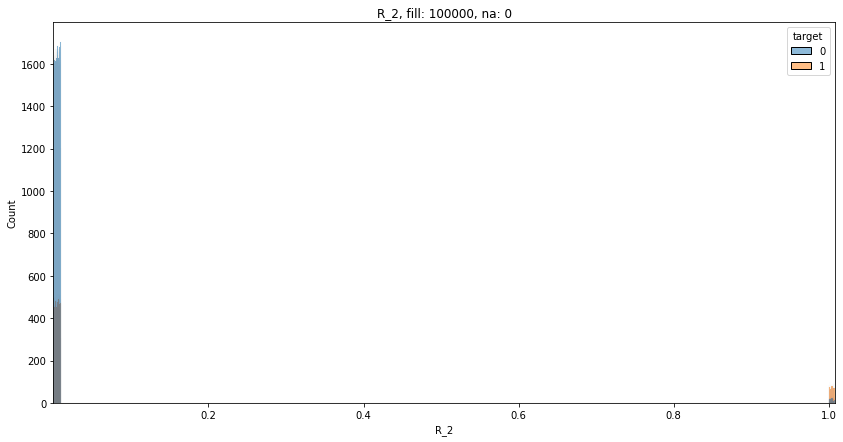

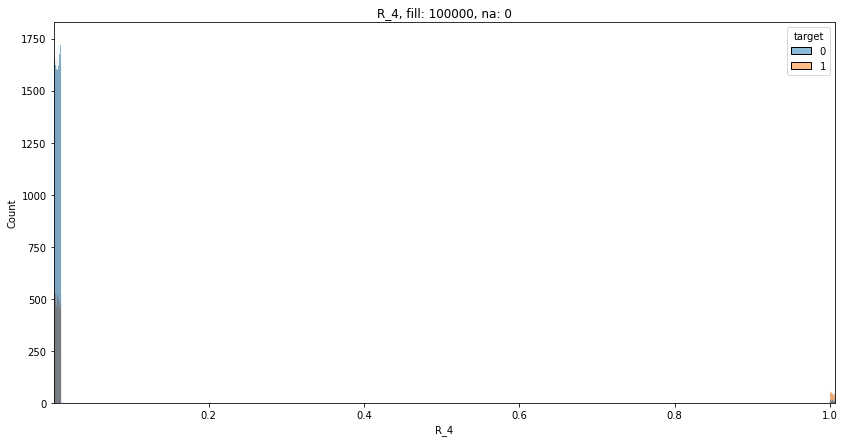

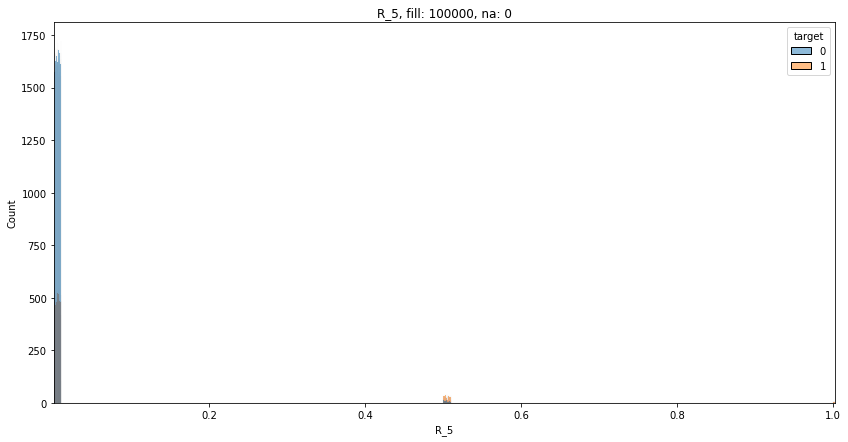

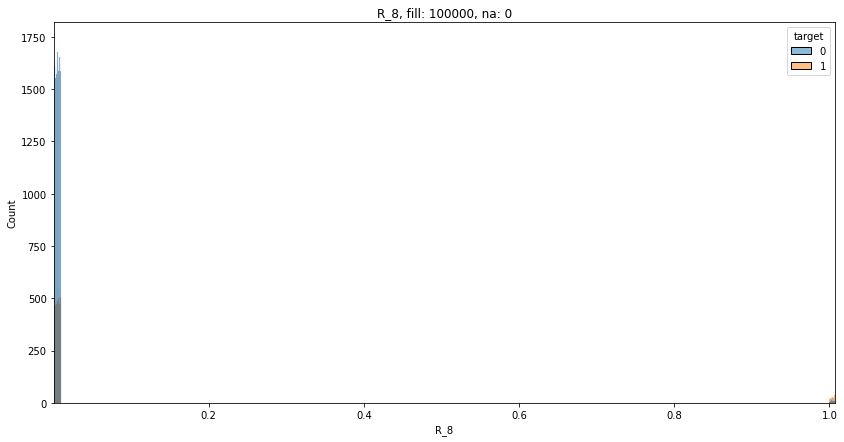

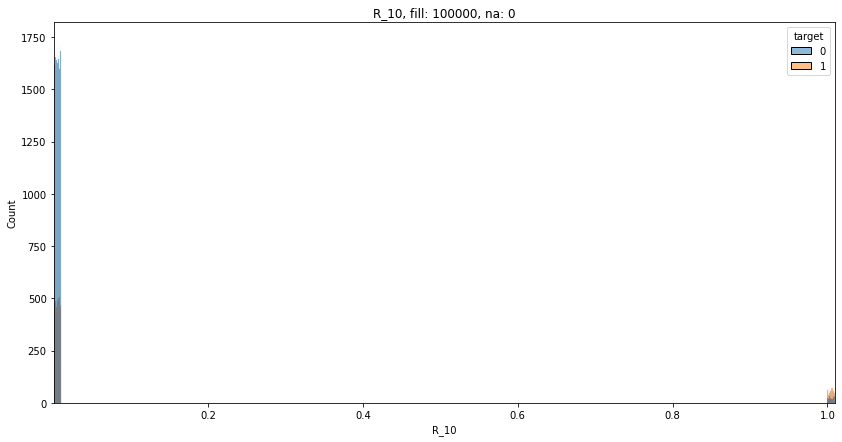

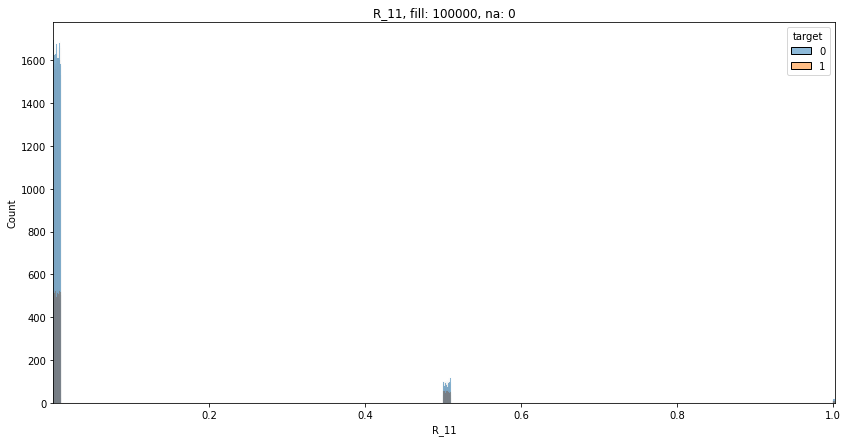

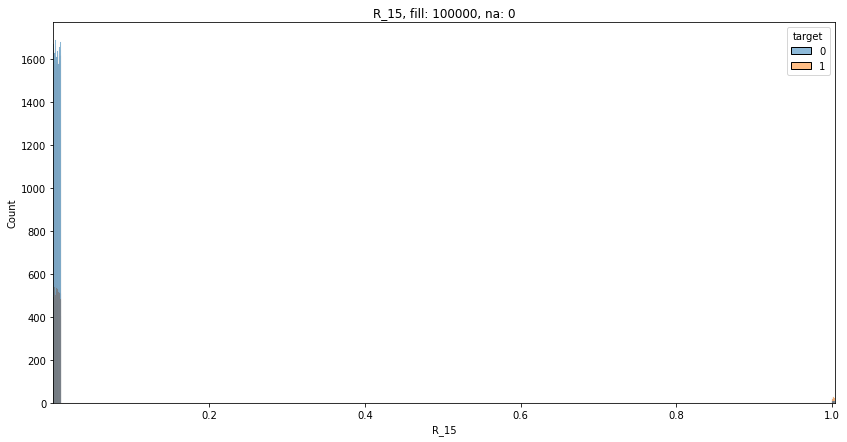

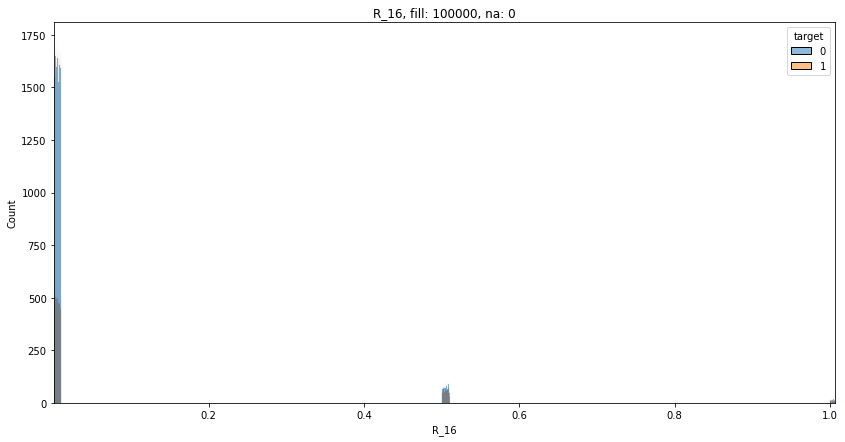

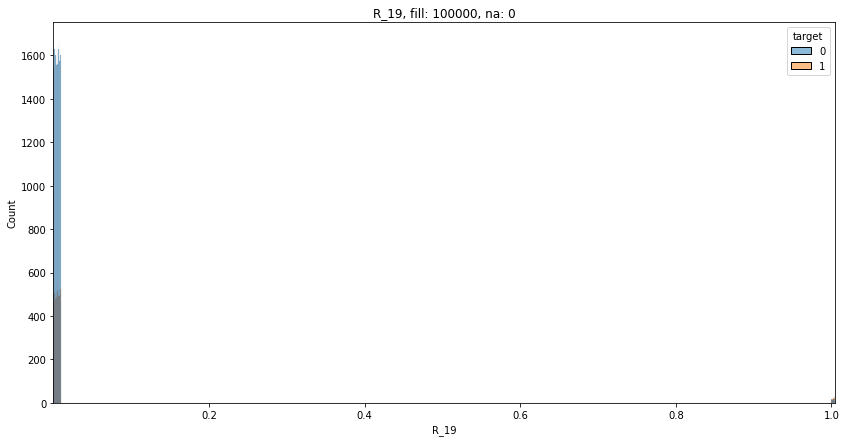

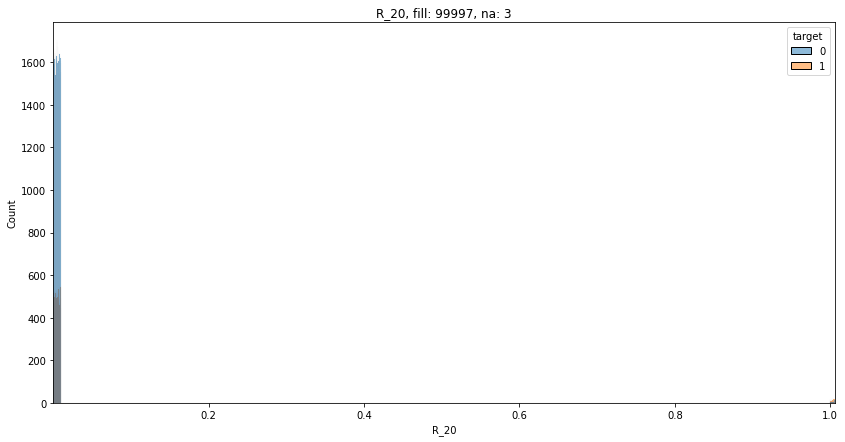

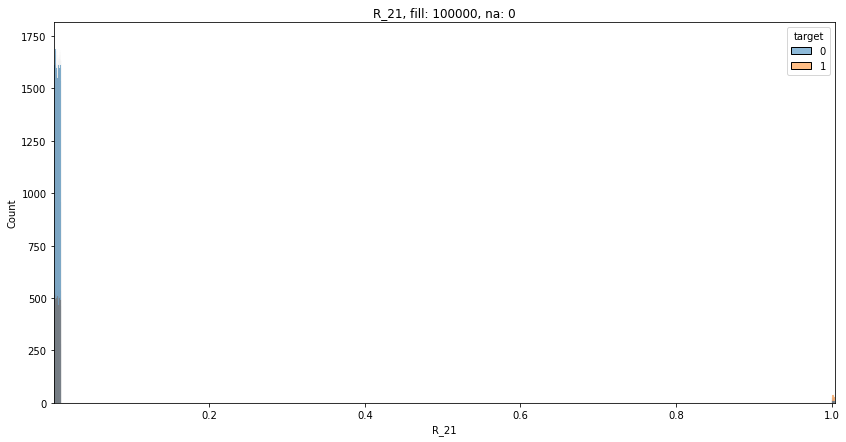

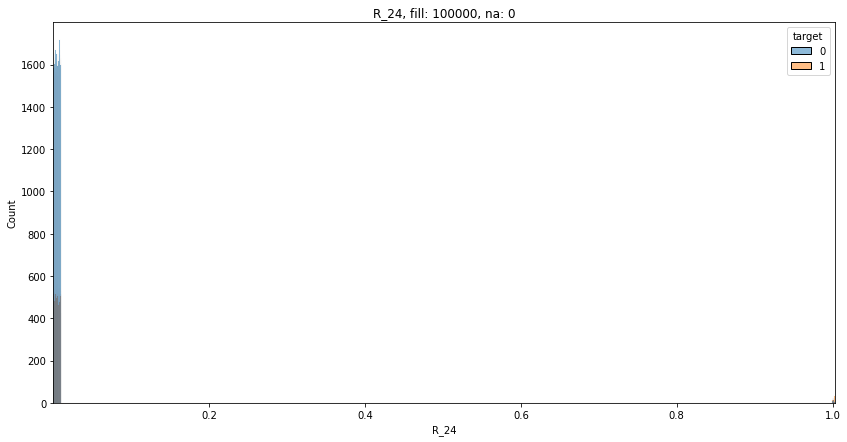

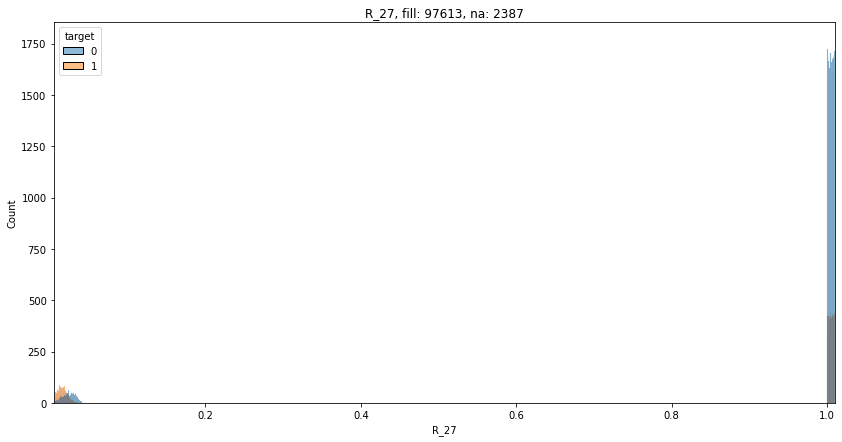

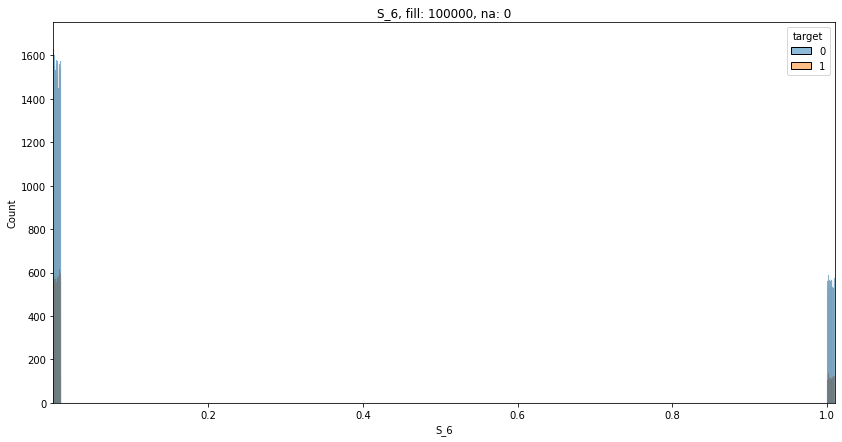

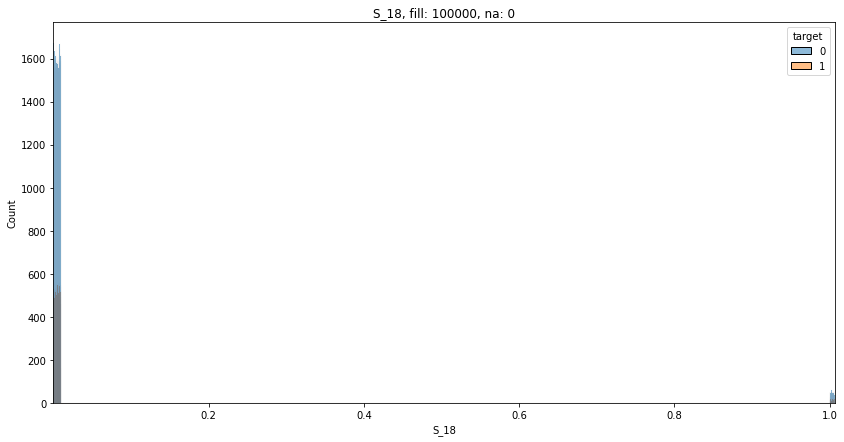

In [10]:
plot_features_hist(train, features.origin_groups["binary"], quantile_alpha=0.01)

### Discrete 

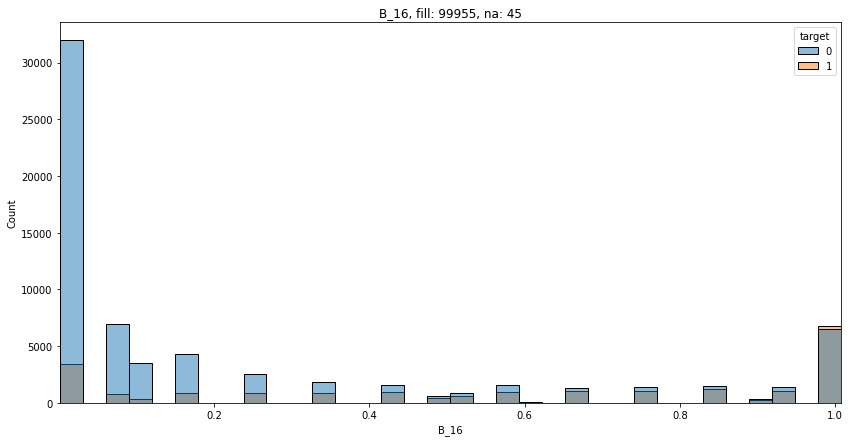

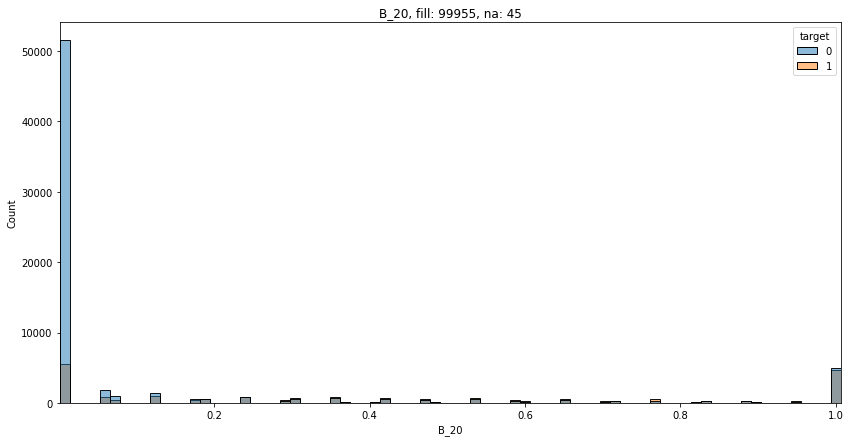

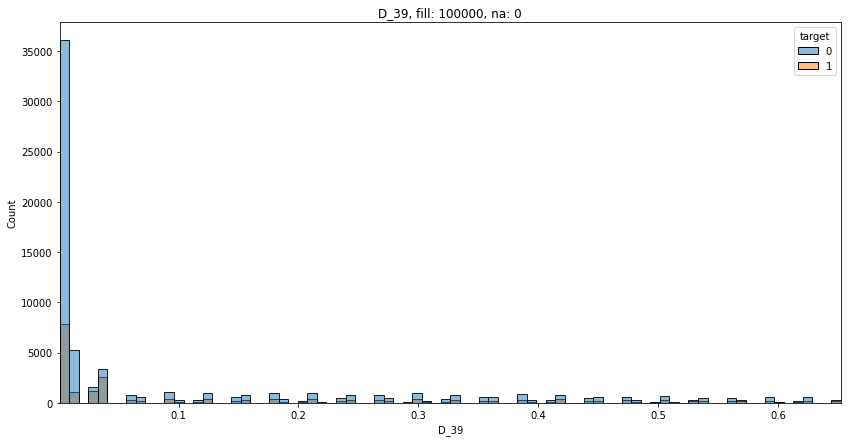

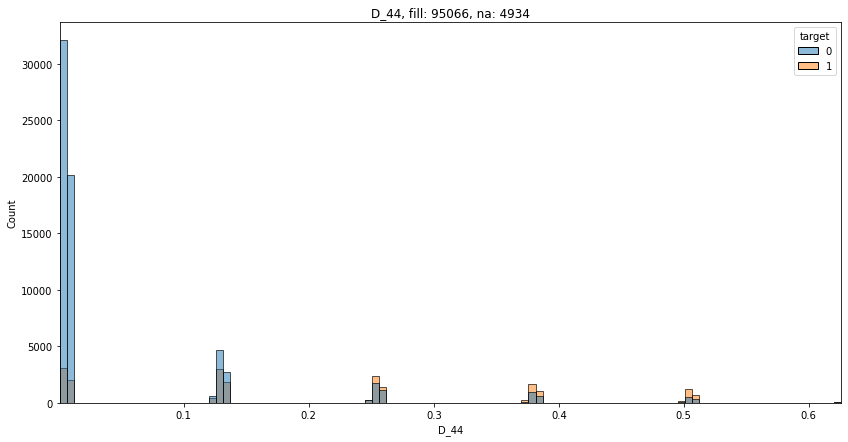

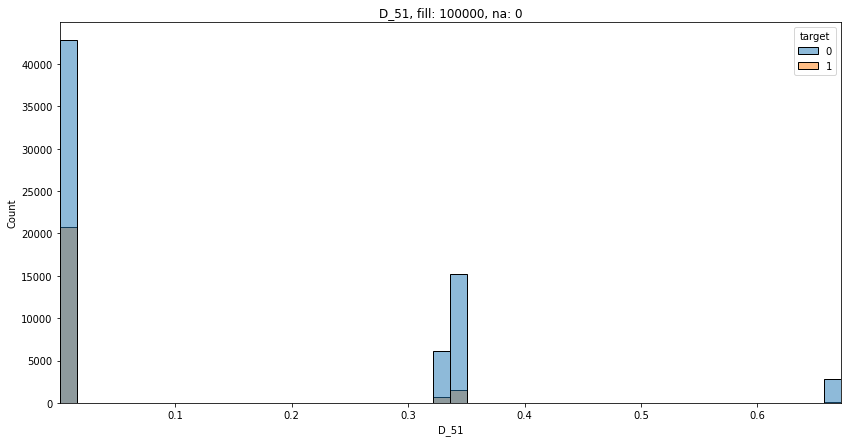

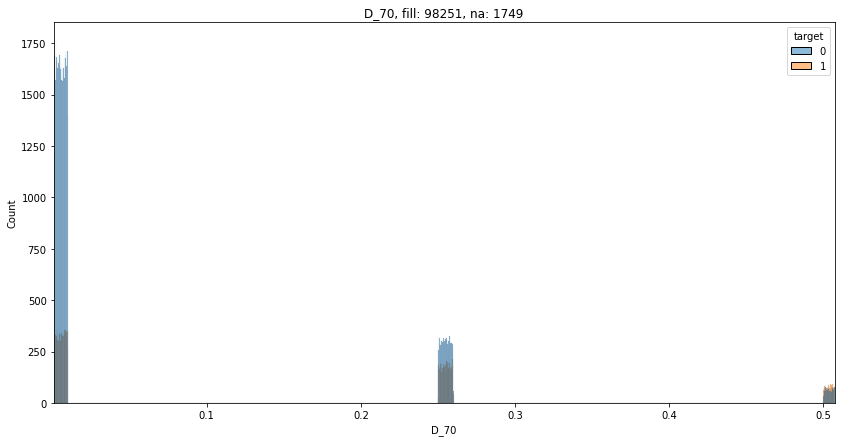

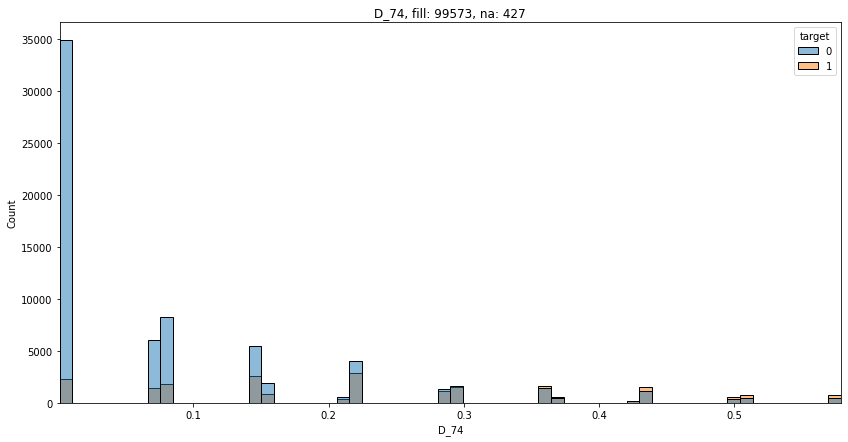

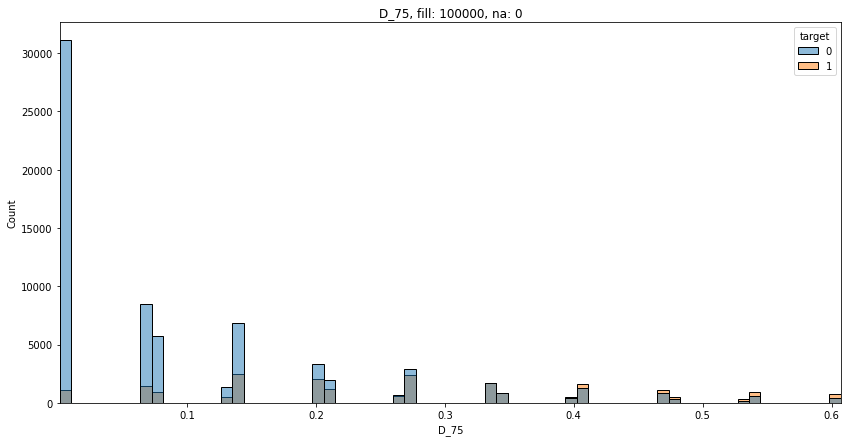

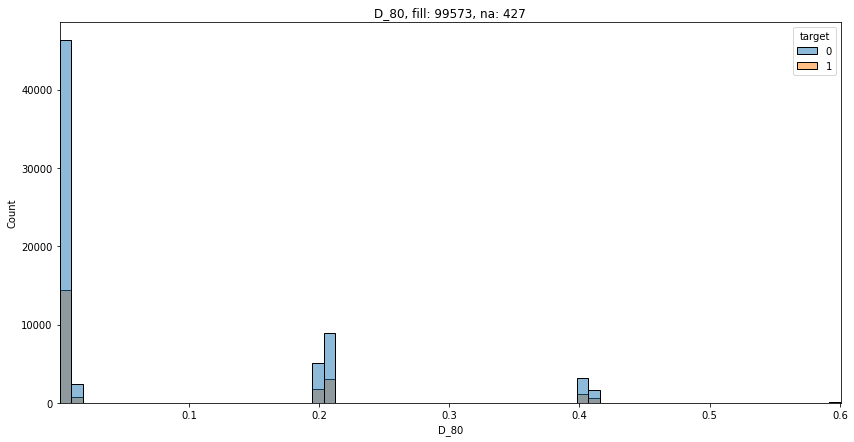

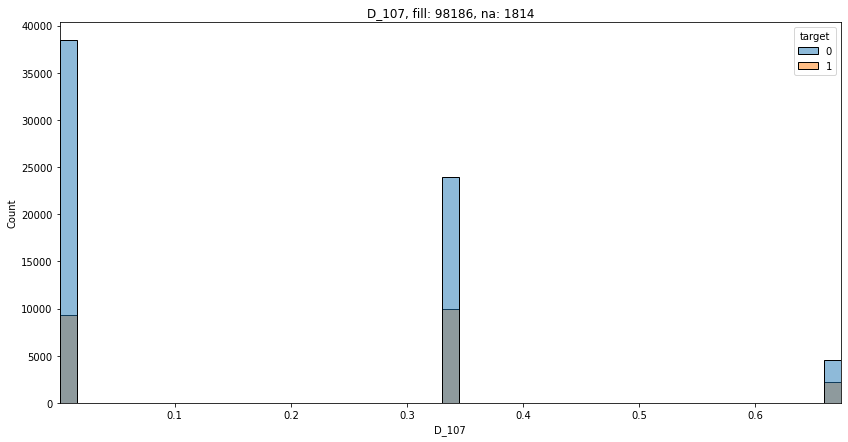

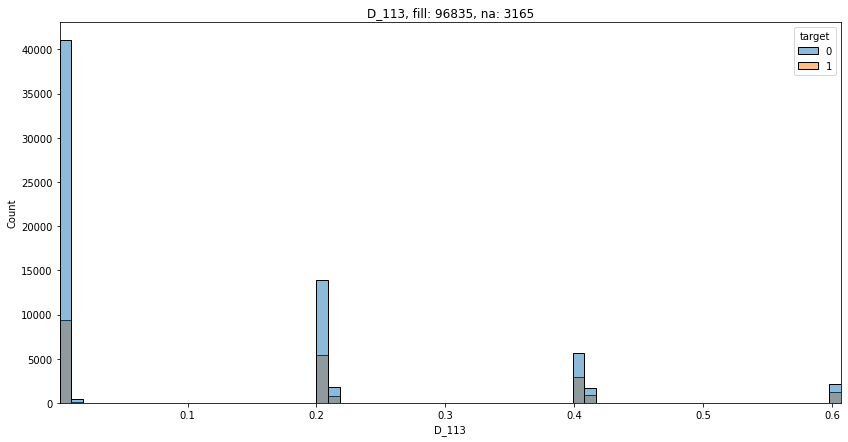

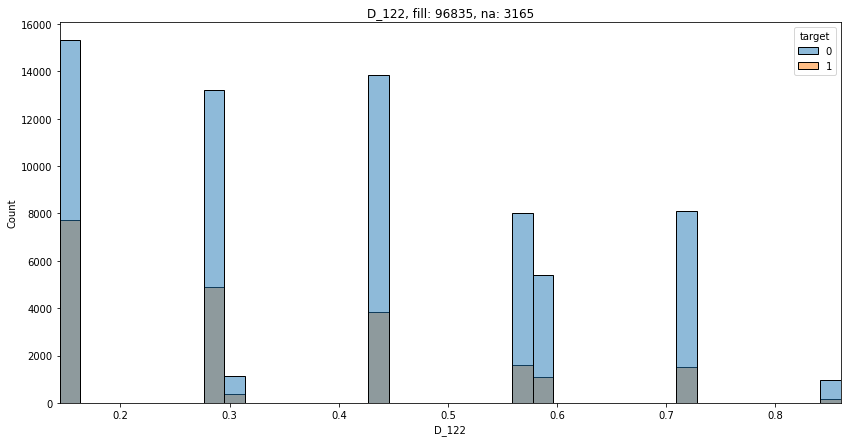

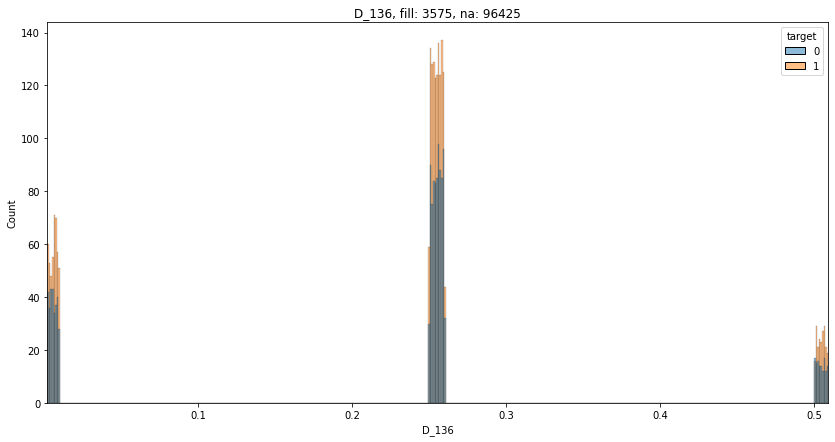

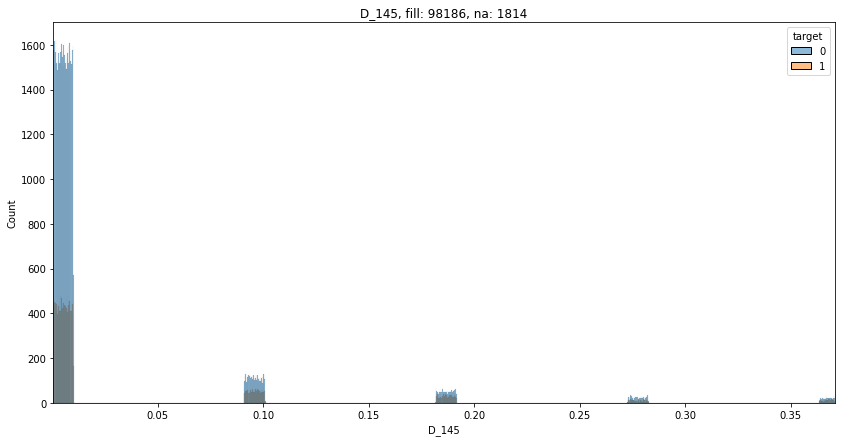

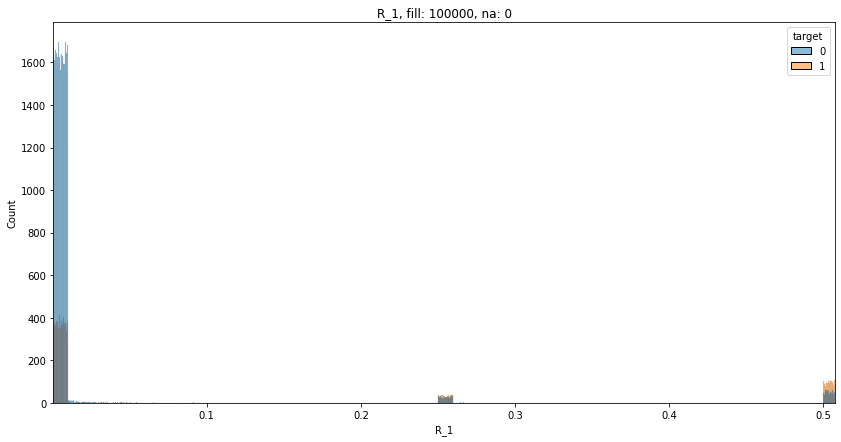

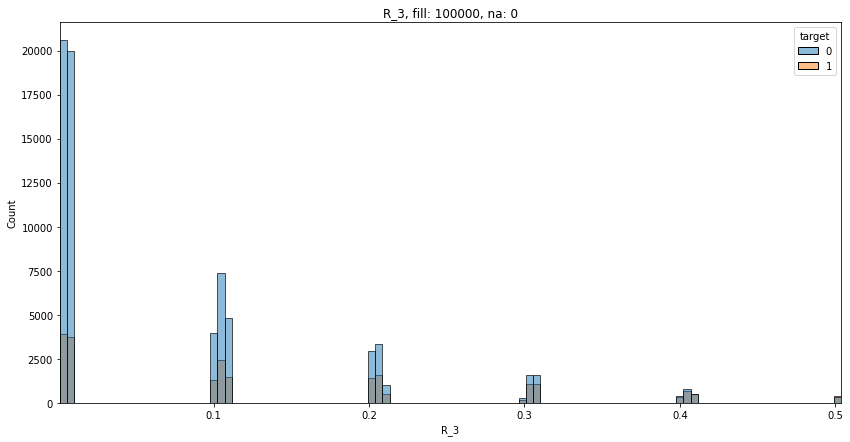

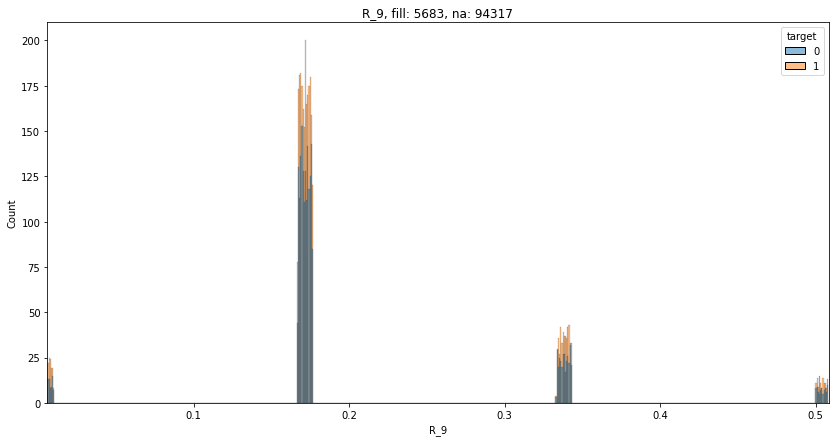

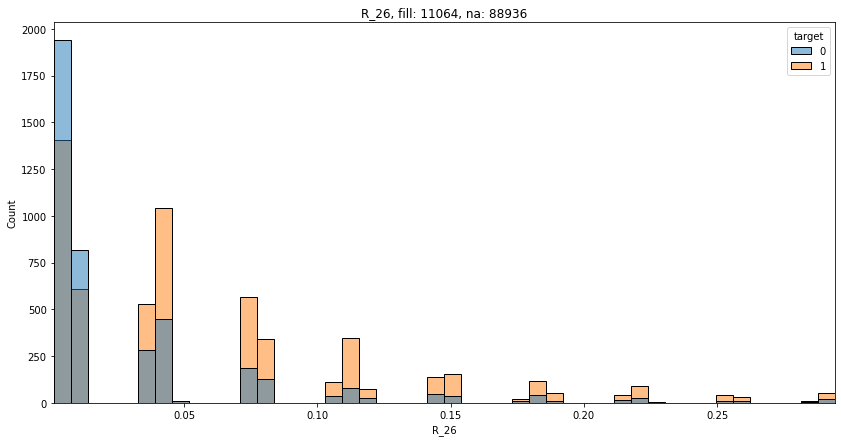

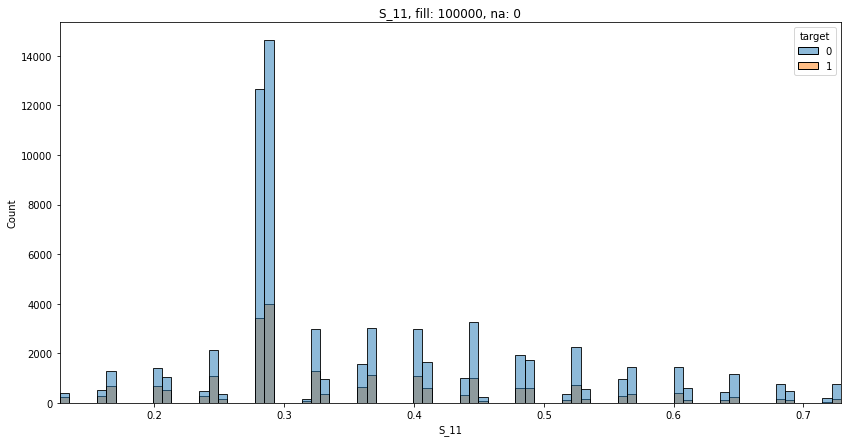

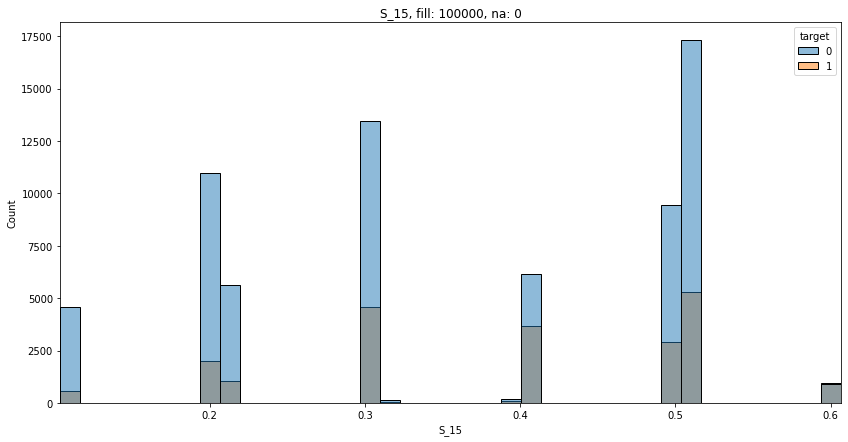

In [9]:
plot_features_hist(train, features.origin_groups["discrete"], quantile_alpha=0.05)

### Other 

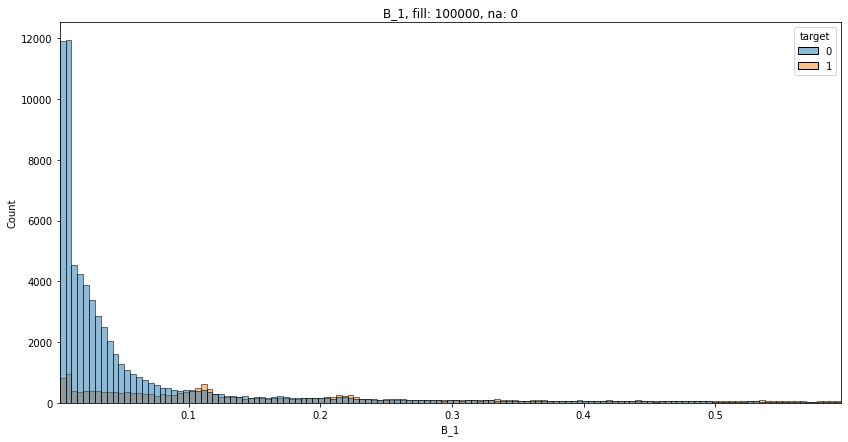

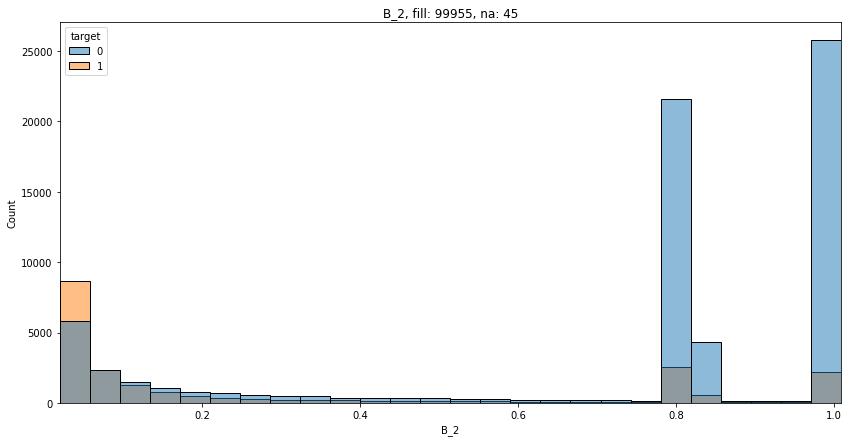

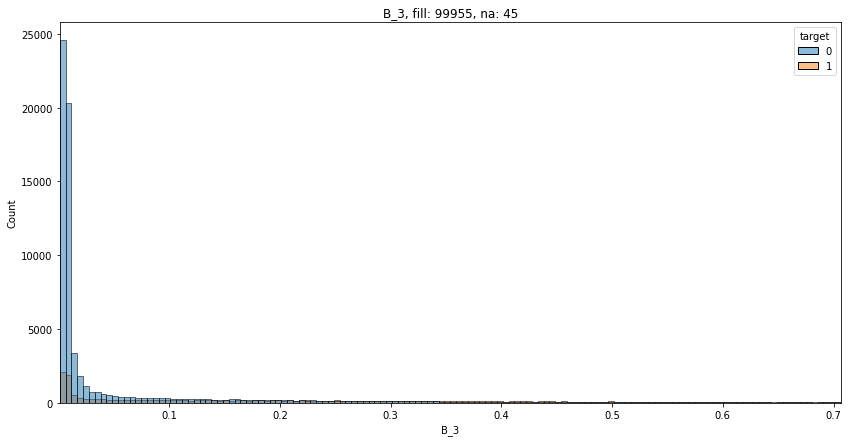

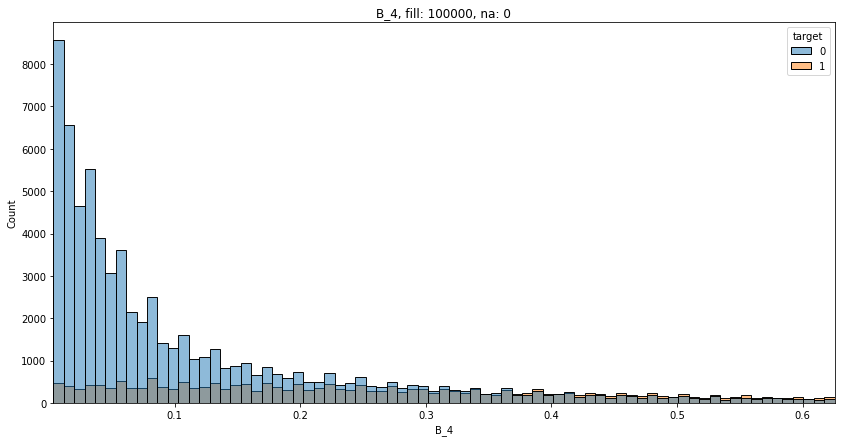

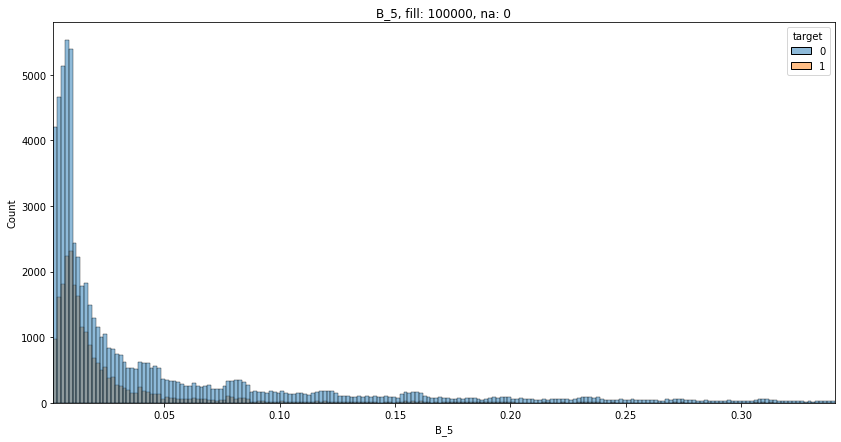

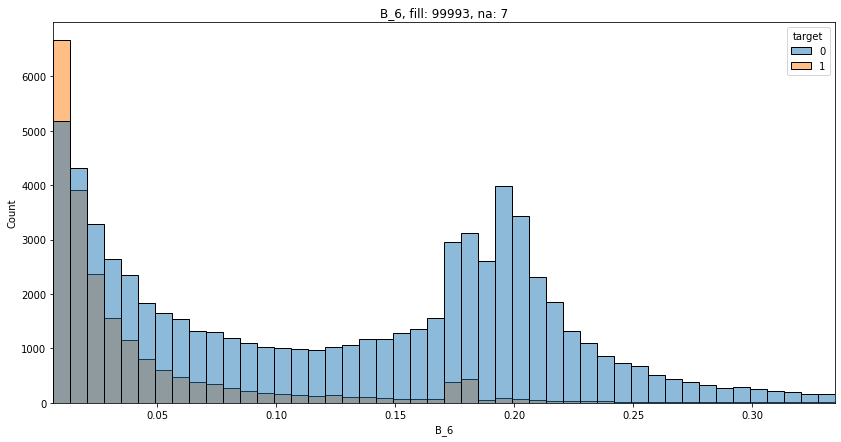

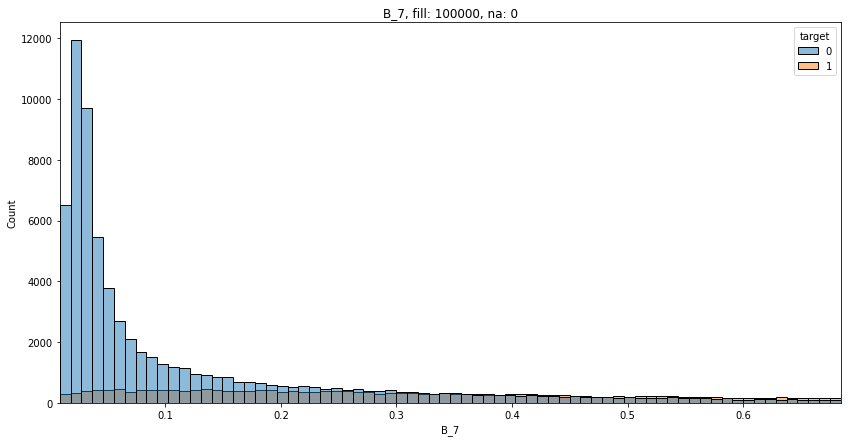

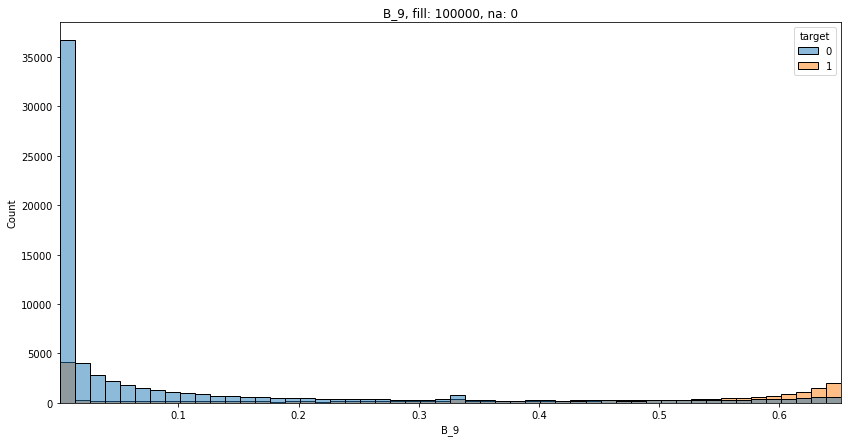

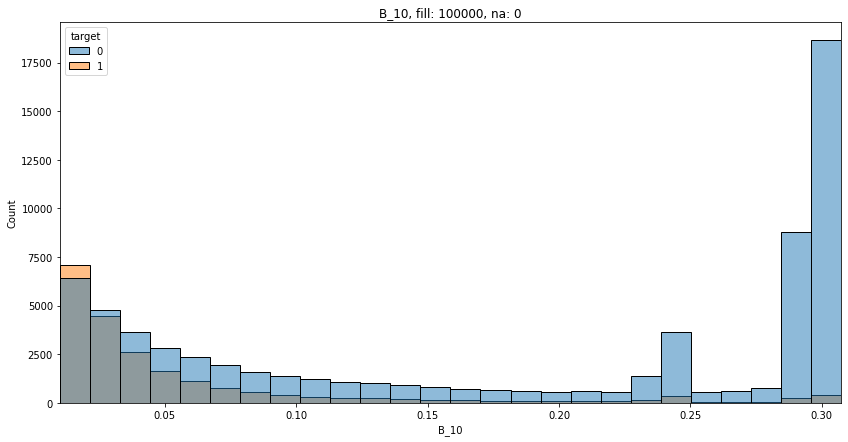

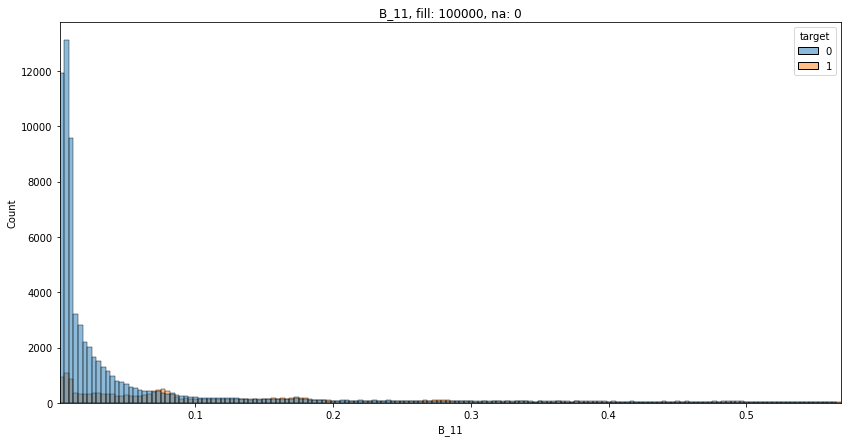

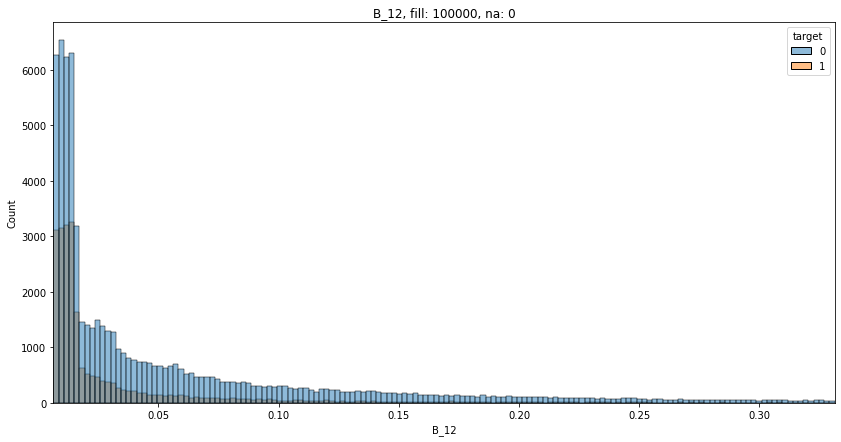

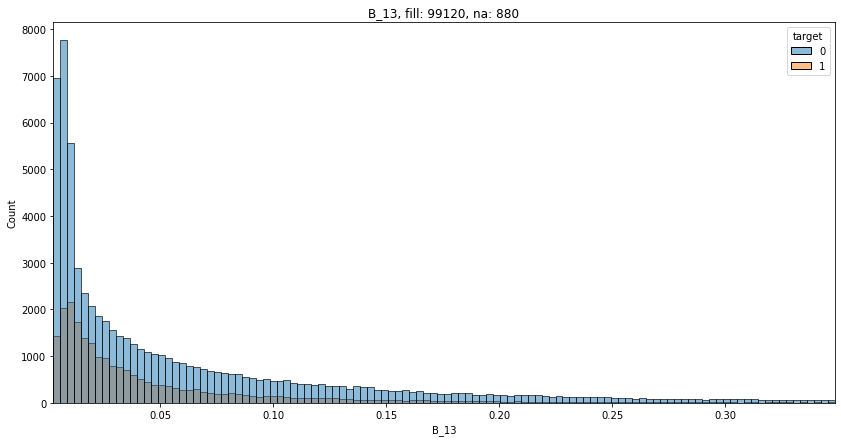

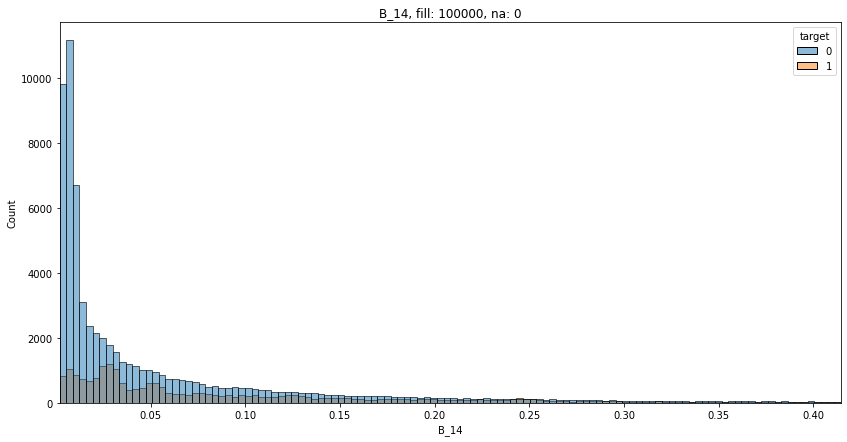

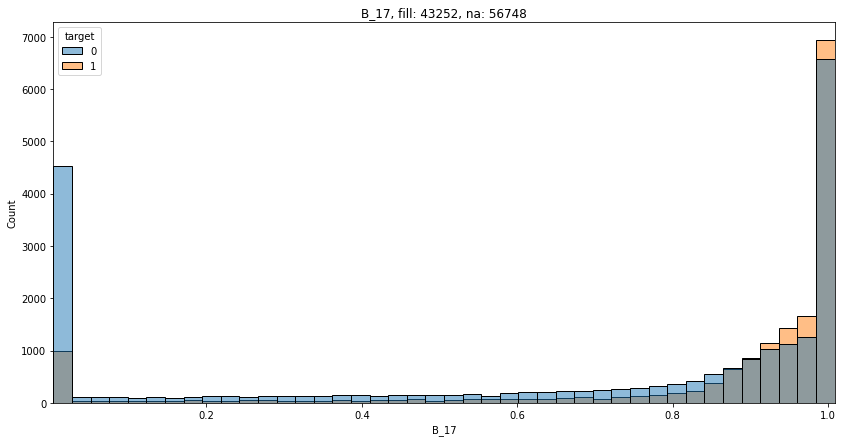

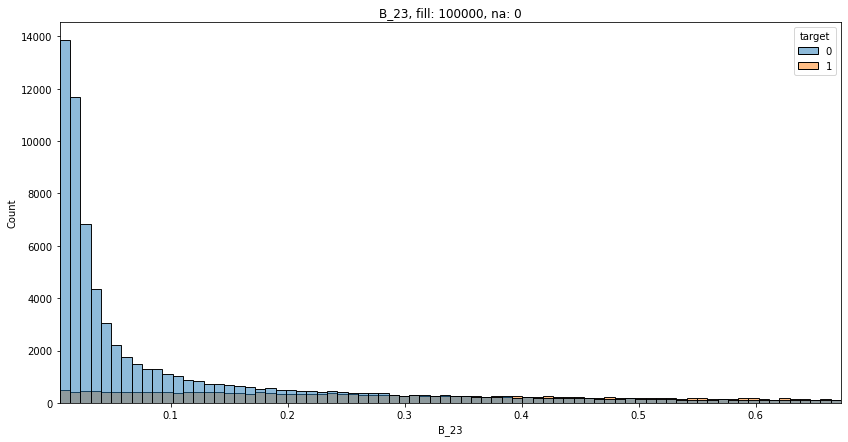

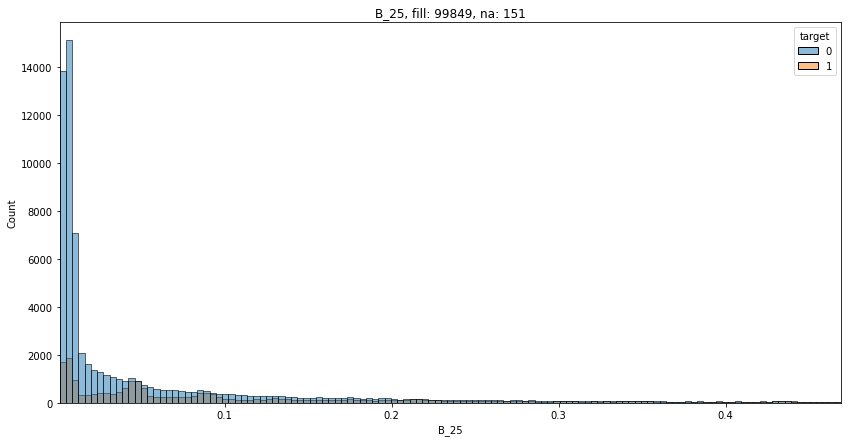

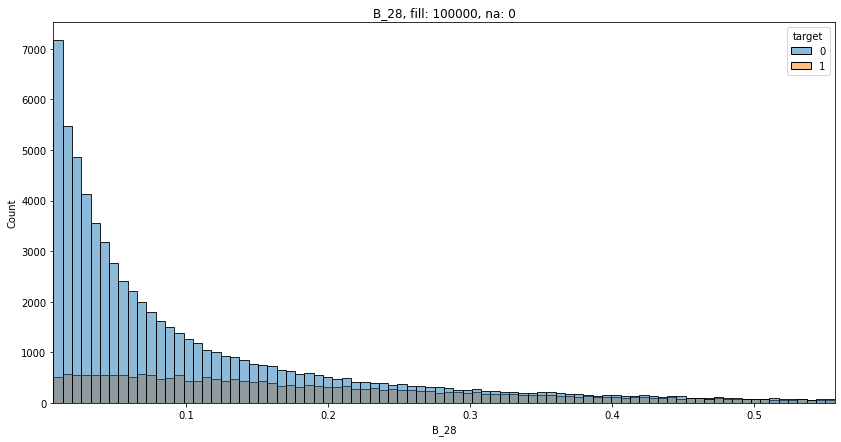

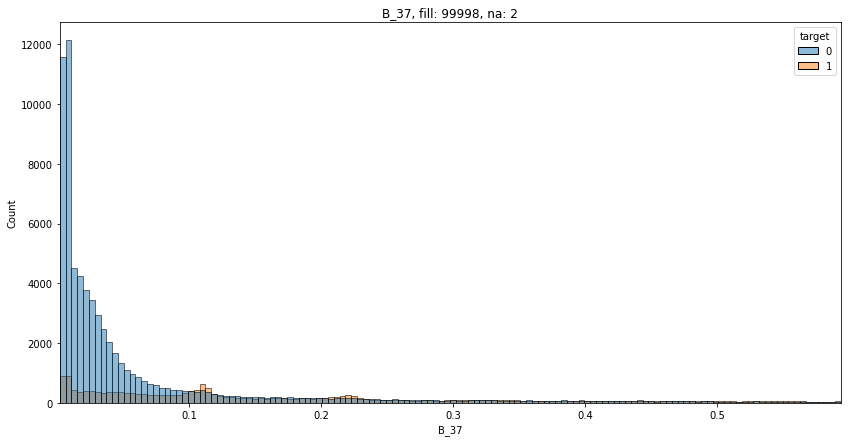

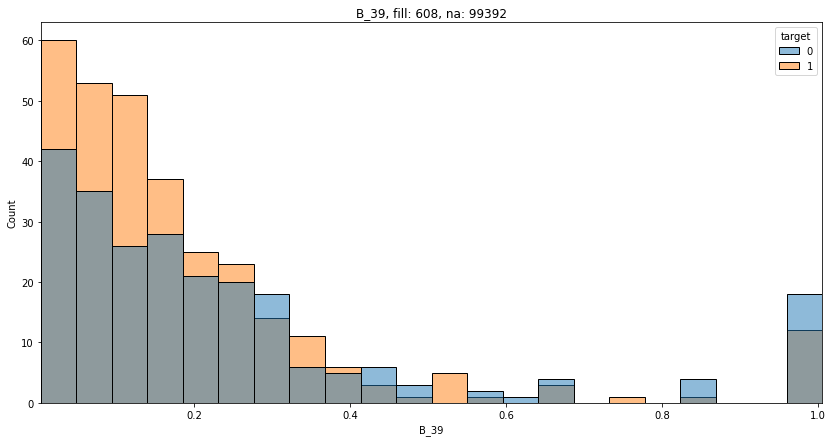

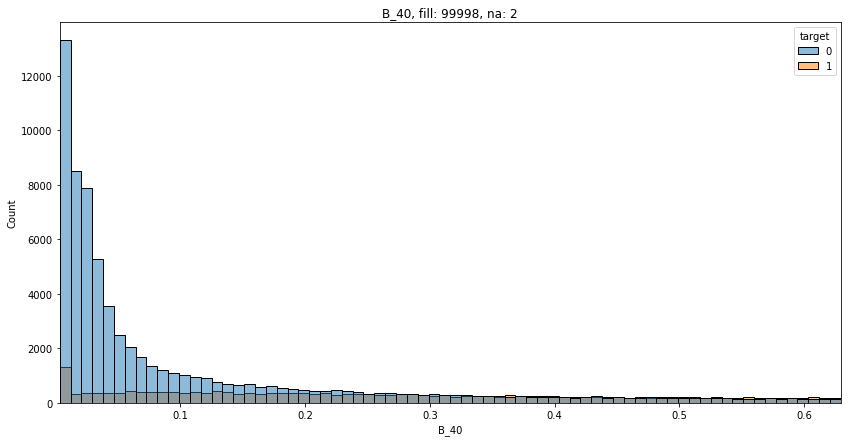

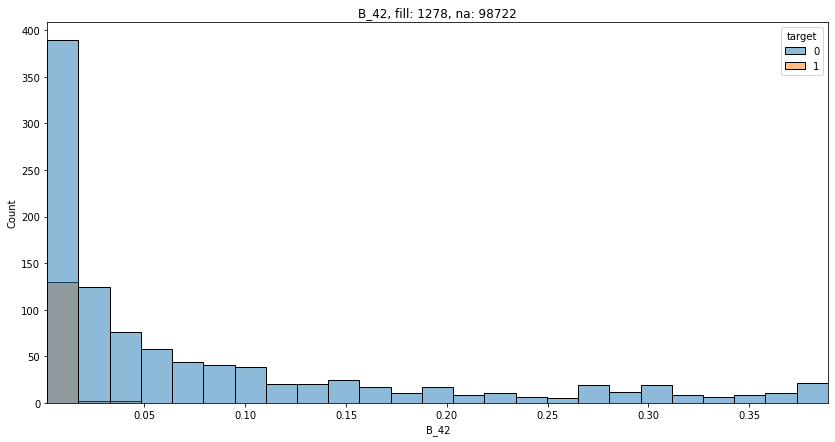

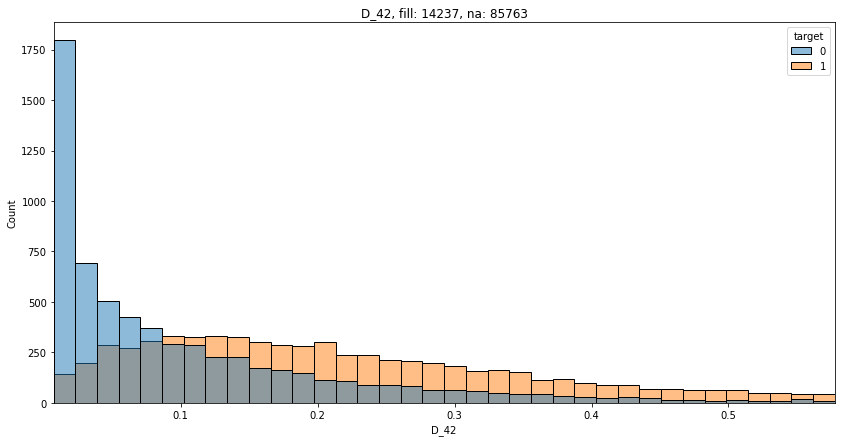

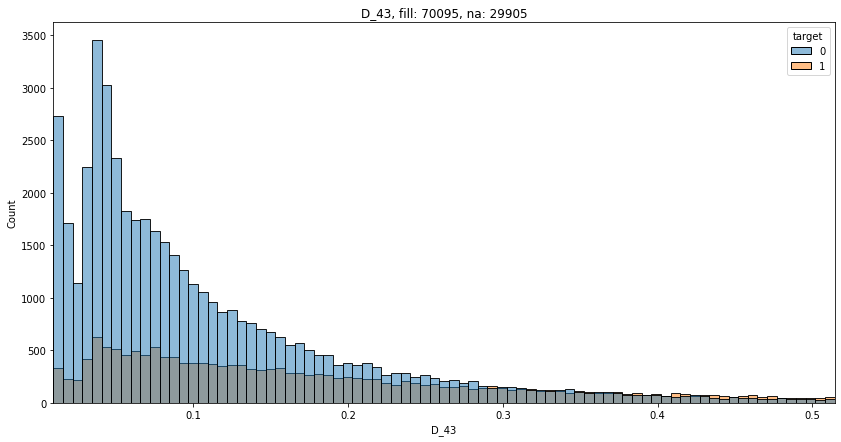

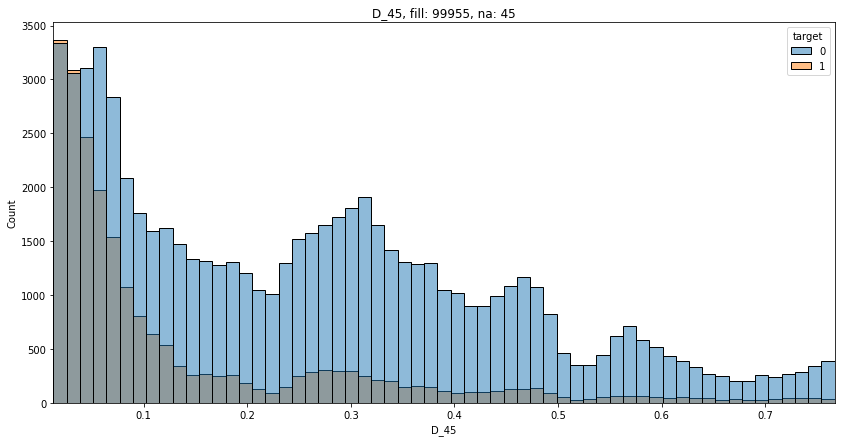

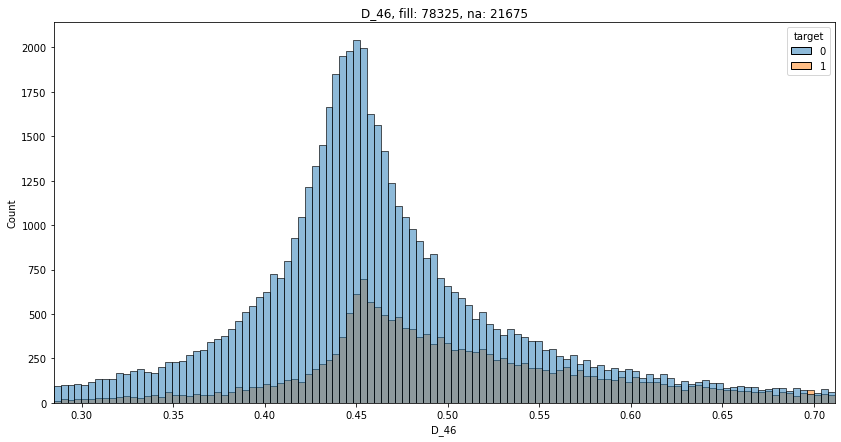

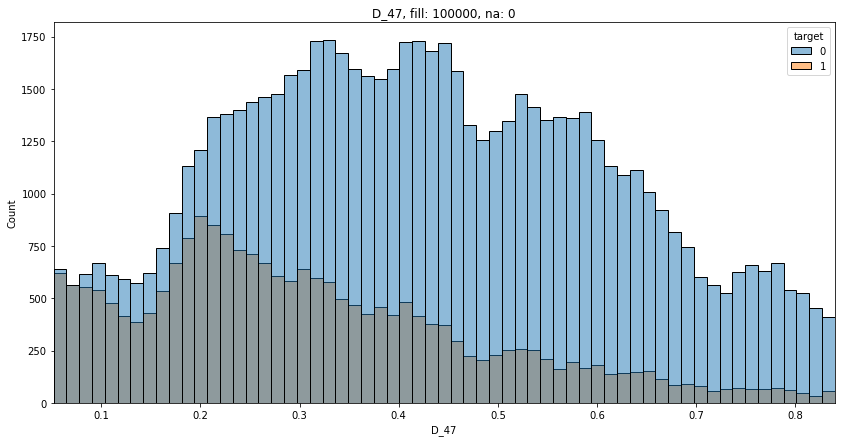

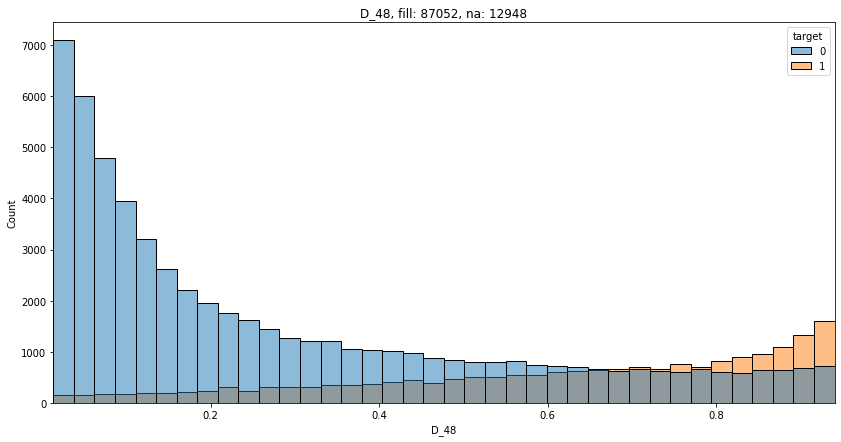

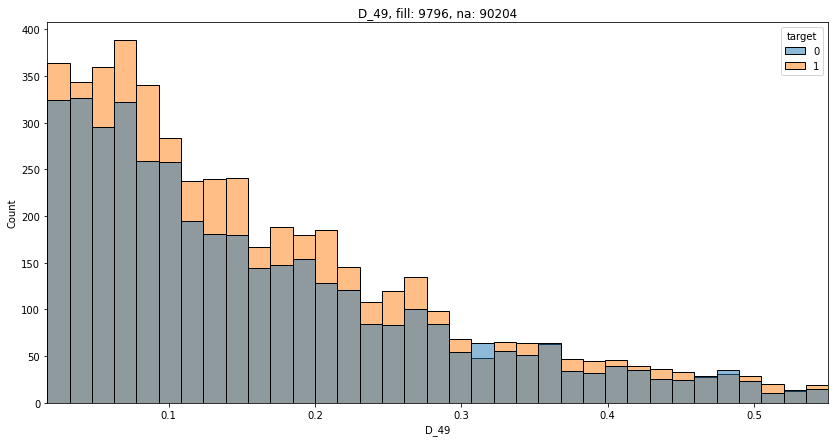

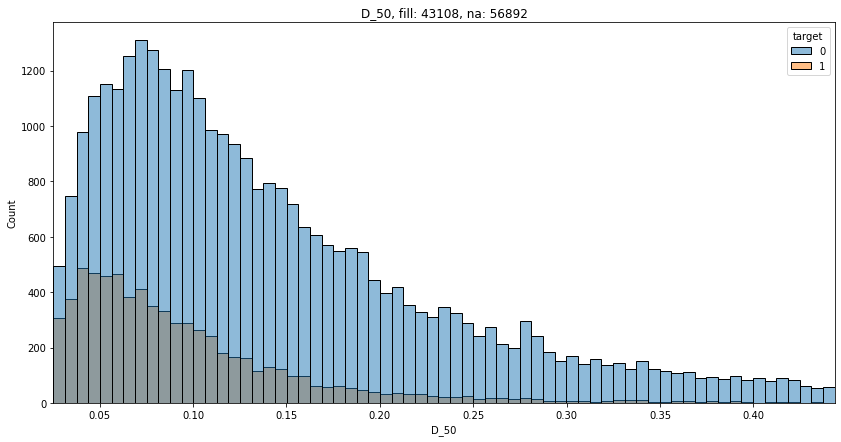

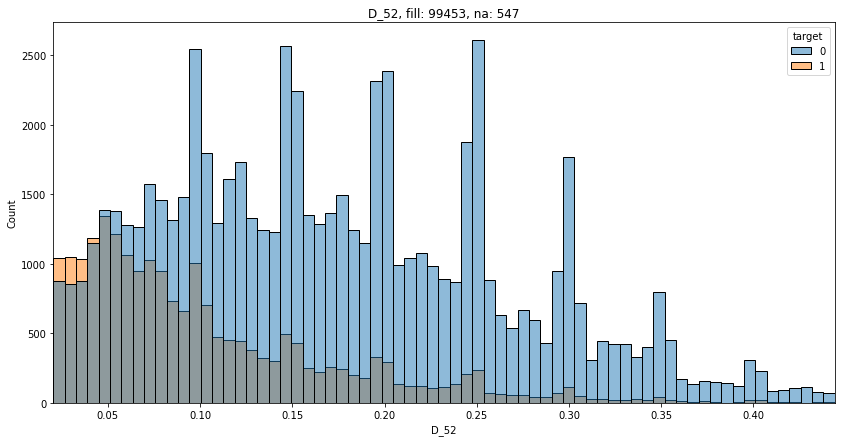

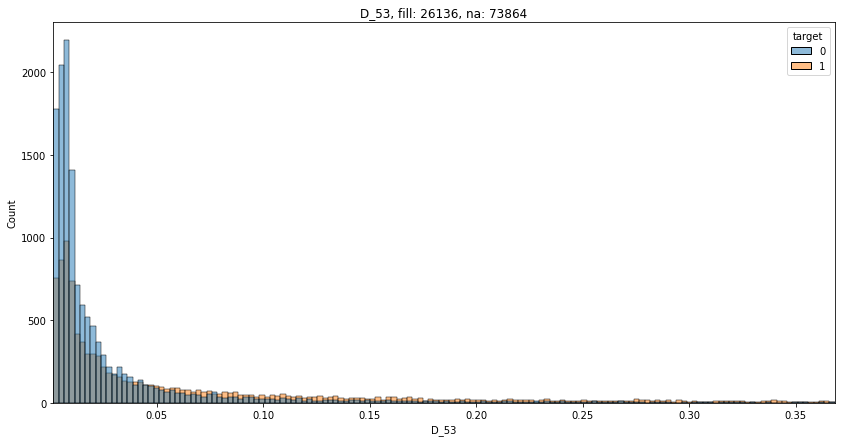

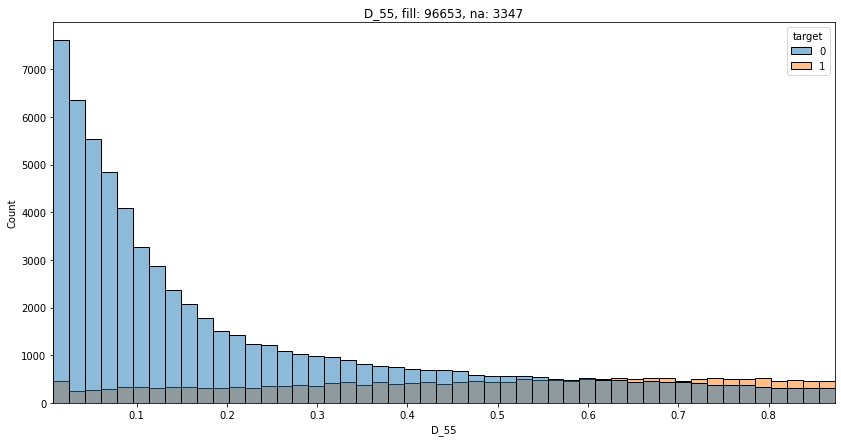

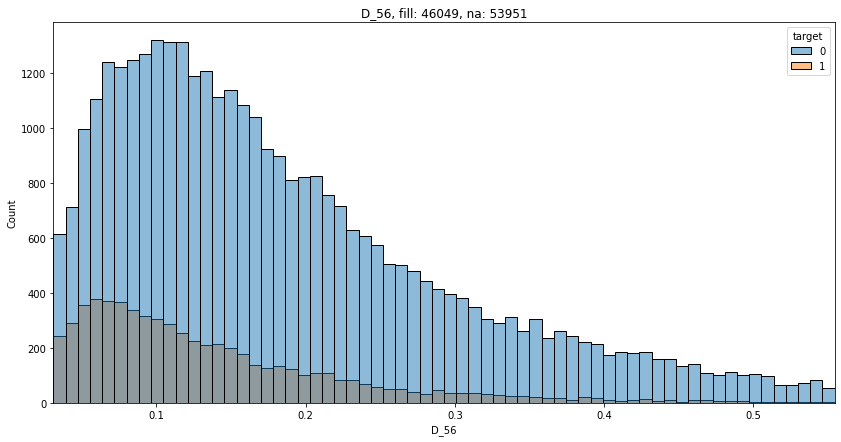

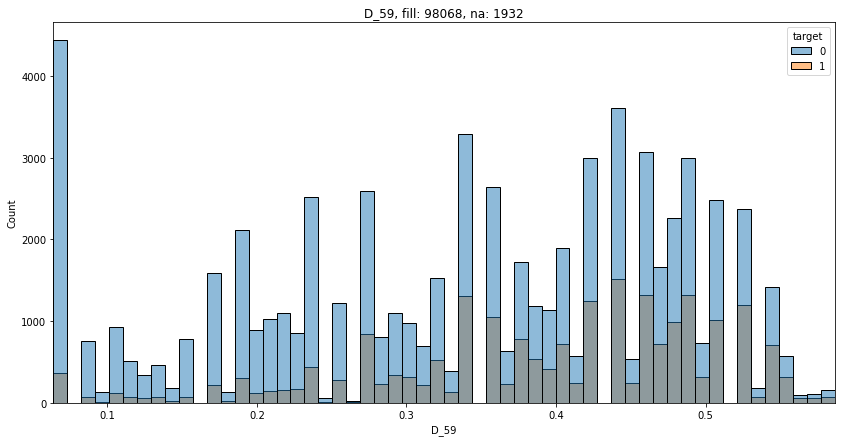

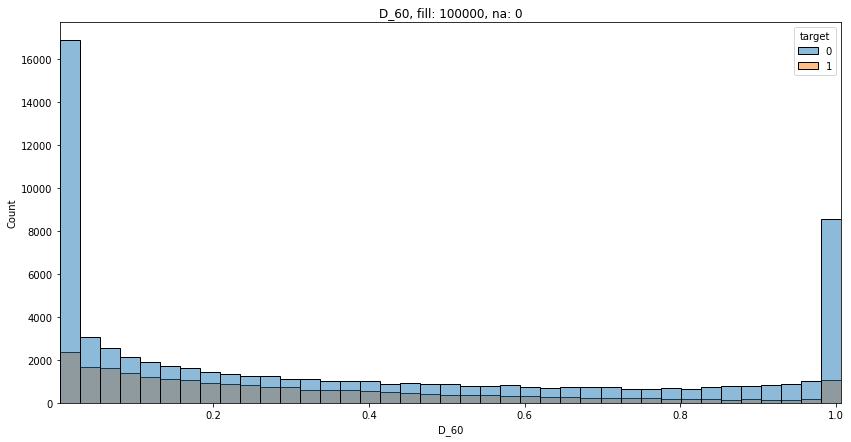

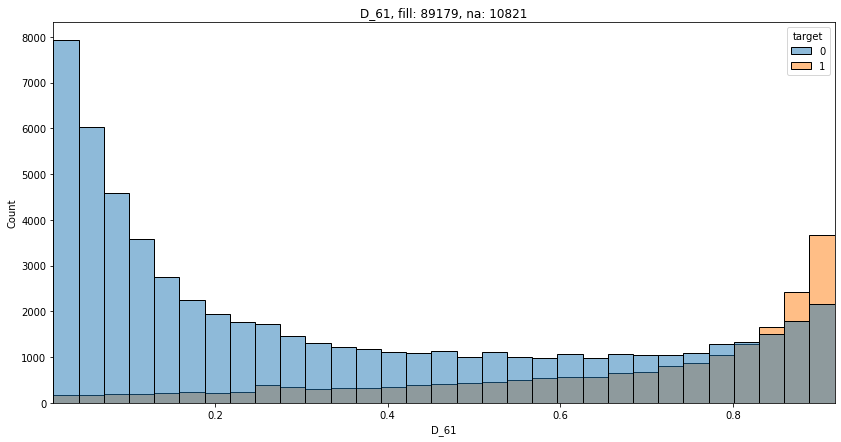

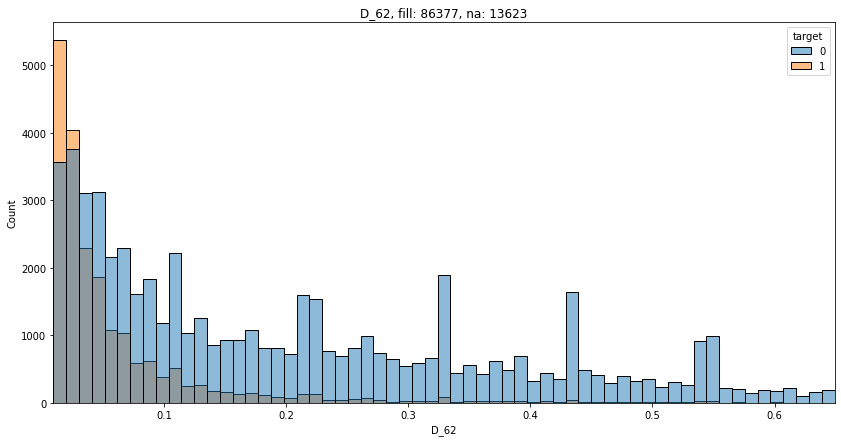

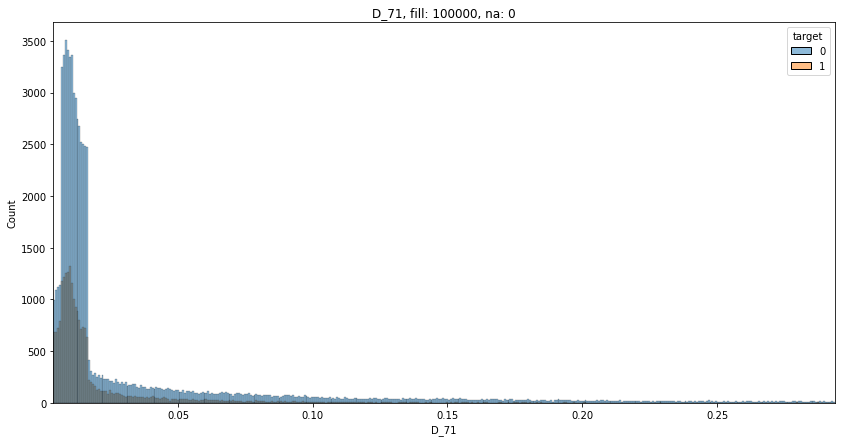

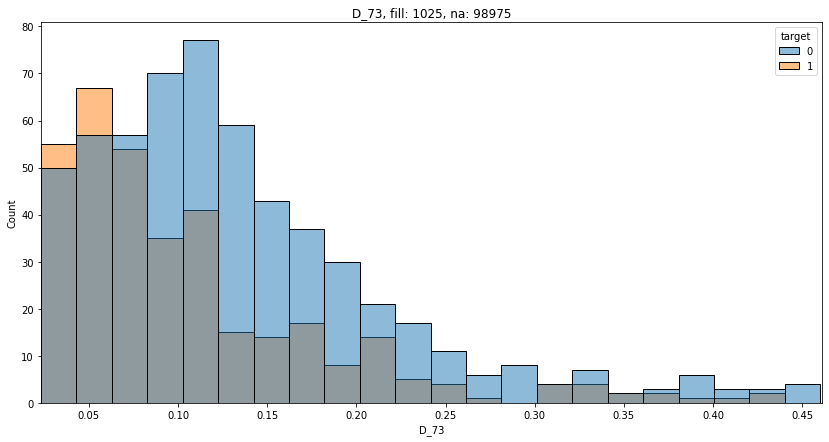

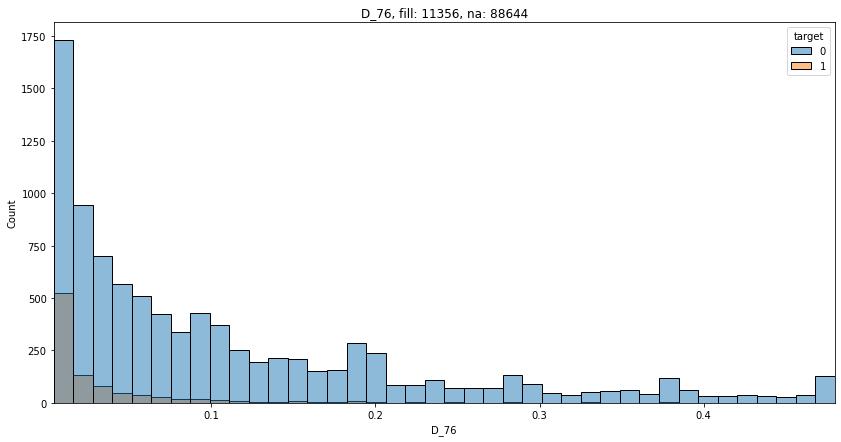

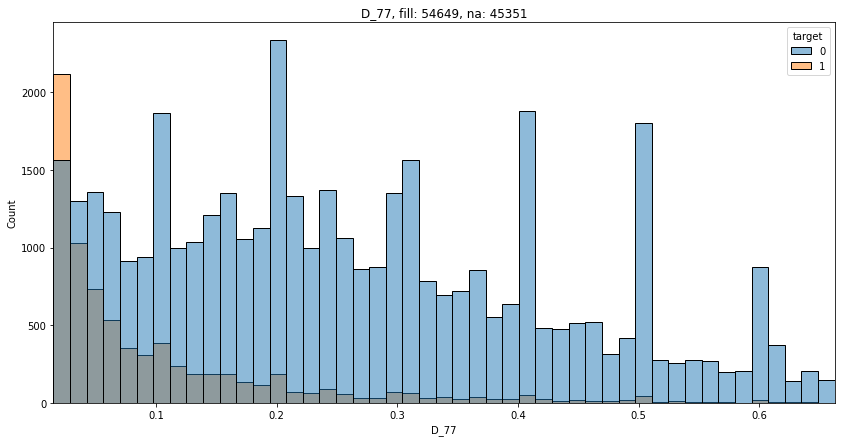

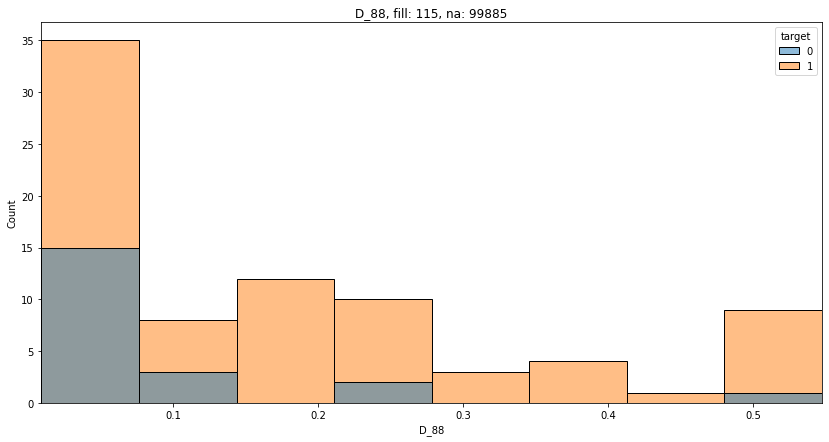

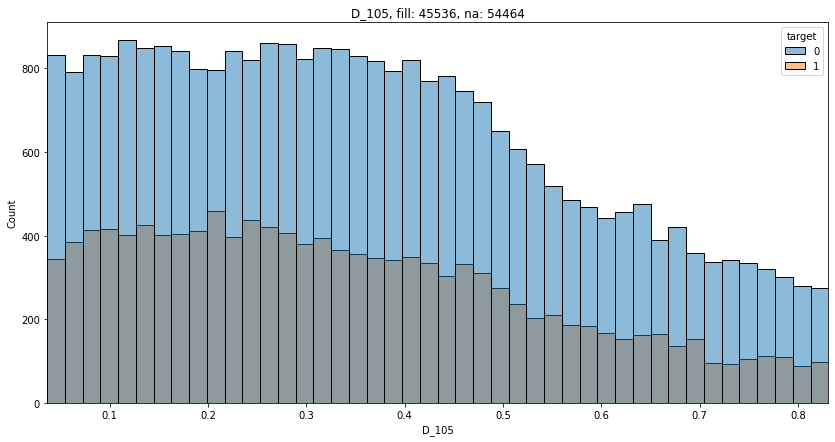

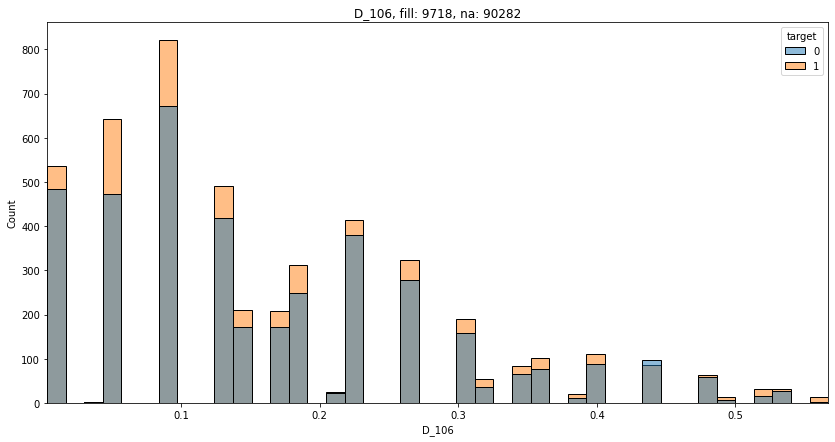

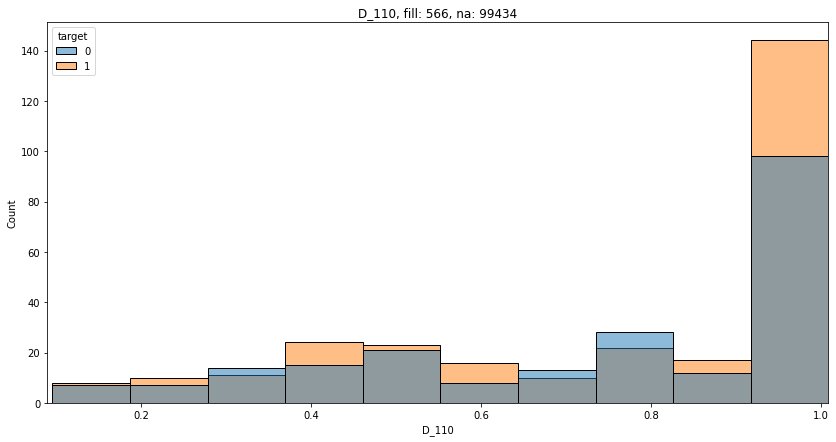

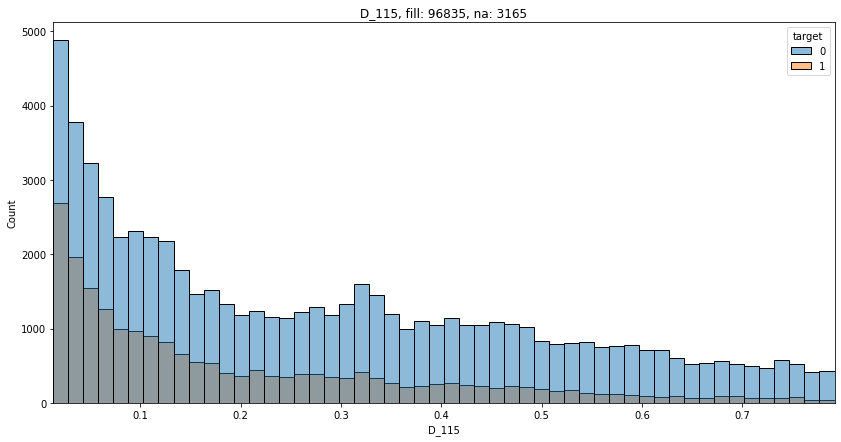

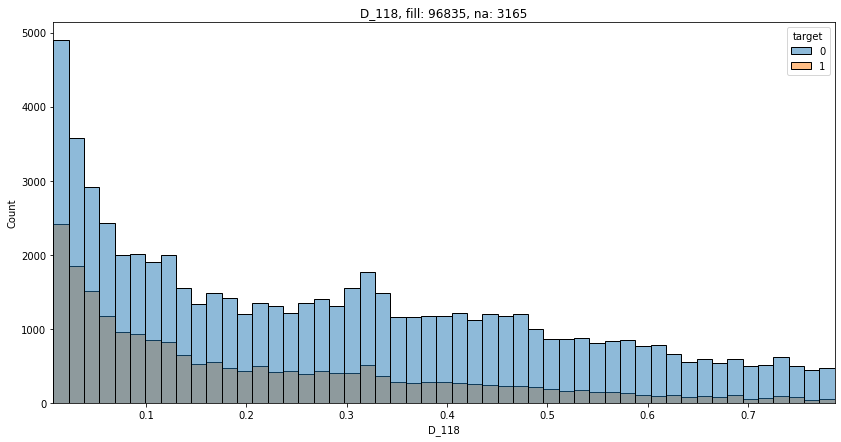

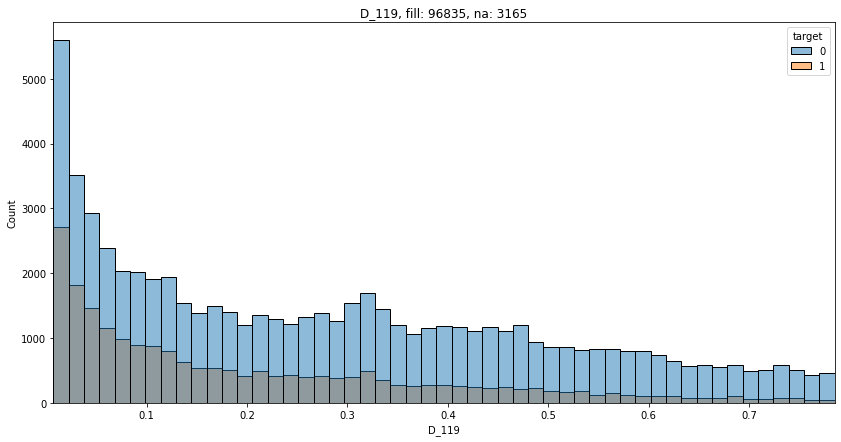

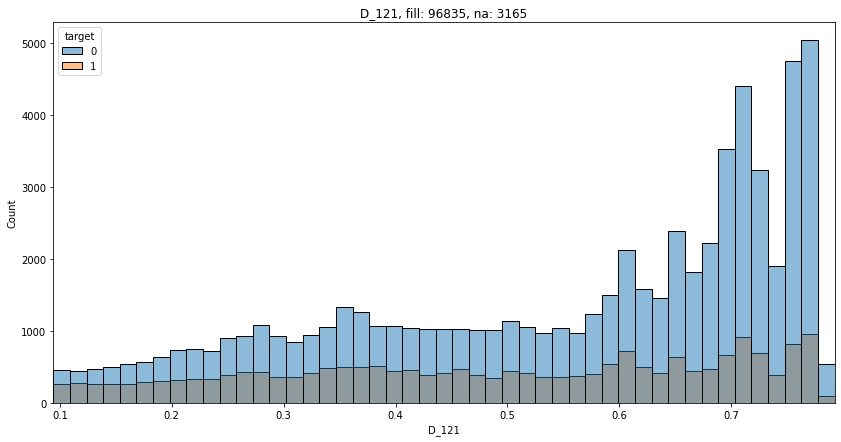

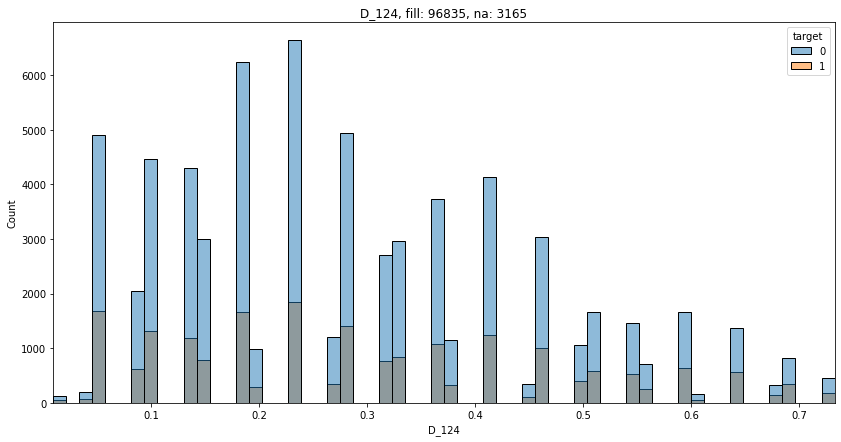

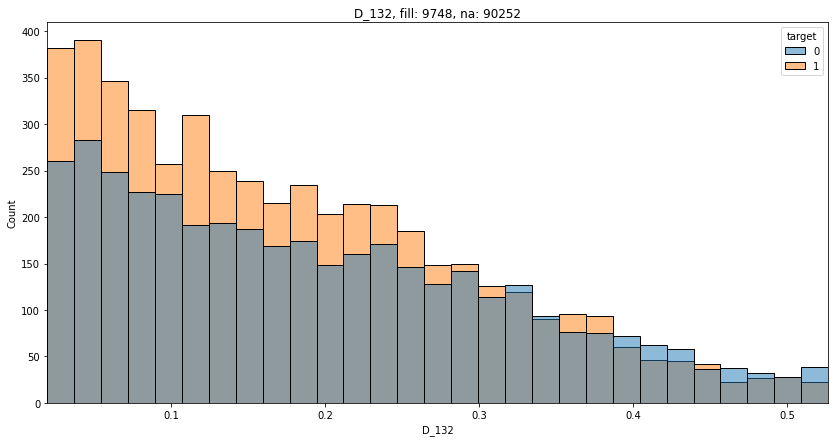

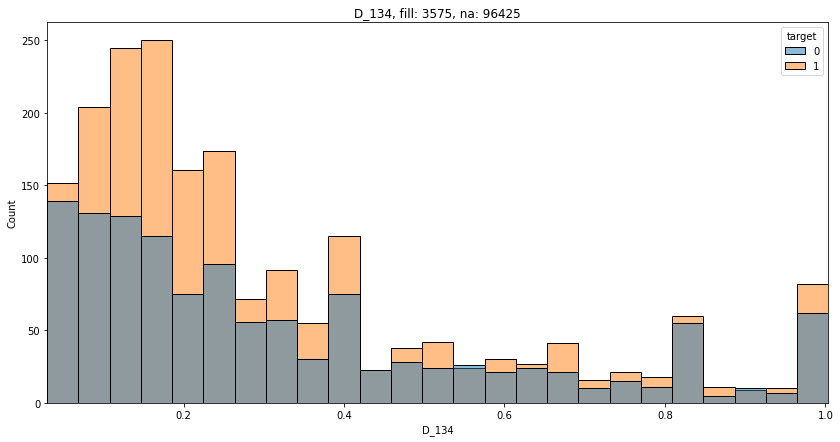

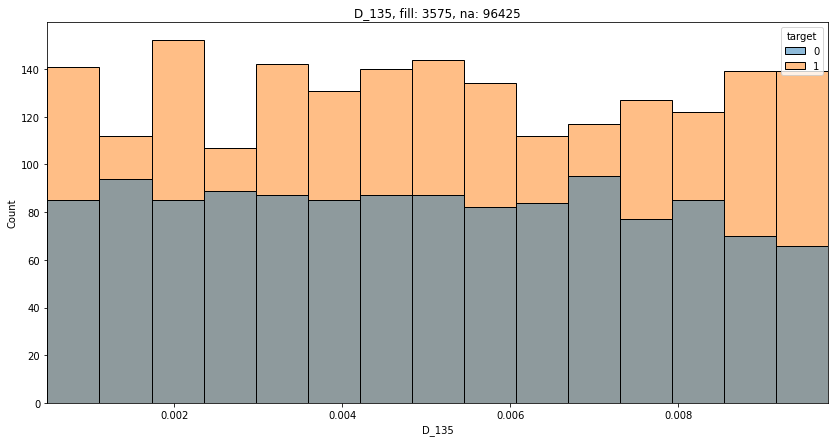

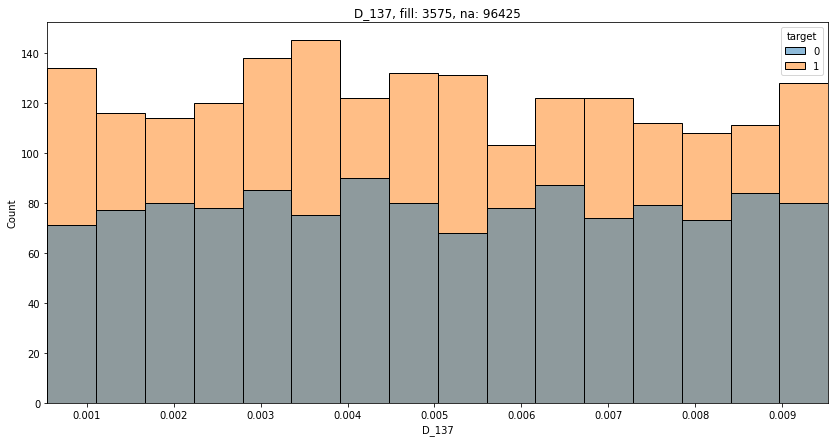

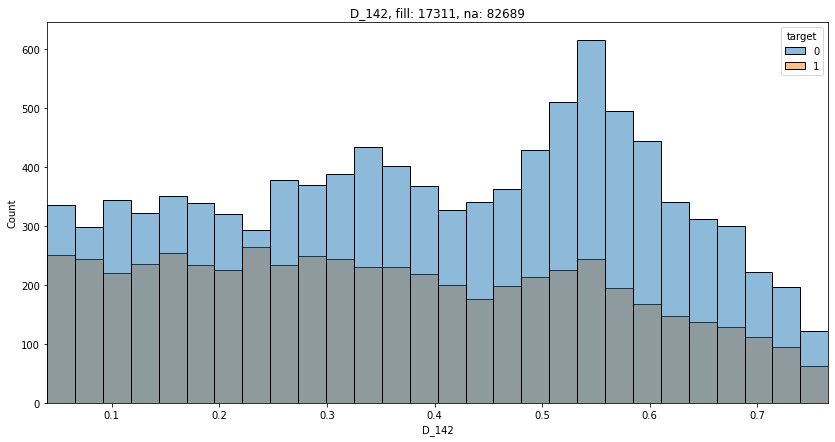

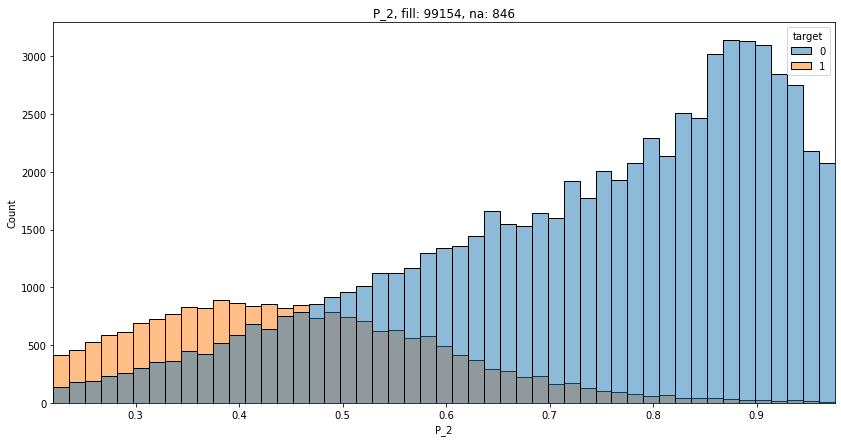

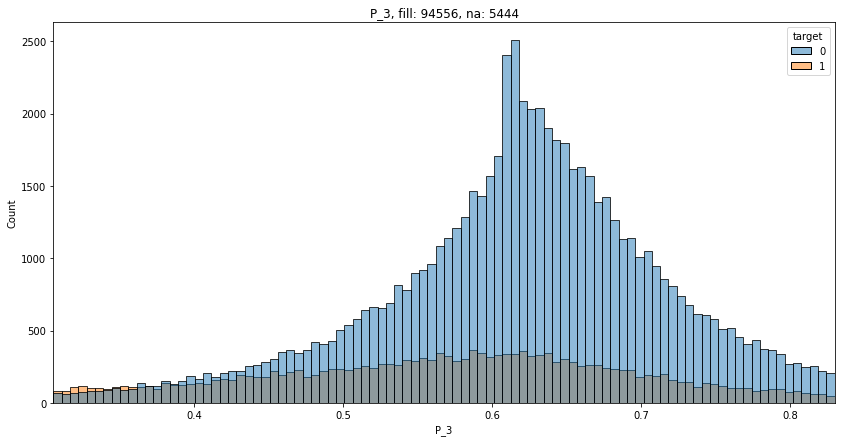

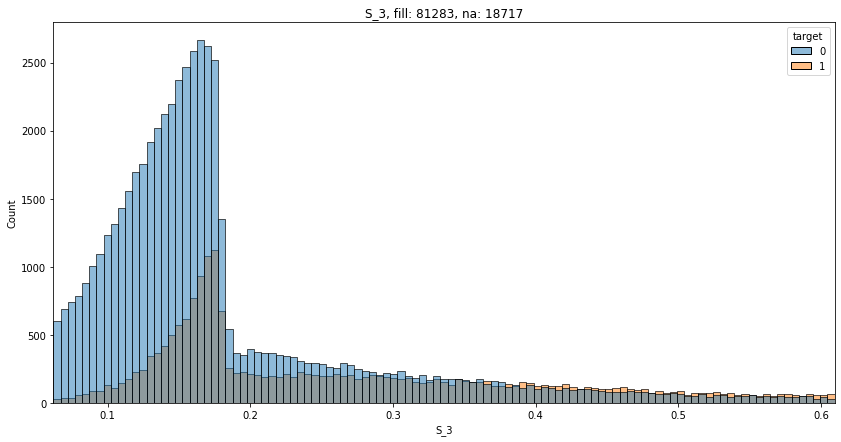

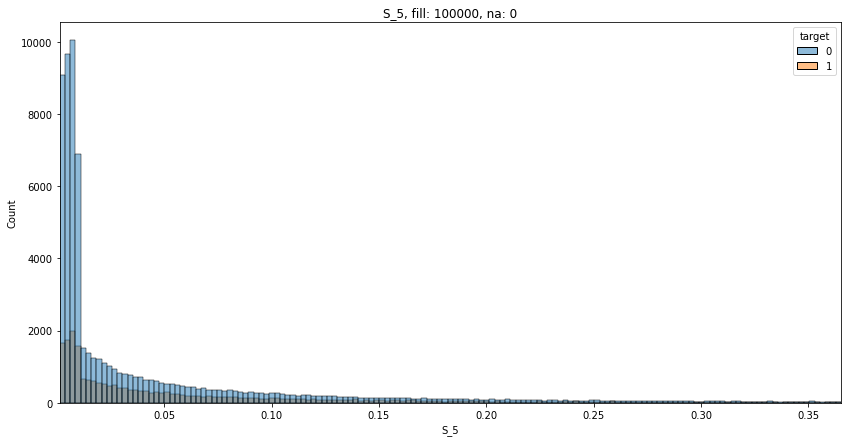

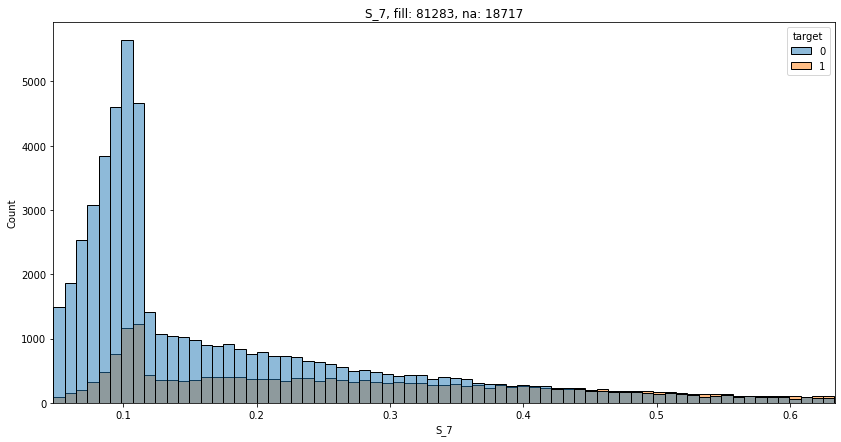

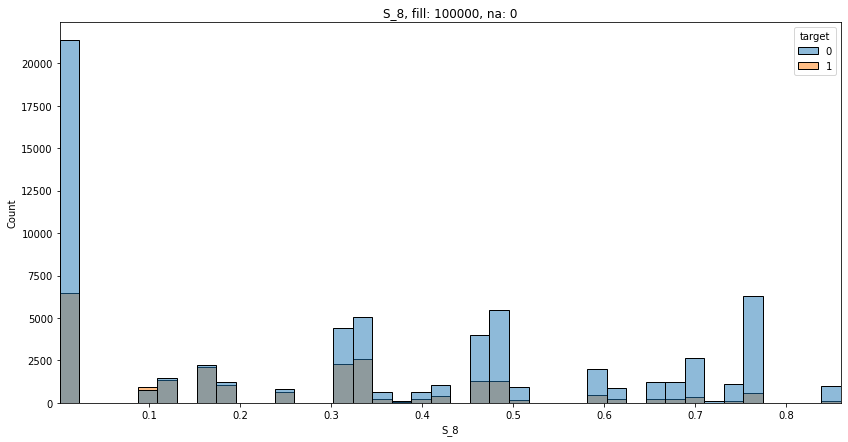

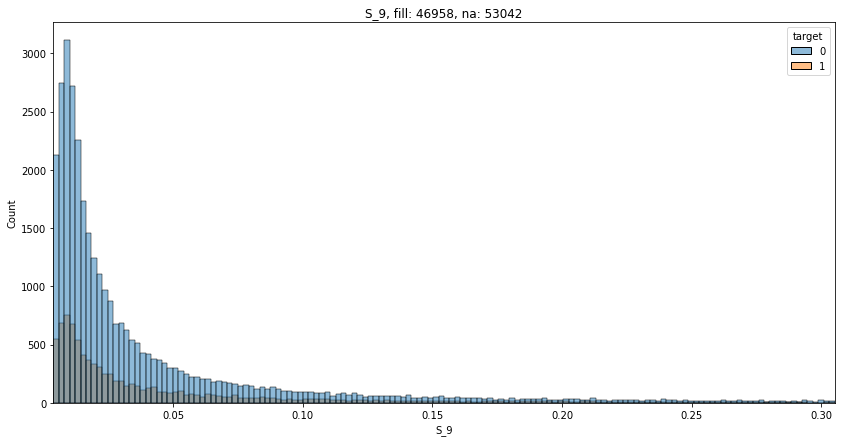

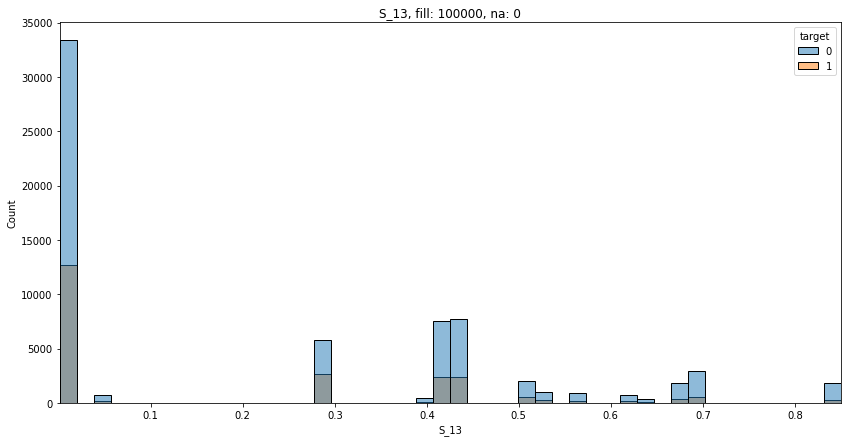

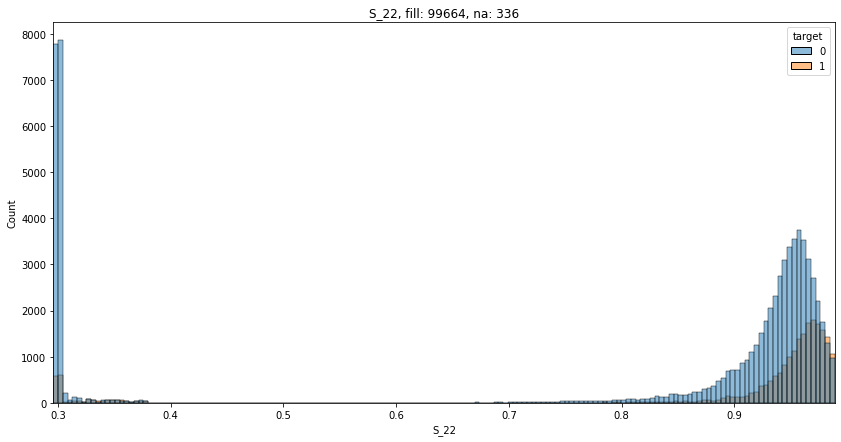

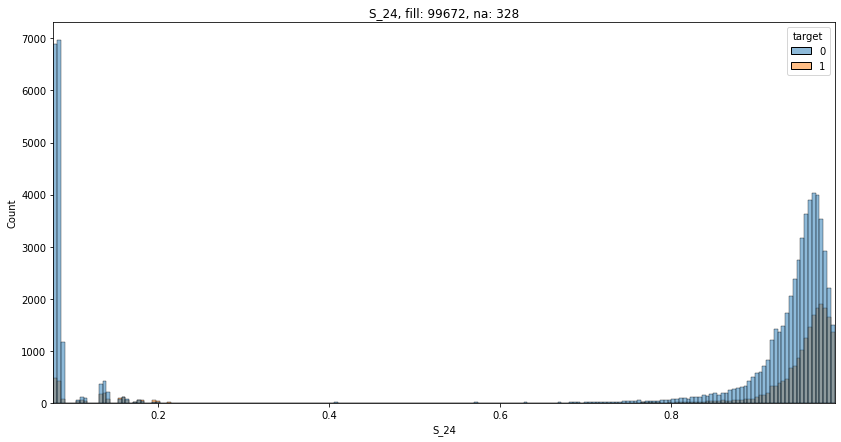

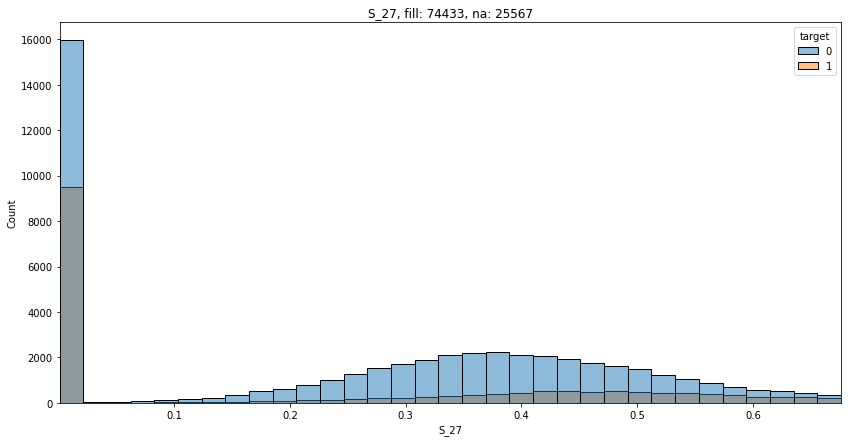

In [10]:
plot_features_hist(train, features.origin_groups["other"], quantile_alpha=0.05)

In [15]:
print(len(features.origin_groups["uniform"]))
print(len(features.origin_groups["binary"]))
print(len(features.origin_groups["discrete"]))
print(len(features.origin_groups["unknown"]))
print(len(features.origin_groups["other"]))
print(len(features.origin_groups["category"]))

67
19
20
5
66
11


## Категориальные признаки 

In [12]:
for col in features.origin_groups["category"]:
    print(col)
    print(train[col].isna().sum()) 
    print(train[col].value_counts())
    print()

B_30
0
 0.0    85246
 1.0    13716
 2.0      993
-2.0       45
Name: B_30, dtype: int64

B_38
0
 2.0    35209
 3.0    22717
 1.0    21125
 5.0     8062
 4.0     5336
 7.0     4632
 6.0     2874
-2.0       45
Name: B_38, dtype: int64

D_114
0
 1.0    60060
 0.0    36775
-2.0     3165
Name: D_114, dtype: int64

D_116
0
 0.0    96714
-2.0     3165
 1.0      121
Name: D_116, dtype: int64

D_117
0
-1.0    26308
 3.0    20991
 4.0    20666
 2.0    12053
 5.0     8299
 6.0     6322
-2.0     3165
 1.0     2196
Name: D_117, dtype: int64

D_120
0
 0.0    85591
 1.0    11244
-2.0     3165
Name: D_120, dtype: int64

D_126
0
 1.0    77033
 0.0    16161
-1.0     4723
-2.0     2083
Name: D_126, dtype: int64

D_63
0
0.0    74508
1.0    16672
2.0     8038
3.0      474
4.0      185
5.0      123
Name: D_63, dtype: int64

D_64
0
 0.0    52767
 1.0    27319
 2.0    15375
-2.0     3882
 3.0      657
Name: D_64, dtype: int64

D_66
0
-2.0    88795
 1.0    11097
 0.0      108
Name: D_66, dtype: int64

D_68
0
 

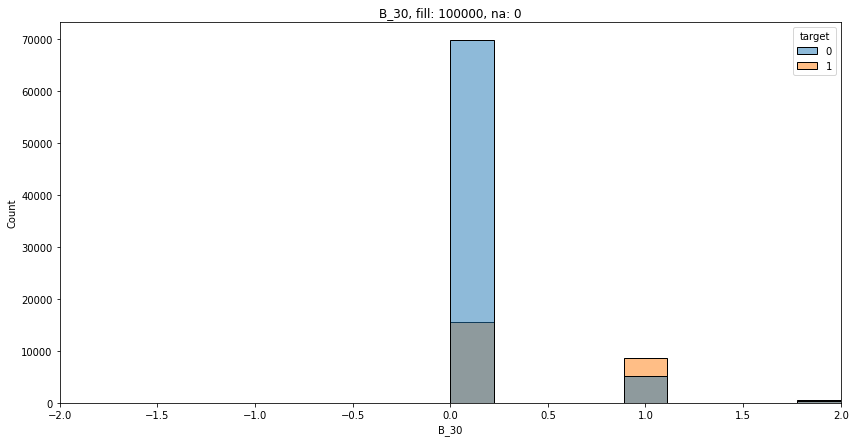

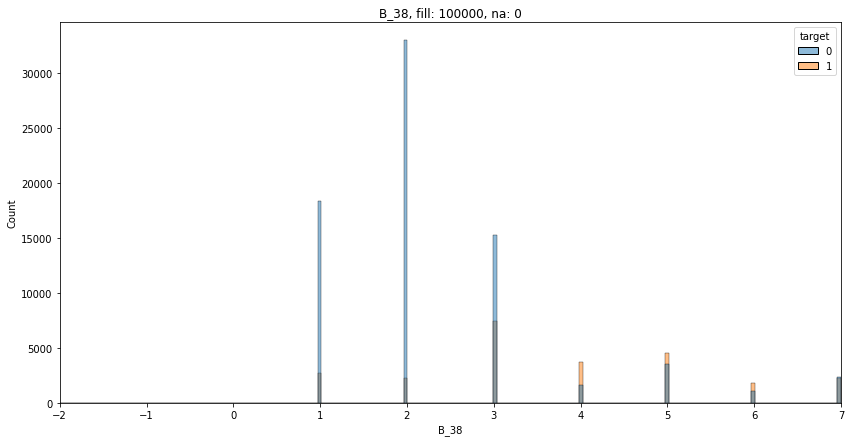

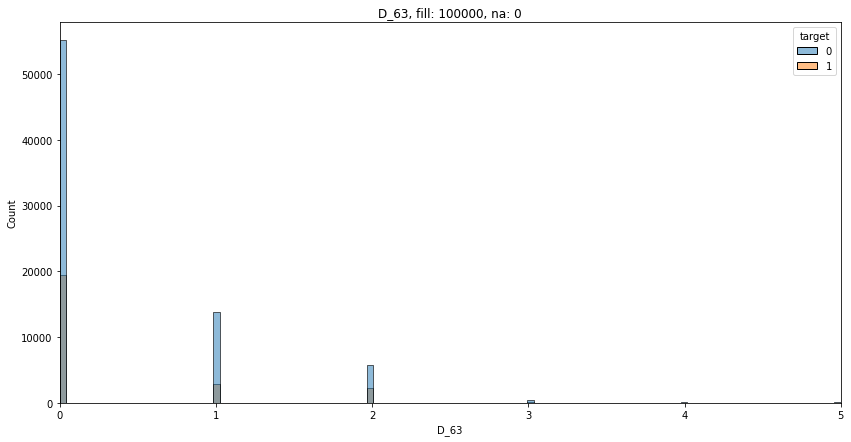

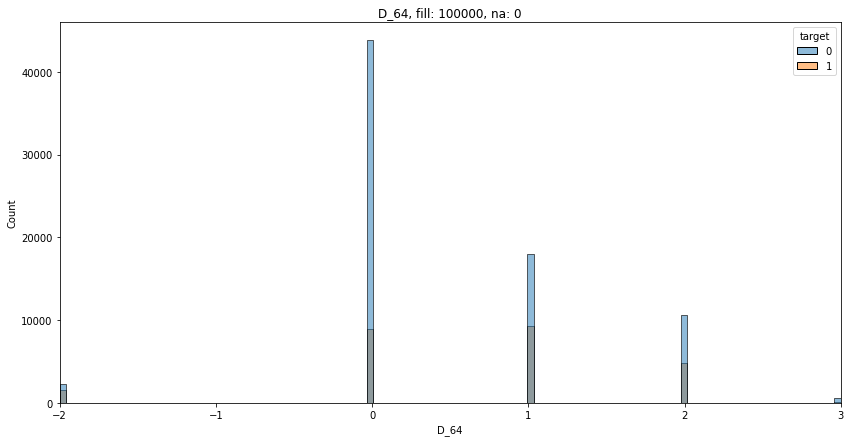

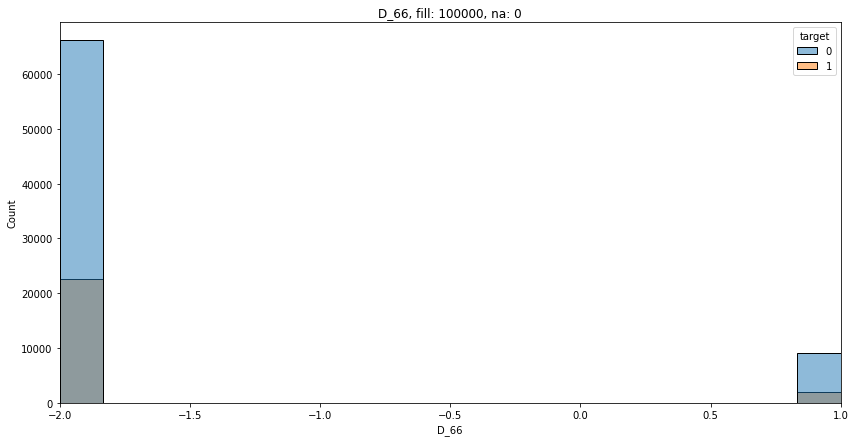

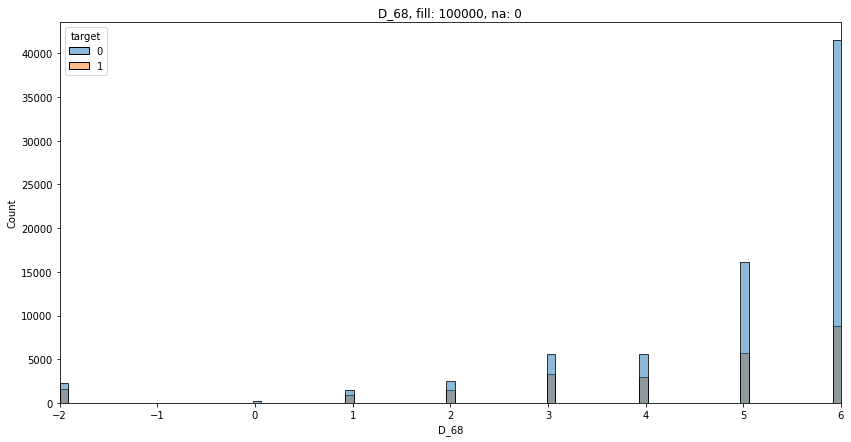

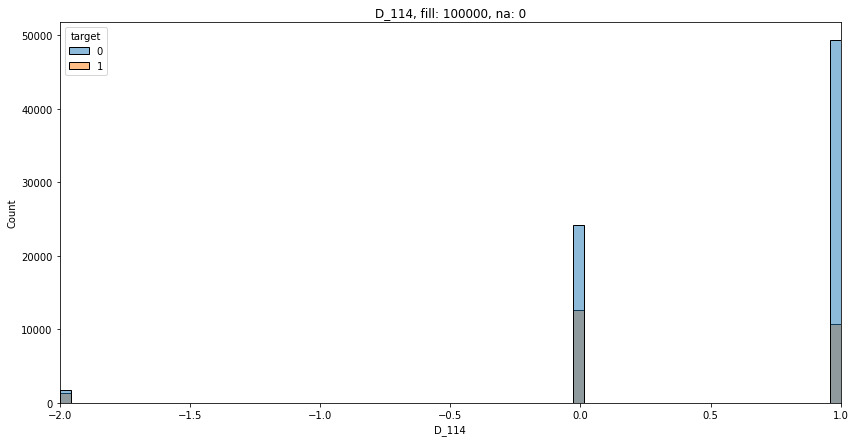

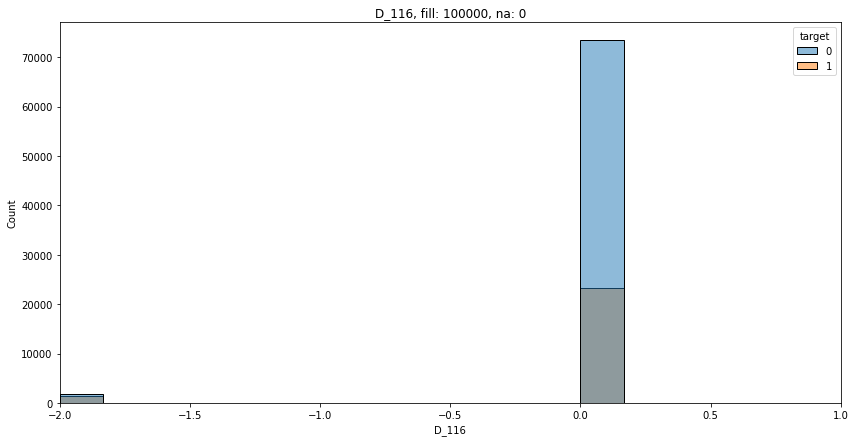

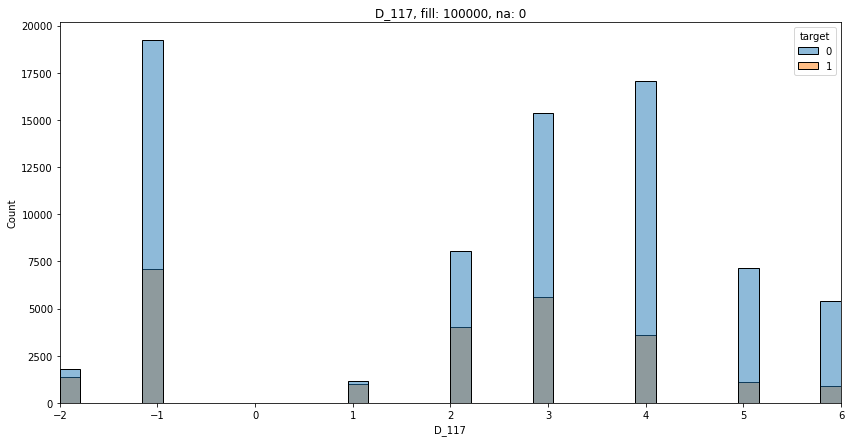

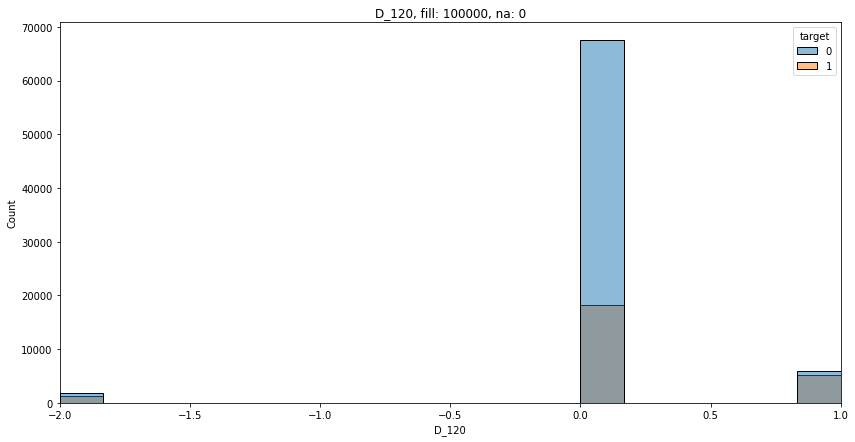

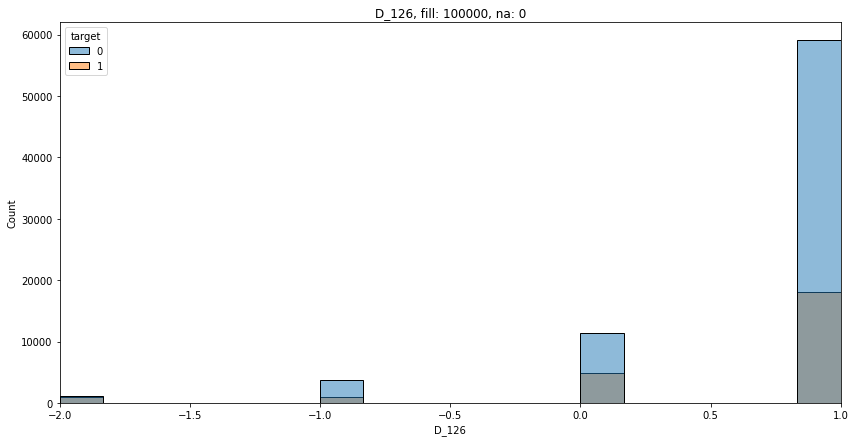

In [14]:
plot_features_hist(train, features.origin_groups["category"], quantile_alpha=0.0)